#  Openclassrooms 
## Projet 2 : Analyse des données de systèmes éducatifs

The World Bank EdStats All Indicator Query contient plus de 4 000 indicateurs comparables au niveau international qui décrivent l'accès à l'éducation, la progression, l'achèvement, l'alphabétisation, les enseignants, la population et les dépenses. Les indicateurs couvrent le cycle d'éducation du pré-primaire à l'enseignement professionnel et supérieur. La requête contient également des données sur les résultats d'apprentissage provenant d'évaluations internationales et régionales 2050. Pour plus d'informations, veuillez visiter le site EdStats. 

La société est une start-up d'EdTech qui a pour objectif de fournir une formation en ligne distinguée distinée au public du niveau secondaire et universitaire. l'objectif de l'entreprise est de savoir est ce que les données fournissent sont sufficament convaincu pour l'expansion de l'entreprise vers d'autres pays ou régions.

L'objectif de la mission est de réaliser une première analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion

#### les problématiques a répondre : 

- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

####   la pré-analyse.

- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique).

## Les taches principales de notre travail

- Description et analyse des données
- Exploration des données
- nettoyage des données
- Analyse impactantes / Séléction d'indicateurs
- Scoring

In [600]:
# Importaiton des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Les étapes d'une analyse  de données .

## 1 - Description et analyse des données  : 
-  Importations des données :
-  vérification du typages des colonnes  

In [601]:
print('-----------------------------------------------------------------------')
print('--------------------    EdStatsData.csv   -----------------------------')
print('-----------------------------------------------------------------------')
#  Etape 1 :  Description des données
#-------------------------------------------------------------
Dataframe_data = pd.read_csv('EdStatsData.csv', sep=',') #    Importation des données
Dataframe_data_original = Dataframe_data.copy()
print('La taille du fichier ( ligne/colonne ) =' , Dataframe_data.shape) #    Taille  , Combien de ligne et de colonnes .
print('\n Types des lignes = \n', Dataframe_data.dtypes )  #    Type  , Afficher le types des colonnes
Dataframe_data.head()
#Dataframe_data.info()
#data.info()  #   Taille , type , mémoire
#data.columns #    Nom colonnes
#pd.to_numeric() #    Cast
#pd.to_datetime() #    Cast date
#data[''].astype('') #    Cast int

-----------------------------------------------------------------------
--------------------    EdStatsData.csv   -----------------------------
-----------------------------------------------------------------------
La taille du fichier ( ligne/colonne ) = (886930, 70)

 Types des lignes = 
 Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object


Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [602]:
Dataframe_data.shape

(886930, 70)

In [603]:
print('-----------------------------------------------------------------------')
print('------------------------------   EdStatsCountry.csv -----------------------------------------')
print('-----------------------------------------------------------------------')
Dataframe_country = pd.read_csv('EdStatsCountry.csv', sep=',') #    Importation des données
print('La taille du fichier ( ligne/colonne ) = ' , Dataframe_country.shape) #    Taille  , Combien de ligne et de colonnes .
print('\n  Types des lignes = \n ', Dataframe_country.dtypes )  #    Type  , Afficher le types des colonnes
Dataframe_country.head(5)

-----------------------------------------------------------------------
------------------------------   EdStatsCountry.csv -----------------------------------------
-----------------------------------------------------------------------
La taille du fichier ( ligne/colonne ) =  (241, 32)

  Types des lignes = 
  Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accou

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

            IMF data dissemination standard  \
0                                       NaN   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3  General Data Dissemination System (GDDS)   
4                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   
3                 2010.0            2012.0                         2006   
4                    NaN            2006.0                          NaN   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 32 columns]

In [604]:
print('-----------------------------------------------------------------------')
print('----------------------------  EdStatsSeries.csv  -------------------------------------------')
print('-----------------------------------------------------------------------')
Dataframe_series = pd.read_csv('EdStatsSeries.csv', sep=',') #    Importation des données
print('La taille du fichier ( ligne/colonne )' , Dataframe_series.shape) #    Taille  , Combien de ligne et de colonnes .
print('\n  Types des lignes = \n ', Dataframe_series.dtypes )  #    Type  , Afficher le types des colonnes
Dataframe_series.head(5)

-----------------------------------------------------------------------
----------------------------  EdStatsSeries.csv  -------------------------------------------
-----------------------------------------------------------------------
La taille du fichier ( ligne/colonne ) (3665, 21)

  Types des lignes = 
  Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and method

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   
3         NaN         NaN         NaN                NaN  ...   
4         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   
3                        NaN               NaN   
4                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   
3                  NaN             NaN                 NaN           NaN   
4                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

In [605]:
print('-----------------------------------------------------------------------')
print('-----------------------------  EdStatsFootNote.csv  ------------------------------------------')
print('-----------------------------------------------------------------------')
Dataframe_FootNote = pd.read_csv('EdStatsFootNote.csv', sep=',') #    Importation des données
print('La taille du fichier ( ligne/colonne ) ' , Dataframe_FootNote.shape) #    Taille  , Combien de ligne et de colonnes .
print('\n  Types des lignes = \n ', Dataframe_FootNote.dtypes )  #    Type  , Afficher le types des colonnes
Dataframe_FootNote.head()

-----------------------------------------------------------------------
-----------------------------  EdStatsFootNote.csv  ------------------------------------------
-----------------------------------------------------------------------
La taille du fichier ( ligne/colonne )  (643638, 5)

  Types des lignes = 
  CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object


CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [606]:
print('-----------------------------------------------------------------------')
print('-------------------------  EdStatsCountry-Series   ----------------------------------------------')
print('-----------------------------------------------------------------------')
Dataframe_Country_Series= pd.read_csv('EdStatsCountry-Series.csv', sep=',') #    Importation des données
print('La taille du fichier ( ligne/colonne )' , Dataframe_Country_Series.shape) #    Taille  , Combien de ligne et de colonnes .
print('\n Types des lignes = \n  ', Dataframe_Country_Series.dtypes )  #    Type  , Afficher le types des colonnes
Dataframe_Country_Series.head(5)

-----------------------------------------------------------------------
-------------------------  EdStatsCountry-Series   ----------------------------------------------
-----------------------------------------------------------------------
La taille du fichier ( ligne/colonne ) (613, 4)

 Types des lignes = 
   CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object


CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

## --------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------

## 2 - Exploration et netoyage de données : 
   - Etude de qualité des données , Duplicates , imputation, Suppression d'indicateurs 
   dans cette partie , 
   - on va éliminer les colonnes totalement les cases remplit pas des valeurs nulls , traiter les valeurs manquantes ,  sélectionner les colonnes ( Attributs ) important , et éliminer les fichier ou sous fichiers non important à ce niveau 

In [607]:
print('-------------------------------------------Dataframe_data-----------------------------------------------------')
print('\n Taux des valeurs manquantes = \n', Dataframe_data.isna().mean())  #  Taux des valeurs manquantes 
print('\n  vérification du doublons identifiant unique = ',Dataframe_data.duplicated('Country Code').sum()) # doublons
#print (' \n  le taux des valeurs manquantes pour chaque lignes est = \n ', Dataframe_data.isna().sum() / len(Dataframe_data)) # veleurs manquantes
Dataframe_data.count  #    Taux remplissages  
# Vérifier la duplication des colonnes présenté comme clé primaires   : 
print(' le nombre des continent ( par nom ) non unique = ', Dataframe_data['Country Name'].nunique())
print(' le nombre des continent ( par code ) non unique = ', Dataframe_data['Country Code'].nunique())
print(' le nombre des indicateurs ( par nom )  non unique = ', Dataframe_data['Indicator Name'].nunique())
print(' le nombre des indicateurs ( par code ) non unique = ', Dataframe_data['Indicator Code'].nunique())
#Dataframe_data['Indicator Name'].unique()

Dataframe_data.duplicated() #    détecter duplicate
Dataframe_data.drop_duplicates() #    Supprimer duplicata

# Supression de la colonne  Unnamed: 69
Dataframe_data = Dataframe_data.drop(columns='Unnamed: 69', axis = 1)   #data.drop() #    Supprimer lignes ou colones 

## Etape 2   :  exploration des données 
#data.dropna() #    TSupprime NA
#data.fillna() #    Remplacer NA



-------------------------------------------Dataframe_data-----------------------------------------------------

 Taux des valeurs manquantes = 
 Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
                    ...   
2085              0.942007
2090              0.942007
2095              0.942007
2100              0.942007
Unnamed: 69       1.000000
Length: 70, dtype: float64

  vérification du doublons identifiant unique =  886688
 le nombre des continent ( par nom ) non unique =  242
 le nombre des continent ( par code ) non unique =  242
 le nombre des indicateurs ( par nom )  non unique =  3665
 le nombre des indicateurs ( par code ) non unique =  3665


In [608]:
# Découvrir le pourcentage de valeurs manquantes dans chaque colonne de Dataframe_data
##Dataframe_data
#percentage= 100*(len(Dataframe_data.loc[:,Dataframe_data.isnull().sum(axis=0)>=1 ].index) / len(Dataframe_data.index))
#print(round(percentage,2))
#percentage

In [609]:
#valeur_nullee = Dataframe_data.isna().mean()* 100
#print('\n Taux des valeurs manquantes = \n', valeur_nullee)
#for x in Dataframe_data:
#    xx = 0
#if valeur_nullee>70:
#    xx = xx+1
#else:
#    print ('valeur_nullee = 0')

In [610]:
#new_df = (Dataframe_data.isna().sum()/len(Dataframe_data)) * 100
#new_df.dtypes

In [569]:
#df = Dataframe_data.isnull().mean() * 100
#df

In [611]:
## Supprimer les colonnes dont les valeurs NaN sont plus de 80 % 
##  for c in Dataframe_data.columns:
    ##    if 100.0 * Dataframe_data[c].isna().sum() / Dataframe_data.shape[0] > 80:
      # #          Dataframe_data.drop(c,1,inplace=True)


In [612]:
Dataframe_data

Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth literacy rate, population 15-24 years, f...   
886928  Youth literacy rate, population 15-24 years, g...   
886929  Youth literacy rate, population 15-24 years, m...   

              Indicator Code       1970       1971       1972       1973  \
0                 UIS.NERA.2        NaN        NaN        NaN        NaN   
1               UIS.NERA.2.F        NaN        NaN        NaN        NaN   
2             UIS.NERA.2.GPI        NaN        NaN        NaN        NaN   
3               UIS.NERA.2.M        NaN        NaN        NaN        NaN   
4                SE.PRM.TENR  54.822121  54.894138  56.209438  57.267109   
...                      ...        ...        ...        ...        ...   
886925      UIS.LP.AG15T24.M        NaN        NaN        NaN        NaN   
886926     SE.ADT.1524.LT.ZS        NaN        NaN        NaN        NaN   
886927  SE.ADT.1524.LT.FE.ZS        NaN        NaN        NaN        NaN   
886928  SE.ADT.1524.LT.FM.ZS        NaN        NaN        NaN        NaN   
886929  SE.ADT.1524.LT.MA.ZS        NaN        NaN        NaN        NaN   

             1974      1975  ...  2055  2060  2065  2070  2075  2080  2085  \
0             NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1             NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2             NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3             NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4       57.991138  59.36554  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...           ...       ...  ...   ...   ...   ...   ...   ...   ...   ...   
886925        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
886926        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
886927        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
886928        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
886929        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

        2090  2095  2100  
0        NaN   NaN   NaN  
1        NaN   NaN   NaN  
2        NaN   NaN   NaN  
3        NaN   NaN   NaN  
4        NaN   NaN   NaN  
...      ...   ...   ...  
886925   NaN   NaN   NaN  
886926   NaN   NaN   NaN  
886927   NaN   NaN   NaN  
886928   NaN   NaN   NaN  
886929   NaN   NaN   NaN  

[886930 rows x 69 columns]

In [614]:
# Dataframe_data['2005'].isna().mean()
#  Dataframe_data['2010'].isna().mean()
#  Dataframe_data['Indicator Code'].isna().mean()
# Dataframe_data['Indicator Name'].isna().mean()
#  Dataframe_data['Country Code'].isna().mean()
#  Dataframe_data['Country Name'].isna().mean()
#  yy = Dataframe_data['Country Name'].groupby

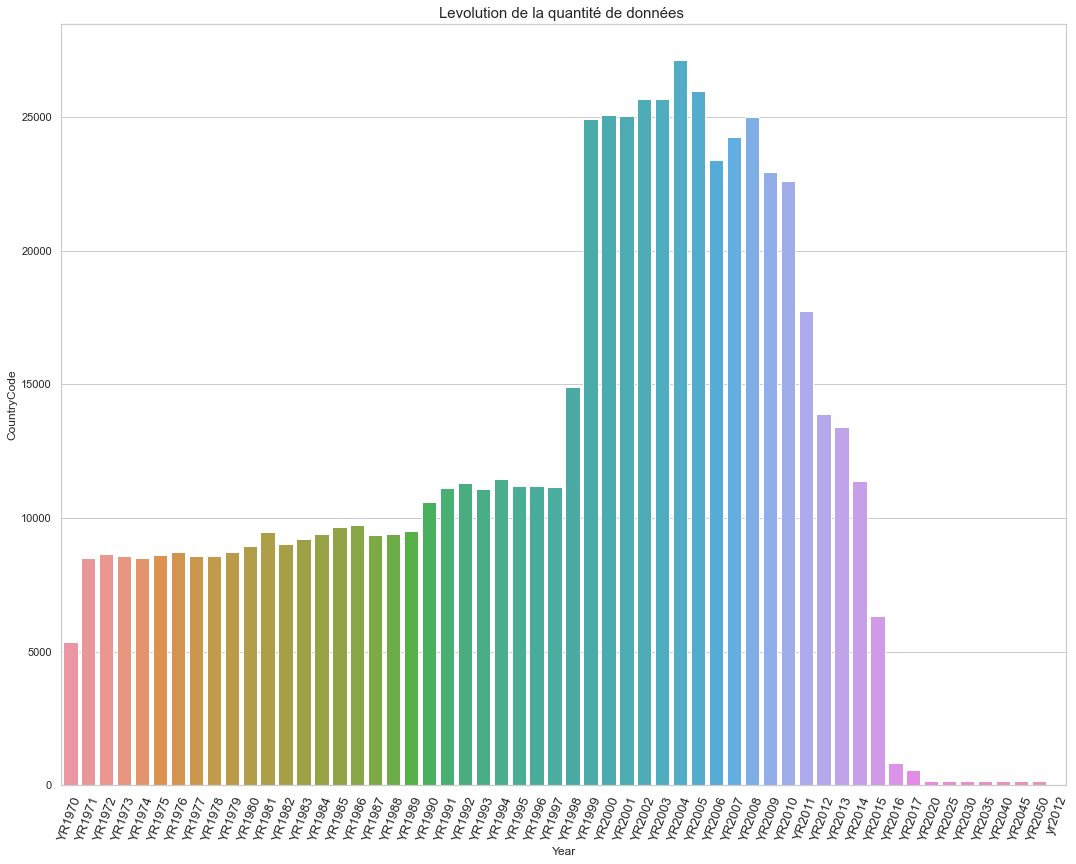

In [615]:
Dataframe_FootNote.shape
Dataframe_FootNote.head()
sns.set(style="whitegrid")
colors = ["#bd5db0","#70a845","#727bcc","#b49242"]
plt.figure(figsize=(18, 14))
plt.title('L''evolution de la quantité de données ', size=15)
plt.xlabel('les années')
plt.ylabel('la quantité de donnée')
plot = sns.barplot(y = 'CountryCode', x='Year', data = Dataframe_FootNote.groupby('Year').count().reset_index())
plot.set_xticklabels(labels = Dataframe_FootNote.groupby('Year').count().reset_index()['Year'], rotation=70, size=13)

plt.show()


In [616]:
# Calculer le taux des valeurs nulles pour chaque colonnes 
datframe_data_null_value = Dataframe_data.isnull().mean() * 100
datframe_data_null_value.index
Dataframe_data.columns
datframe_data_null_value

Country Name       0.000000
Country Code       0.000000
Indicator Name     0.000000
Indicator Code     0.000000
1970              91.849639
                    ...    
2080              94.200670
2085              94.200670
2090              94.200670
2095              94.200670
2100              94.200670
Length: 69, dtype: float64

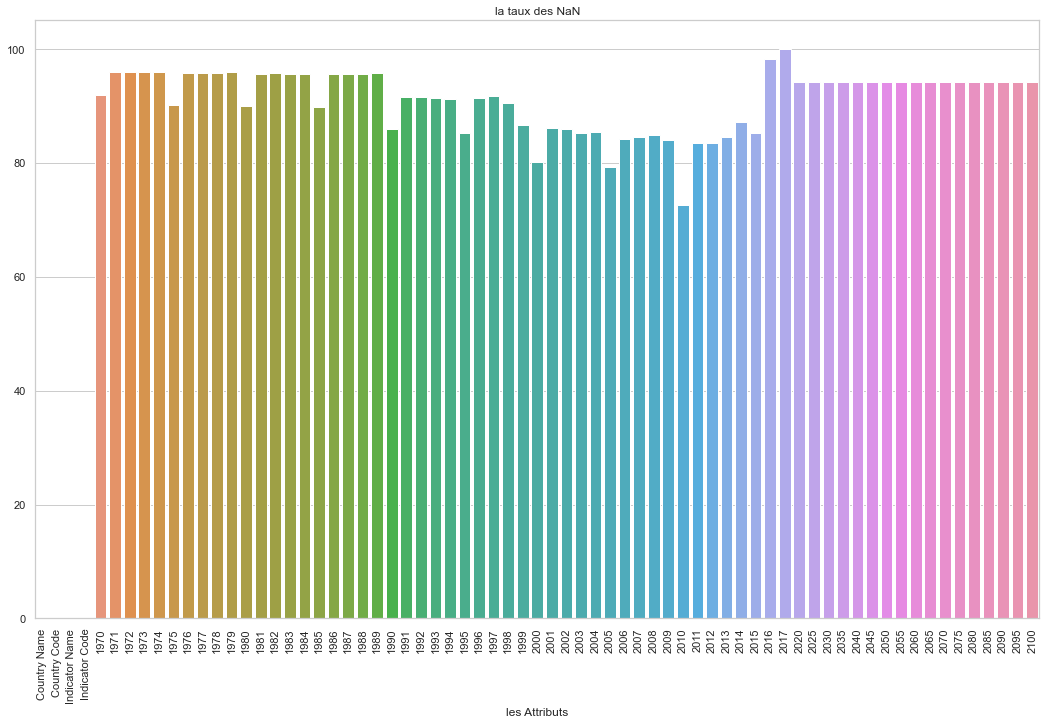

In [617]:
# Affichage du taux des valeurs NaN
fig = plt.figure(1, figsize=(18, 11))
# Liste des 30 pays ayant le score le plus élevé (par ordre décroissant)
#list_priority_countries = df_score["score"].sort_values(ascending=False)[0:30]
sns.barplot(x = Dataframe_data.columns, y = datframe_data_null_value)  # ,palette="Blues_d" 
plt.xticks(rotation=90)
#plt.set_xticklabels(Dataframe_data.index,rotation=45)
plt.xlabel("les Attributs")
plt.title("la taux des NaN")
plt.show()

In [618]:
print('-------------------------------------------------------------------------------------------------------------')
print('-----------------------------------------Dataframe_country----------------------------------------------------')
print('\n Taux des valeurs manquantes = \n',Dataframe_country.isna().mean())  #   ou data.isna().any()  ;   Taux des valeurs manquantes 
print('\n  vérification du doublons identifiant unique = ',Dataframe_country.duplicated('Country Code').sum()) # doublons
#print (' \n  le taux des valeurs manquantes pour chaque lignes est =  \n ', Dataframe_country.isna().sum() / len(Dataframe_country))
Dataframe_country.head(5)
#Dataframe_country.info()

Dataframe_country.count  #    Taux remplissages  
# Vérifier la duplication des colonnes présenté comme clé primaires   : 
print(' le nombre de continent ( par code) non unique = ', Dataframe_country['Country Code'].nunique())
print(' le nombre de continent ( par nom ) non unique = ', Dataframe_country['Short Name'].nunique())
print(' le nombre de continent ( nom de table )  non unique = ', Dataframe_country['Table Name'].nunique())
print(' le nombre de continent ( Nom Long ) non unique = ', Dataframe_country['Long Name'].nunique())
#Dataframe_data['Indicator Name'].unique()

Dataframe_country.duplicated() #    détecter duplicate
Dataframe_country.drop_duplicates() #    Supprimer duplicata

# Supression de la colonne  Unnamed: 31
Dataframe_country.head(5)
Dataframe_country = Dataframe_country.drop(columns='Unnamed: 31', axis = 1)   #data.drop() #    Supprimer lignes ou colones 
Dataframe_country.dtypes #  le types des colonnes
## Etape 2   :  exploration des données 
#data.dropna() #    TSupprime NA
#data.fillna() #    Remplacer NA


-------------------------------------------------------------------------------------------------------------
-----------------------------------------Dataframe_country----------------------------------------------------

 Taux des valeurs manquantes = 
 Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
2-alpha code                                         0.012448
Currency Unit                                        0.107884
Special Notes                                        0.398340
Region                                               0.112033
Income Group                                         0.112033
WB-2 code                                            0.004149
National accounts base year                          0.149378
National accounts reference year                     0.867220
S

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [619]:
# Calculer le taux des valeurs nulles pour chaque colonnes 
datframe_country_null_value = Dataframe_country.isnull().mean() * 100
datframe_country_null_value.index
Dataframe_data.columns
datframe_country_null_value

Country Code                                          0.000000
Short Name                                            0.000000
Table Name                                            0.000000
Long Name                                             0.000000
2-alpha code                                          1.244813
Currency Unit                                        10.788382
Special Notes                                        39.834025
Region                                               11.203320
Income Group                                         11.203320
WB-2 code                                             0.414938
National accounts base year                          14.937759
National accounts reference year                     86.721992
SNA price valuation                                  18.257261
Lending category                                     40.248963
Other groups                                         75.933610
System of National Accounts                          10

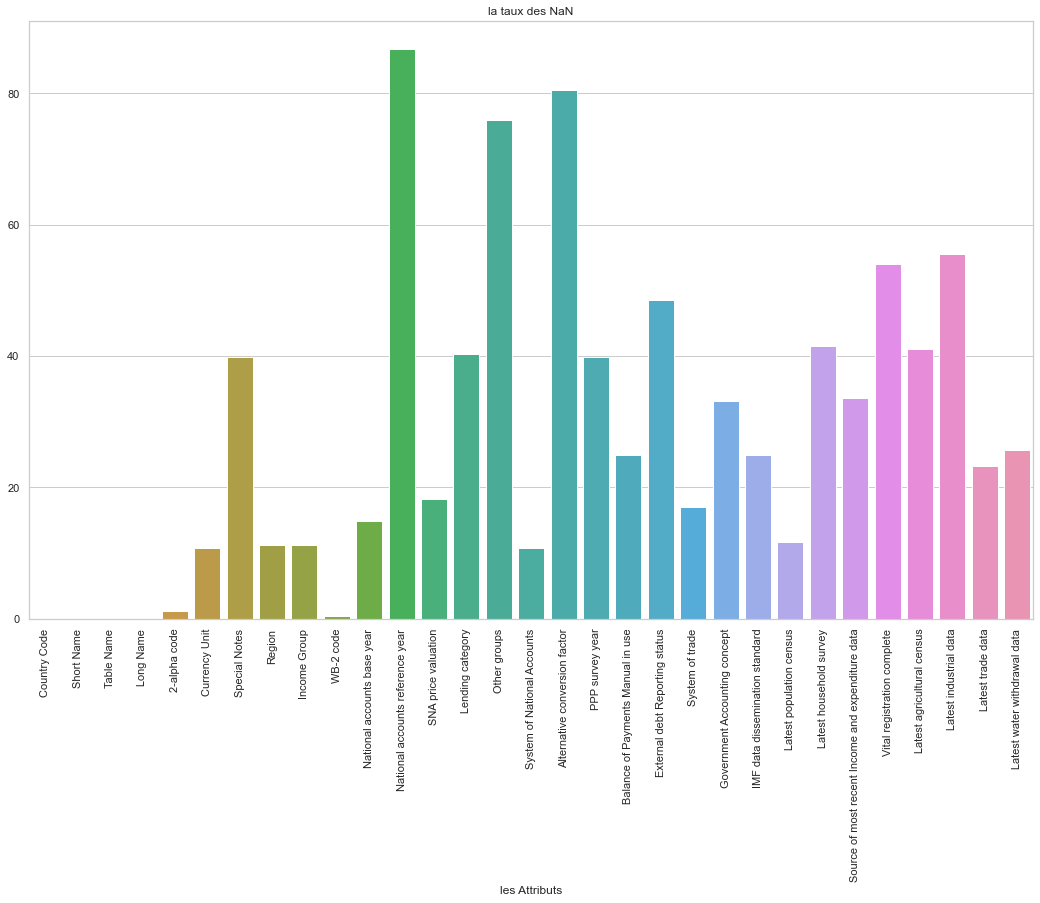

In [620]:
# Affichage du taux des valeurs NaN
fig = plt.figure(1, figsize=(18, 11))
# Liste des 30 pays ayant le score le plus élevé (par ordre décroissant)
#list_priority_countries = df_score["score"].sort_values(ascending=False)[0:30]

sns.barplot(x = Dataframe_country.columns, y = datframe_country_null_value)  # ,palette="Blues_d" 
plt.xticks(rotation=90)
#plt.set_xticklabels(Dataframe_data.index,rotation=45)
plt.xlabel("les Attributs")
plt.title("la taux des NaN")
plt.show()

In [621]:
Dataframe_country.shape

(241, 31)

In [622]:
print('--------------------------------------------------Dataframe_series----------------------------------------------')
print('\n Taux des valeurs manquantes = \n' ,Dataframe_series.isna().mean())  #   ou data.isna().any()  ;   Taux des valeurs manquantes 
print('\n  vérification du doublons identifiant unique = ',Dataframe_series.duplicated('Series Code').sum()) # doublons
#print (' \n  le taux des valeurs manquantes pour chaque lignes est = \n  ', Dataframe_series.isna().sum() / len(Dataframe_series))
print('-------------------------------------------------------------------------------------------------------------')
Dataframe_series.head(5)
#Dataframe_country.info()

Dataframe_series.count  #    Taux remplissages  
# Vérifier la duplication des colonnes présenté comme clé primaires   : 
print(' le nombre de  Code de Series non unique = ', Dataframe_series['Series Code'].nunique())
print(' le nombre de Topic non unique = ', Dataframe_series['Topic'].nunique())
print(' le nombre de Indicator Name  non unique = ', Dataframe_series['Indicator Name'].nunique())
print(' le nombre de Short definition non unique = ', Dataframe_series['Short definition'].nunique())
print(' le nombre de Long definition non unique = ', Dataframe_series['Long definition'].nunique())
#Dataframe_data['Indicator Name'].unique()

Dataframe_series.duplicated() #    détecter duplicate
Dataframe_series.drop_duplicates() #    Supprimer duplicata

# Supression de la colonne  Unnamed: 31
Dataframe_series.head(5)
#Dataframe_series = Dataframe_series.drop(columns='Unnamed: 20', axis = 1)   #data.drop() #    Supprimer lignes ou colones 
Dataframe_series.dtypes
## Etape 2   :  exploration des données 
#data.dropna() #    TSupprime NA
#data.fillna() #    Remplacer NA

--------------------------------------------------Dataframe_series----------------------------------------------

 Taux des valeurs manquantes = 
 Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Short definition                       0.411733
Long definition                        0.000000
Unit of measure                        1.000000
Periodicity                            0.972988
Base Period                            0.914325
Other notes                            0.849386
Aggregation method                     0.987176
Limitations and exceptions             0.996180
Notes from original source             1.000000
General comments                       0.996180
Source                                 0.000000
Statistical concept and methodology    0.993724
Development relevance                  0.999181
Related source links                   0.941337
Other web links                      

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

In [623]:
# Calculer le taux des valeurs nulles pour chaque colonnes 
Dataframe_series_null_value = Dataframe_series.isnull().mean() * 100
Dataframe_series_null_value.index
Dataframe_series.columns
Dataframe_series_null_value

Series Code                              0.000000
Topic                                    0.000000
Indicator Name                           0.000000
Short definition                        41.173261
Long definition                          0.000000
Unit of measure                        100.000000
Periodicity                             97.298772
Base Period                             91.432469
Other notes                             84.938608
Aggregation method                      98.717599
Limitations and exceptions              99.618008
Notes from original source             100.000000
General comments                        99.618008
Source                                   0.000000
Statistical concept and methodology     99.372442
Development relevance                   99.918145
Related source links                    94.133697
Other web links                        100.000000
Related indicators                     100.000000
License Type                           100.000000


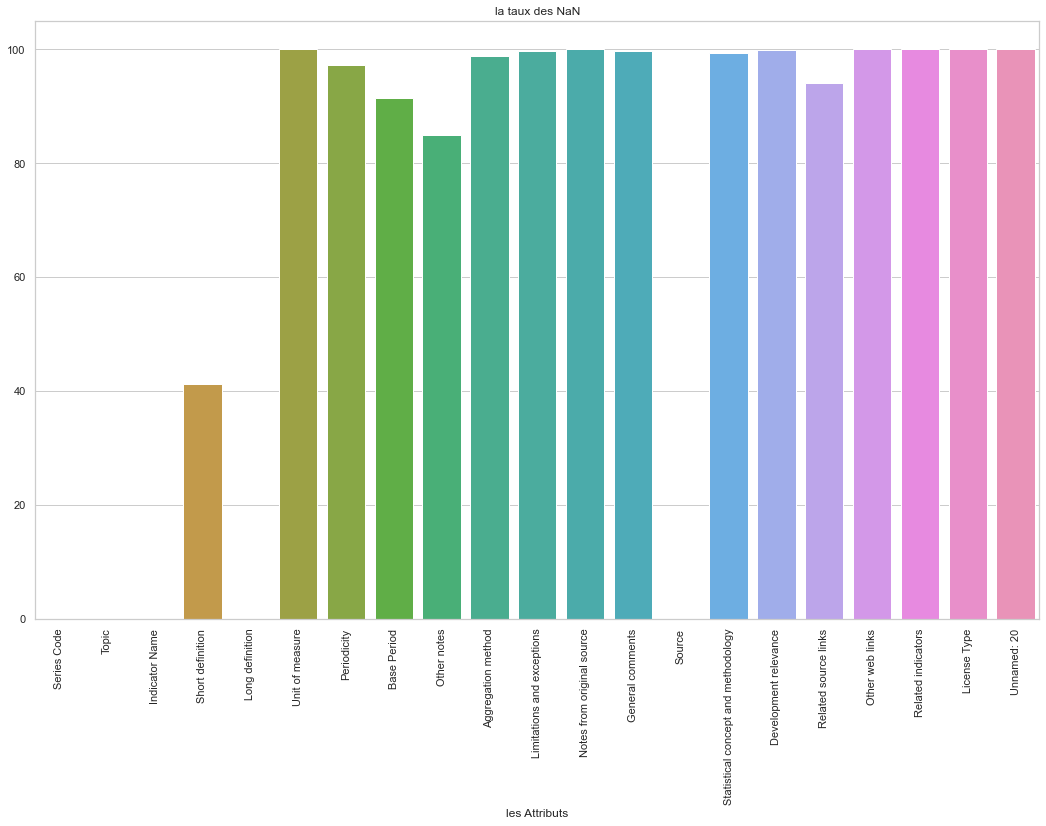

In [624]:
# Affichage du taux des valeurs NaN
fig = plt.figure(1, figsize=(18, 11))
# Liste des 30 pays ayant le score le plus élevé (par ordre décroissant)
#list_priority_countries = df_score["score"].sort_values(ascending=False)[0:30]

sns.barplot(x = Dataframe_series.columns, y = Dataframe_series_null_value)  # ,palette="Blues_d" 
plt.xticks(rotation=90)
#plt.set_xticklabels(Dataframe_data.index,rotation=45)
plt.xlabel("les Attributs")
plt.title("la taux des NaN")
plt.show()

In [625]:
Dataframe_series.head(5)
Dataframe_series.shape

(3665, 21)

In [626]:
print('--------------------------------------------------Dataframe_FootNote--------------------------------------------')
print('\n Taux des valeurs manquantes = \n',Dataframe_FootNote.isna().mean())  #   ou data.isna().any()  ;   Taux des valeurs manquantes 
print('\n  vérification du doublons identifiant unique = ',Dataframe_FootNote.duplicated('CountryCode').sum()) # doublons
#print (' \n le taux des valeurs manquantes pour chaque lignes est = \n ', Dataframe_FootNote.isna().sum() / len(Dataframe_FootNote))
Dataframe_FootNote.head(5)
Dataframe_FootNote.count  #    Taux remplissages  
# Vérifier la duplication des colonnes présenté comme clé primaires   : 
print(' le nombre de CountryCode non unique = ', Dataframe_FootNote['CountryCode'].nunique())
print(' le nombre de SeriesCode non unique = ', Dataframe_FootNote['SeriesCode'].nunique())
print(' le nombre de Year  non unique = ', Dataframe_FootNote['Year'].nunique())
print(' le nombre de DESCRIPTION non unique = ', Dataframe_FootNote['DESCRIPTION'].nunique())
#Dataframe_data['Indicator Name'].unique()

Dataframe_FootNote.duplicated() #    détecter duplicate
Dataframe_FootNote.drop_duplicates() #    Supprimer duplicata


print('-------------------------------------------------------------------------------------------------------------')

--------------------------------------------------Dataframe_FootNote--------------------------------------------

 Taux des valeurs manquantes = 
 CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
Unnamed: 4     1.0
dtype: float64

  vérification du doublons identifiant unique =  643399
 le nombre de CountryCode non unique =  239
 le nombre de SeriesCode non unique =  1558
 le nombre de Year  non unique =  56
 le nombre de DESCRIPTION non unique =  9102
-------------------------------------------------------------------------------------------------------------


In [627]:
# Calculer le taux des valeurs nulles pour chaque colonnes 
Dataframe_FootNote_null_value = Dataframe_FootNote.isnull().mean() * 100
Dataframe_FootNote_value = 100 - Dataframe_FootNote_null_value 
Dataframe_FootNote_null_value.index
Dataframe_FootNote.columns
Dataframe_FootNote_null_value

CountryCode      0.0
SeriesCode       0.0
Year             0.0
DESCRIPTION      0.0
Unnamed: 4     100.0
dtype: float64

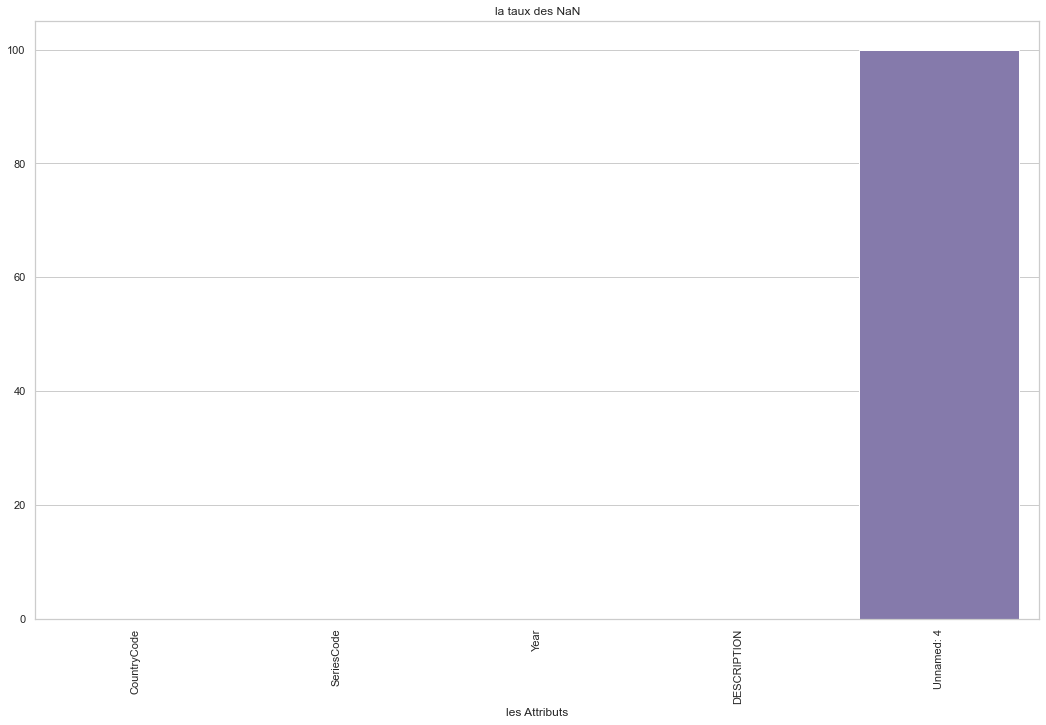

In [628]:
# Affichage du taux des valeurs NaN
fig = plt.figure(1, figsize=(18, 11))
# Liste des 30 pays ayant le score le plus élevé (par ordre décroissant)
#list_priority_countries = df_score["score"].sort_values(ascending=False)[0:30]

sns.barplot(x = Dataframe_FootNote.columns, y = Dataframe_FootNote_null_value)  # ,palette="Blues_d" 
plt.xticks(rotation=90)
#plt.set_xticklabels(Dataframe_data.index,rotation=45)
plt.xlabel("les Attributs")
plt.title("la taux des NaN")
plt.show()

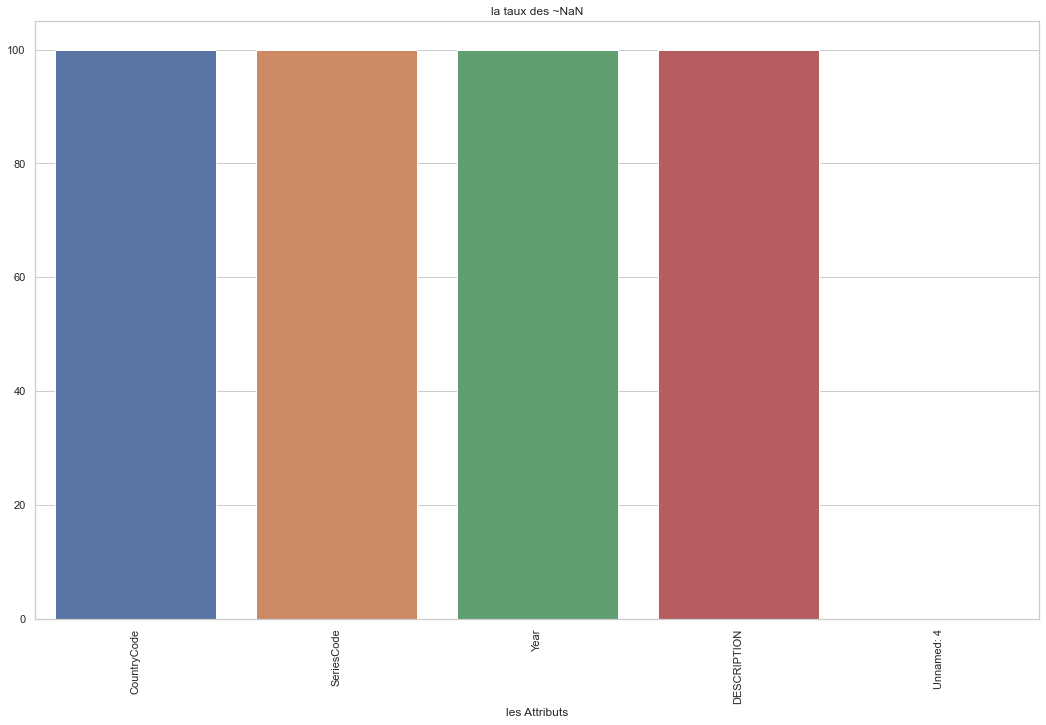

In [629]:
# Affichage du taux des valeurs NaN
fig = plt.figure(1, figsize=(18, 11))
# Liste des 30 pays ayant le score le plus élevé (par ordre décroissant)
#list_priority_countries = df_score["score"].sort_values(ascending=False)[0:30]

sns.barplot(x = Dataframe_FootNote.columns, y = Dataframe_FootNote_value)  # ,palette="Blues_d" 
plt.xticks(rotation=90)
#plt.set_xticklabels(Dataframe_data.index,rotation=45)
plt.xlabel("les Attributs")
plt.title("la taux des ~NaN")
plt.show()

In [630]:
# Supression de la colonne  Unnamed: 31
Dataframe_FootNote.head(5)
Dataframe_FootNote = Dataframe_FootNote.drop(columns='Unnamed: 4', axis = 1)   #data.drop() #    Supprimer lignes ou colones 
Dataframe_FootNote.dtypes
## Etape 2   :  exploration des données 
#data.dropna() #    TSupprime NA
#data.fillna() #    Remplacer NA

CountryCode    object
SeriesCode     object
Year           object
DESCRIPTION    object
dtype: object

In [631]:
Dataframe_FootNote.head(5)

CountryCode      SeriesCode    Year          DESCRIPTION
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.

In [632]:
Dataframe_FootNote.head(5)
Dataframe_FootNote['Year'] = Dataframe_FootNote['Year'].apply(lambda x : x[2:]) # supprimer les deux premières lettres
Dataframe_FootNote.head(5)

CountryCode      SeriesCode  Year          DESCRIPTION
0         ABW  SE.PRE.ENRL.FE  2001  Country estimation.
1         ABW  SE.TER.TCHR.FE  2005  Country estimation.
2         ABW  SE.PRE.TCHR.FE  2000  Country estimation.
3         ABW  SE.SEC.ENRL.GC  2004  Country estimation.
4         ABW     SE.PRE.TCHR  2006  Country estimation.

In [633]:
print('--------------------------------------------Dataframe_Country_Series-----------------------------------------')
print('\n Taux des valeurs manquantes = \n', Dataframe_Country_Series.isna().mean())  #   ou data.isna().any()  ;   Taux des valeurs manquantes 
print('\n  vérification du doublons identifiant unique = ',Dataframe_Country_Series.duplicated('CountryCode').sum()) # doublons
#print ('\n  le taux des valeurs manquantes pour chaque lignes est = \n ', Dataframe_Country_Series.isna().sum() / len(Dataframe_Country_Series))
print('-------------------------------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------------------------------')
Dataframe_Country_Series.columns
Dataframe_Country_Series.head(5)
Dataframe_Country_Series.count  #    Taux remplissages  
# Vérifier la duplication des colonnes présenté comme clé primaires   : 
print(' le nombre de CountryCode non unique = ', Dataframe_Country_Series['CountryCode'].nunique())
print(' le nombre de SeriesCode non unique = ', Dataframe_Country_Series['SeriesCode'].nunique())
print(' le nombre de DESCRIPTION non unique = ', Dataframe_Country_Series['DESCRIPTION'].nunique())
#Dataframe_data['Indicator Name'].unique()

Dataframe_Country_Series.duplicated() #    détecter duplicate
Dataframe_Country_Series.drop_duplicates() #    Supprimer duplicata

# Supression de la colonne  Unnamed: 31
Dataframe_Country_Series.head(5)
#Dataframe_Country_Series = Dataframe_Country_Series.drop(columns='Unnamed: 4', axis = 1)   #data.drop() #    Supprimer lignes ou colones 
Dataframe_Country_Series.dtypes
## Etape 2   :  exploration des données 
#data.dropna() #    TSupprime NA
#data.fillna() #    Remplacer NA

--------------------------------------------Dataframe_Country_Series-----------------------------------------

 Taux des valeurs manquantes = 
 CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
Unnamed: 3     1.0
dtype: float64

  vérification du doublons identifiant unique =  402
-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------
 le nombre de CountryCode non unique =  211
 le nombre de SeriesCode non unique =  21
 le nombre de DESCRIPTION non unique =  97


CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

In [634]:
# Calculer le taux des valeurs nulles pour chaque colonnes 
Dataframe_Country_Series_null_value = Dataframe_Country_Series.isnull().mean() * 100
Dataframe_Country_Series_value = 100 - Dataframe_Country_Series_null_value 
Dataframe_Country_Series_null_value.index
Dataframe_Country_Series.columns
Dataframe_Country_Series_null_value

CountryCode      0.0
SeriesCode       0.0
DESCRIPTION      0.0
Unnamed: 3     100.0
dtype: float64

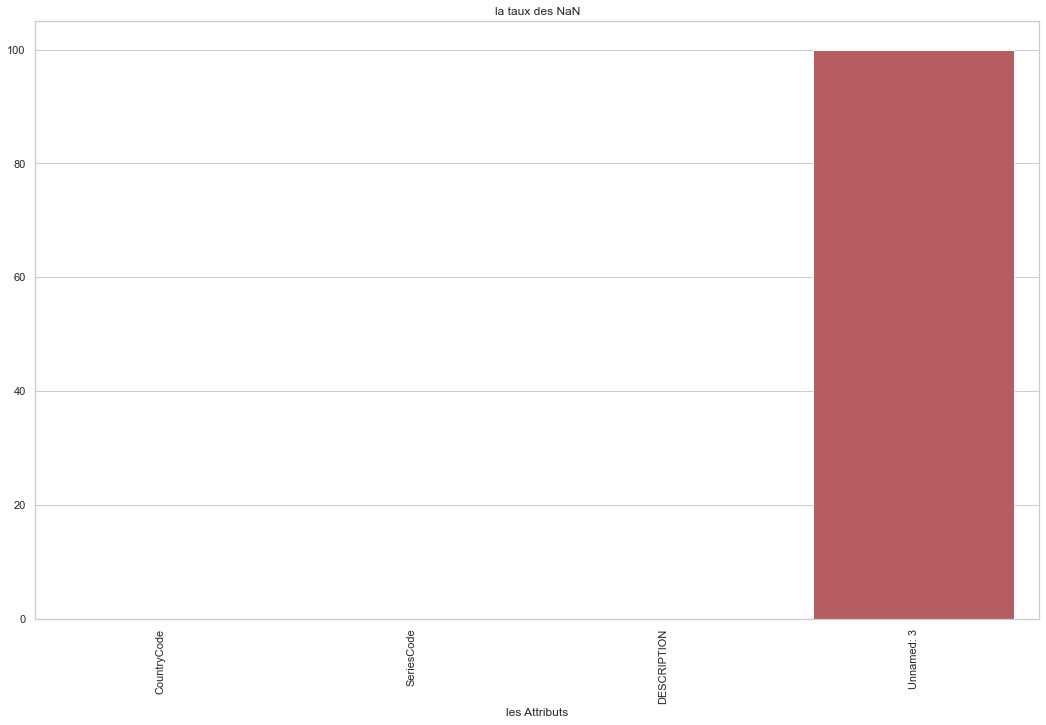

In [635]:
# Affichage du taux des valeurs NaN
fig = plt.figure(1, figsize=(18, 11))
# Liste des 30 pays ayant le score le plus élevé (par ordre décroissant)
#list_priority_countries = df_score["score"].sort_values(ascending=False)[0:30]

sns.barplot(x = Dataframe_Country_Series.columns, y = Dataframe_Country_Series_null_value)  # ,palette="Blues_d" 
plt.xticks(rotation=90)
#plt.set_xticklabels(Dataframe_data.index,rotation=45)
plt.xlabel("les Attributs")
plt.title("la taux des NaN")
plt.show()

In [636]:
Dataframe_Country_Series = Dataframe_Country_Series.drop(['Unnamed: 3'], axis=1) 
Dataframe_Country_Series.head(5)

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  
0  Data sources : United Nations World Population...  
1  Data sources: United Nations World Population ...  
2  Data sources: United Nations World Population ...  
3                 Estimates are based on regression.  
4  Data sources : United Nations World Population...

## --------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------

## 3 - Exploitation des données : 
Analyse statistiques , création de nouveau indicateurs , filtrage , jointure de fichiers , visualisation , 

In [637]:
Dataframe_data.shape

(886930, 69)

In [638]:
Dataframe_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

In [639]:
Dataframe_FootNote.head(6)
#Dataframe_FootNote.dtypes

CountryCode      SeriesCode  Year          DESCRIPTION
0         ABW  SE.PRE.ENRL.FE  2001  Country estimation.
1         ABW  SE.TER.TCHR.FE  2005  Country estimation.
2         ABW  SE.PRE.TCHR.FE  2000  Country estimation.
3         ABW  SE.SEC.ENRL.GC  2004  Country estimation.
4         ABW     SE.PRE.TCHR  2006  Country estimation.
5         ABW     SE.PRE.NENR  2000  Country estimation.

In [640]:
Dataframe_FootNote['Year'].sort_values().unique()

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2020', '2025', '2030', '2035', '2040', '2045', '2050'],
      dtype=object)

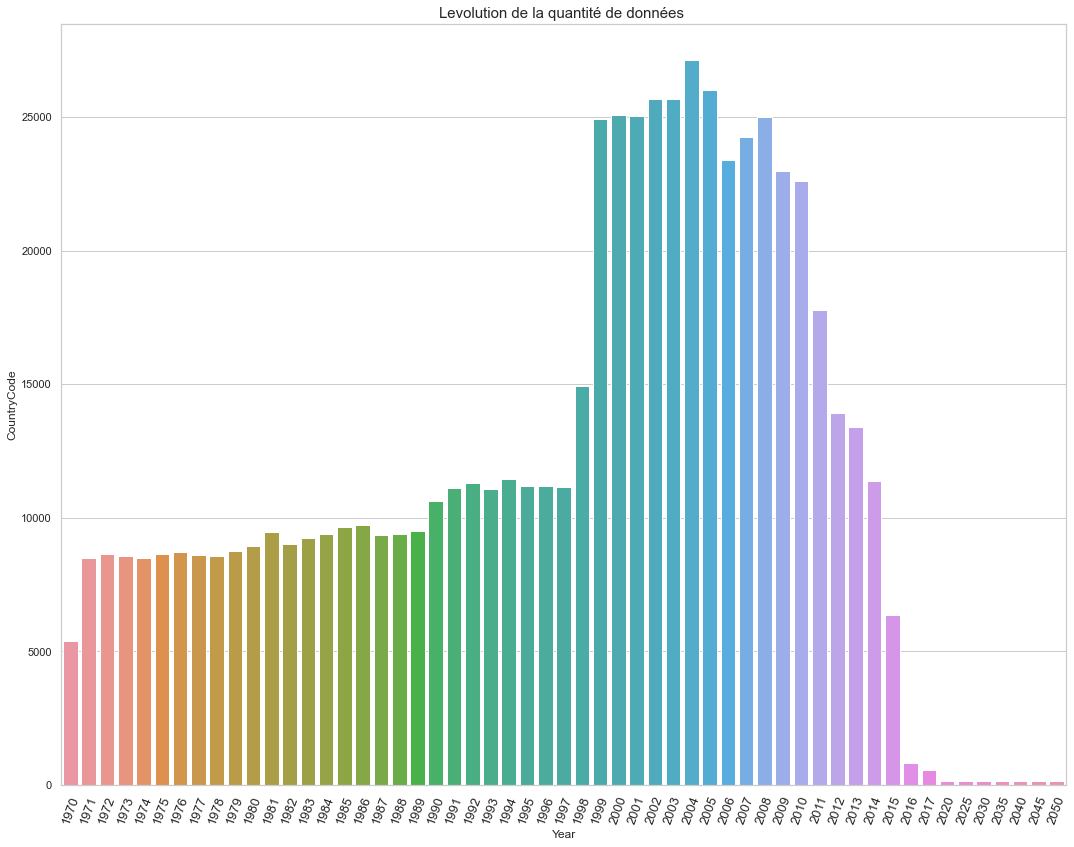

In [641]:
Dataframe_FootNote.shape
Dataframe_FootNote.head()
sns.set(style="whitegrid")
colors = ["#bd5db0","#70a845","#727bcc","#b49242"]
plt.figure(figsize=(18, 14))
plt.title('L''evolution de la quantité de données ', size=15)
plt.xlabel('les années')
plt.ylabel('la quantité de donnée')
plot = sns.barplot(y = 'CountryCode', x='Year', data = Dataframe_FootNote.groupby('Year').count().reset_index())
plot.set_xticklabels(labels = Dataframe_FootNote.groupby('Year').count().reset_index()['Year'], rotation=70, size=13)

plt.show()

In [642]:
Dataframe_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

In [643]:
Dataframe_data_copy = Dataframe_data.copy()

In [644]:
#  regrouper les années par 20 ans ,
Dataframe_data['1980s'] = Dataframe_data[[str(year) for year in range(1970,1990,1)]].mean(1)
Dataframe_data['2000s'] = Dataframe_data[[str(year) for year in range(1990,2010,1)]].mean(1)
Dataframe_data['2010s'] = Dataframe_data[[str(year) for year in [2010,2011,2012,2013,2014,2015,2016,2017]]].mean(1)
Dataframe_data['2030s'] = Dataframe_data[[str(year) for year in [2020,2025,2030,2035,2040]]].mean(1)
Dataframe_data['2050s'] = Dataframe_data[[str(year) for year in [2040,2045,2050,2055,2060]]].mean(1)
Dataframe_data['2070s'] = Dataframe_data[[str(year) for year in [2060,2065,2070,2075,2080]]].mean(1)
Dataframe_data['2090s'] = Dataframe_data[[str(year) for year in [2080,2085,2090,2095,2100]]].mean(1)

In [645]:
Dataframe_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', '1980s', '2000s', '2010s', '2030s', '2050s', '2070s',
       '2090s'],
      dtype='object')

In [646]:
Dataframe_data.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'], axis=1, inplace=True)

In [647]:
Dataframe_data.shape

(886930, 11)

In [648]:
Dataframe_data_copy.shape

(886930, 69)

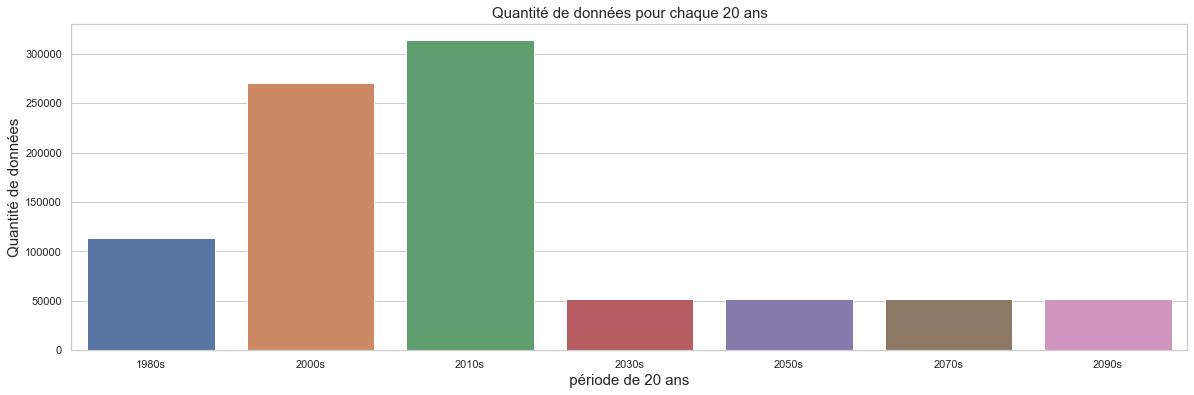

In [649]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
plt.title('Quantité de données pour chaque 20 ans', size=15)
plt.xlabel('  période de 20 ans  ',size=15)
plt.ylabel(' Quantité de données ',size=15)
plot = sns.barplot(y = Dataframe_data.shape[0] - Dataframe_data[[ '1980s', '2000s', '2010s', '2030s', '2050s', '2070s', '2090s']].isna().sum().values, 
                   x = Dataframe_data[[ '1980s', '2000s', '2010s', '2030s', '2050s', '2070s', '2090s']].isna().sum().index)
plt.show()

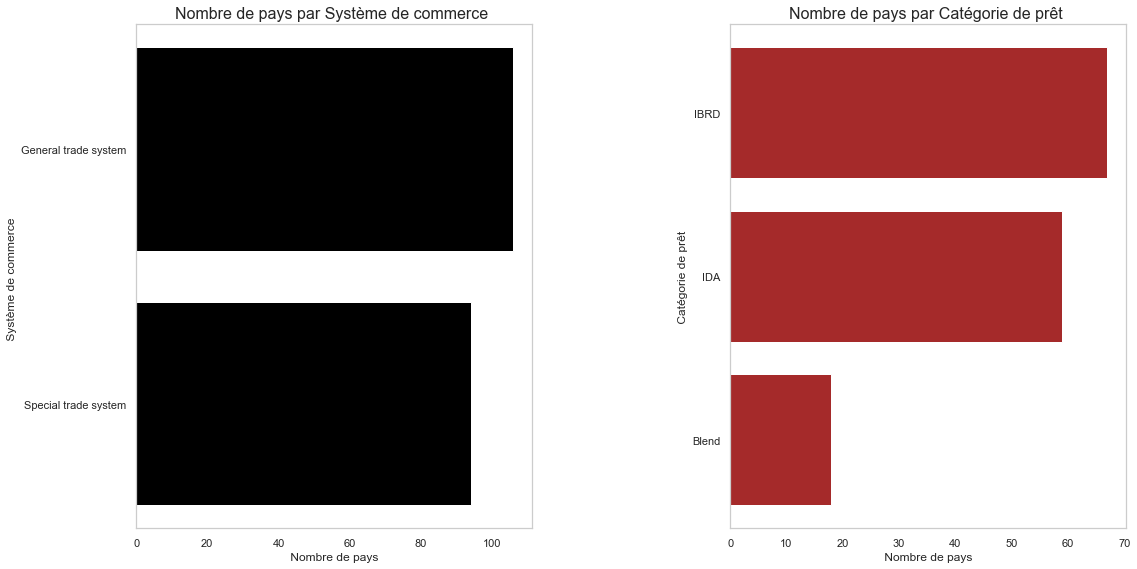

In [650]:
plt.figure(1,figsize=(10,10))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,
                          top = 0.9, wspace = 0.5, hspace = 0)
plt.subplot(1,2,1)
plt.barh(y = Dataframe_country.groupby('System of trade')[['Long Name']].count().reset_index().sort_values(by='Long Name')['System of trade'], width = Dataframe_country.groupby('System of trade')[['Long Name']].count()['Long Name'].sort_values(),color='black')
plt.title('Nombre de pays par Système de commerce ',size = 16)
plt.xlabel(' Nombre de pays ')
plt.ylabel(' Système de commerce  ')
plt.grid()  

plt.subplot(1,2,2)
plt.barh(y = Dataframe_country.groupby('Lending category')[['Long Name']].count().reset_index().sort_values(by='Long Name')['Lending category'], width = Dataframe_country.groupby('Lending category')[['Long Name']].count()['Long Name'].sort_values() , color='brown')
plt.title('Nombre de pays par Catégorie de prêt ', size = 16)
plt.xlabel(' Nombre de pays ')
plt.ylabel(' Catégorie de prêt ')
plt.grid()

plt.show()

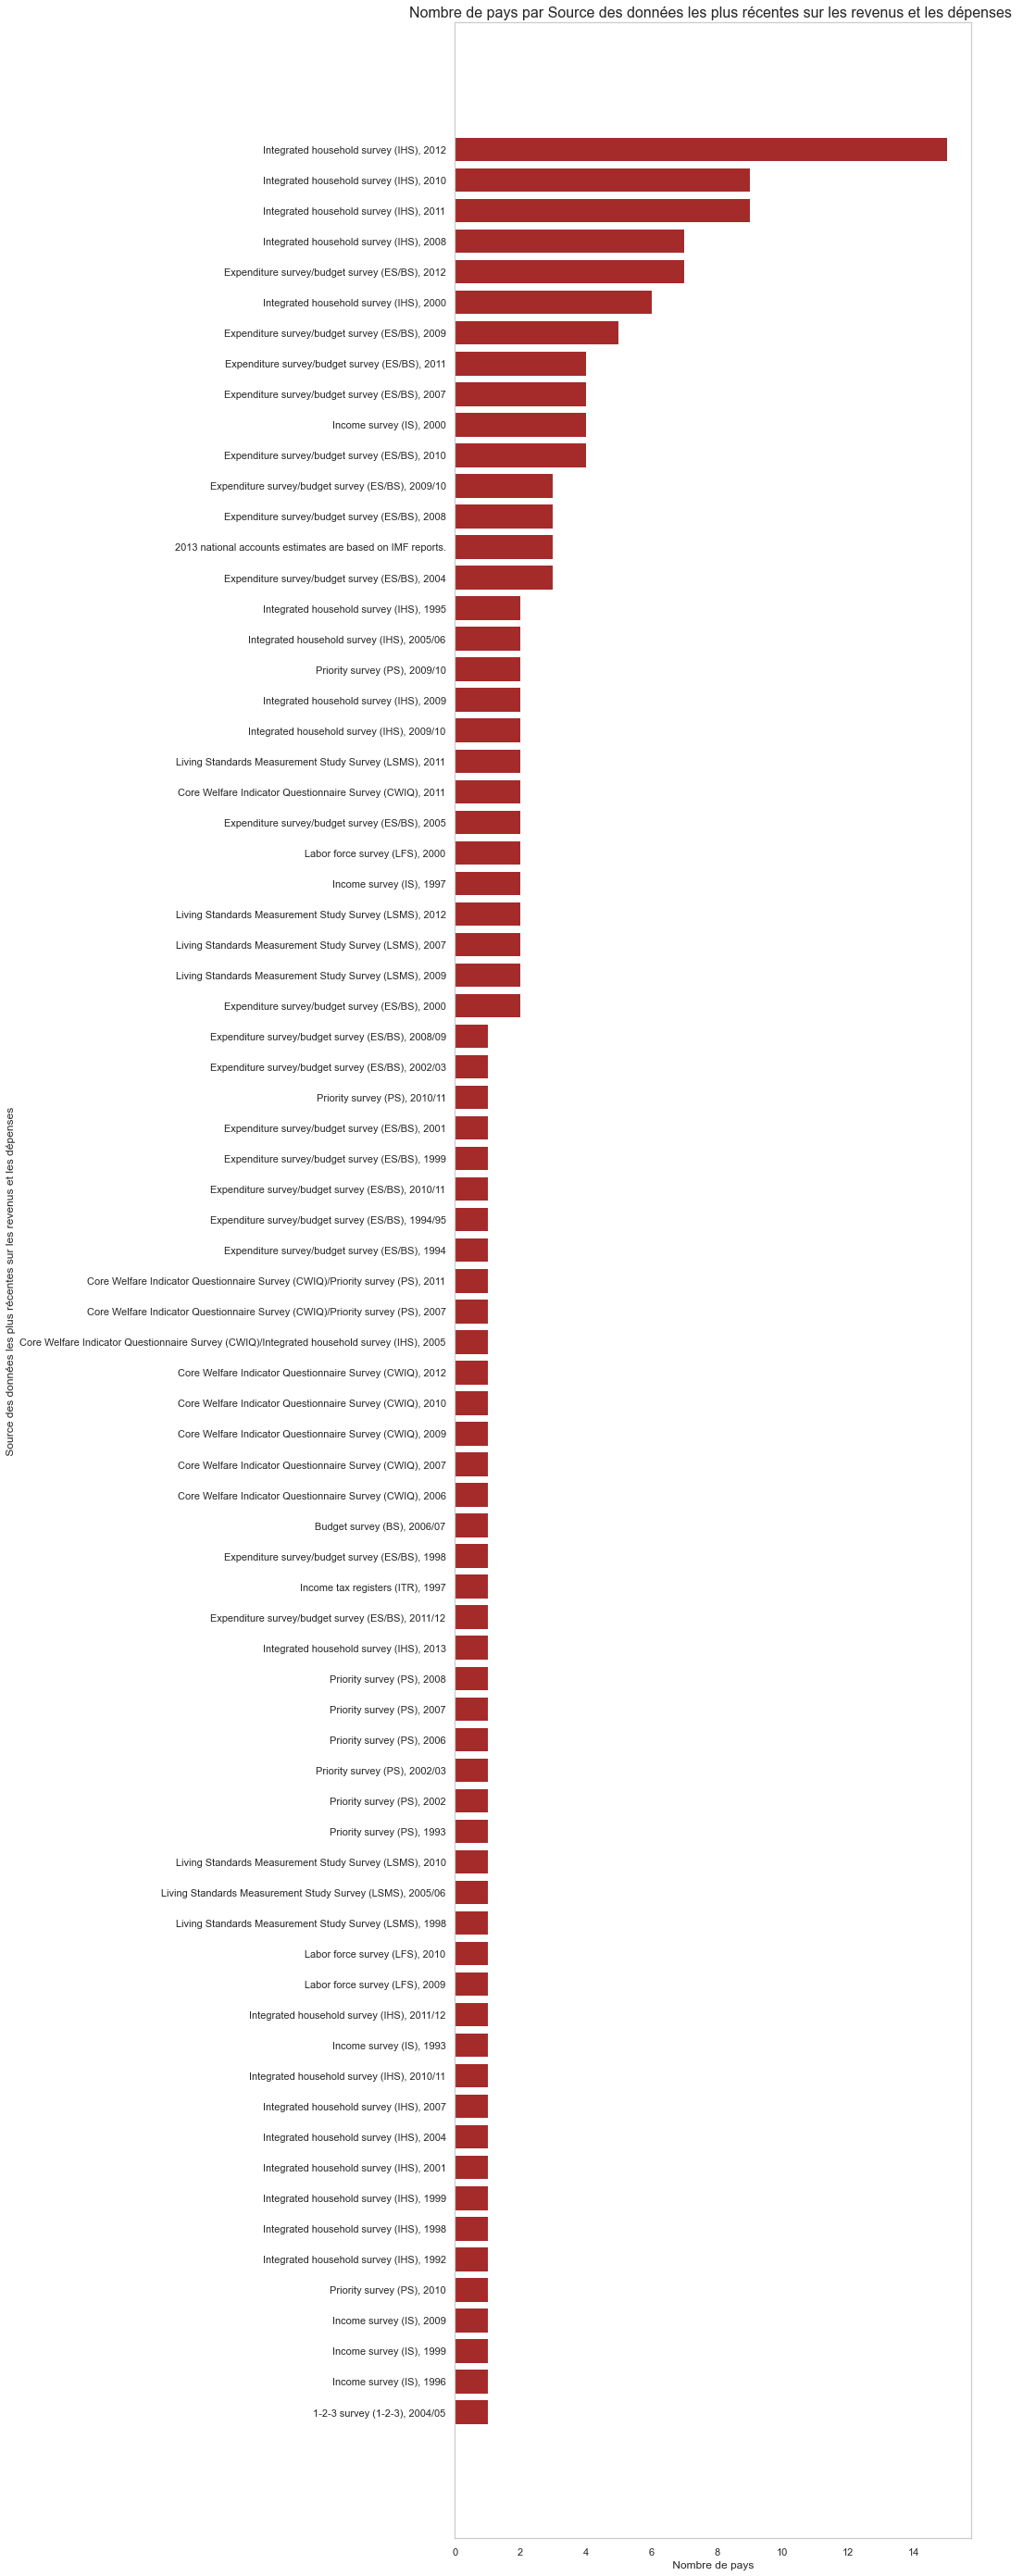

In [651]:
plt.figure(figsize=(10,50))
plt.barh(y = Dataframe_country.groupby('Source of most recent Income and expenditure data')[['Long Name']].count().reset_index().sort_values(by='Long Name')['Source of most recent Income and expenditure data'], width = Dataframe_country.groupby('Source of most recent Income and expenditure data')[['Long Name']].count()['Long Name'].sort_values() , color='brown')
plt.title('Nombre de pays par Source des données les plus récentes sur les revenus et les dépenses ', size = 16)
plt.xlabel(' Nombre de pays ')
plt.ylabel(' Source des données les plus récentes sur les revenus et les dépenses ')
plt.grid()
plt.show()

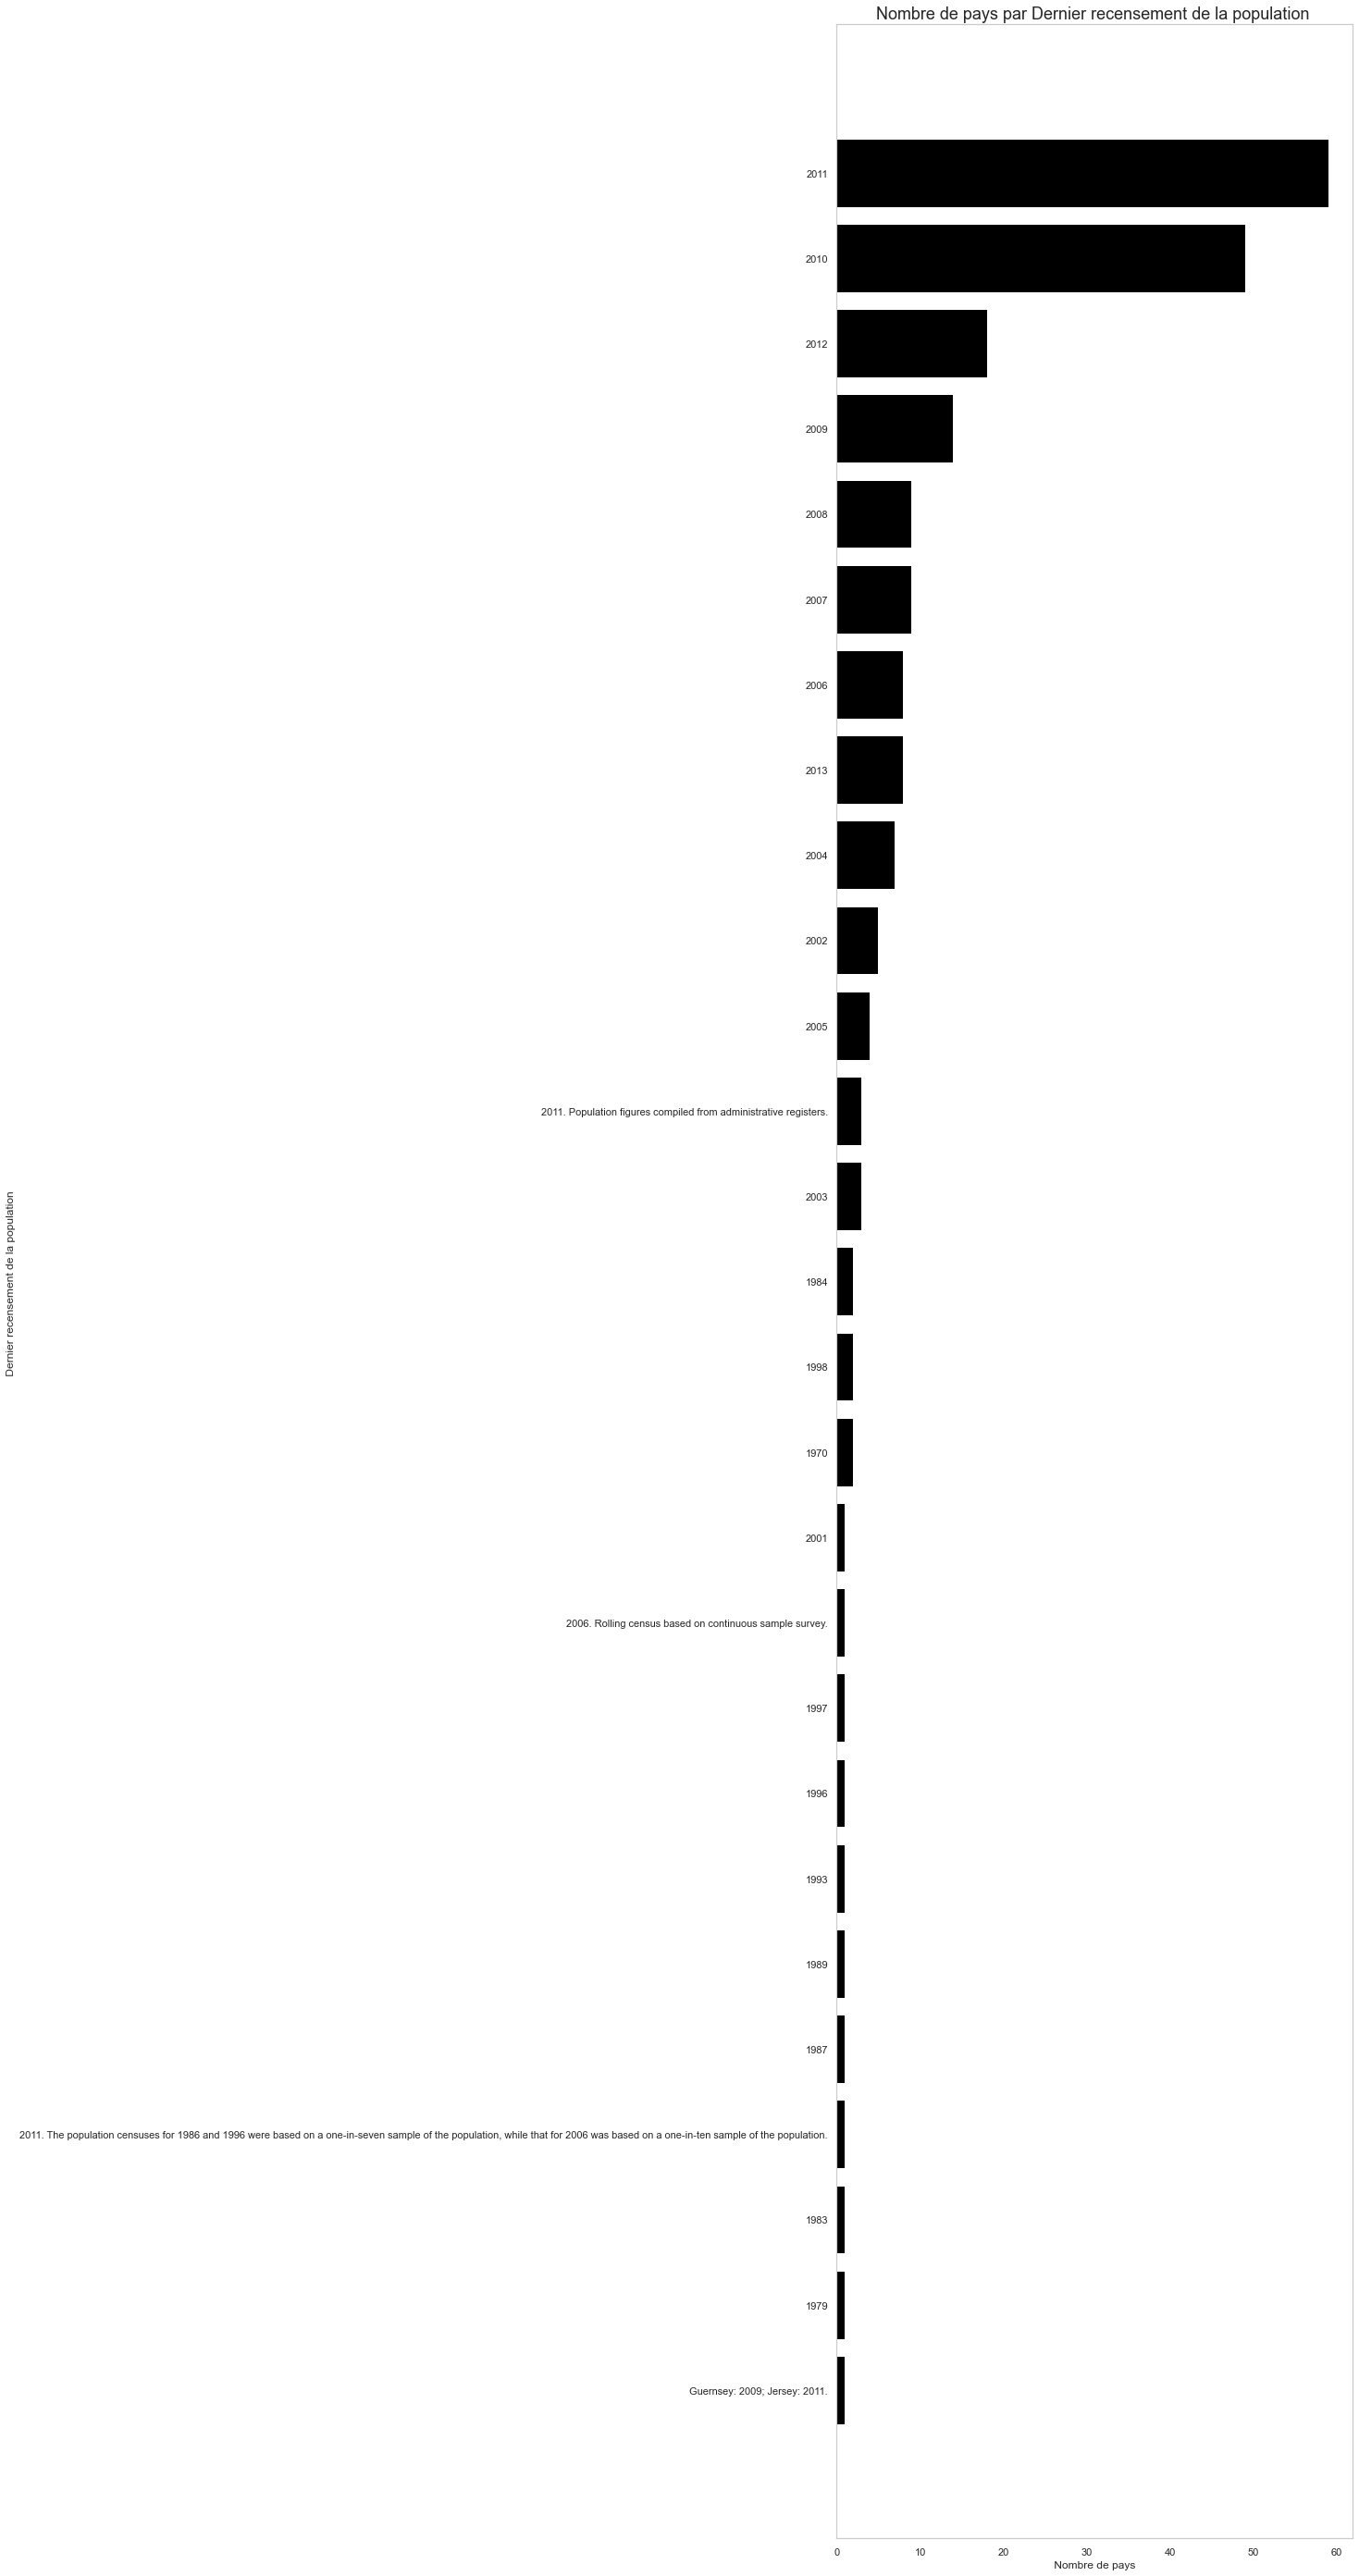

In [652]:
plt.figure(figsize=(10,50))
plt.barh(y = Dataframe_country.groupby('Latest population census')[['Long Name']].count().reset_index().sort_values(by='Long Name')['Latest population census'], width = Dataframe_country.groupby('Latest population census')[['Long Name']].count()['Long Name'].sort_values(),color='black')
plt.title('Nombre de pays par Dernier recensement de la population ',size = 18)
plt.xlabel(' Nombre de pays ')
plt.ylabel(' Dernier recensement de la population  ')
plt.grid()
#plt.show()  

In [653]:
Dataframe_country.shape
Dataframe_country.head()
Dataframe_country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object')

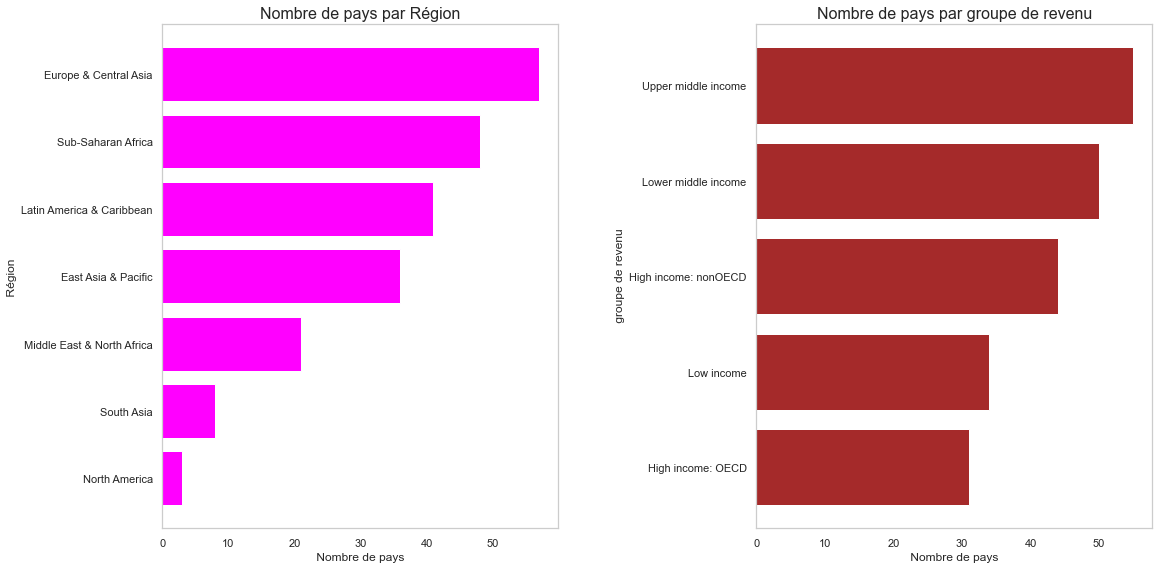

In [654]:
plt.figure(1,figsize=(10,10))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,
                          top = 0.9, wspace = 0.5, hspace = 0)
plt.subplot(1,2,1)
#plt.figure(figsize=(5,5))
#sns.barplot(x= country.groupby('Region')[['Short Name']].count()['Short Name'].sort_values(), y = country.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name')['Region'])
plt.barh(y = Dataframe_country.groupby('Region')[['Long Name']].count().reset_index().sort_values(by='Long Name')['Region'], width = Dataframe_country.groupby('Region')[['Long Name']].count()['Long Name'].sort_values(),color='magenta')
plt.title('Nombre de pays par Région',size = 16)
plt.xlabel(' Nombre de pays ')
plt.ylabel(' Région ')
plt.grid()
#plt.show()  

plt.subplot(1,2,2)
#plt.figure(figsize=(5,5))
plt.barh(y = Dataframe_country.groupby('Income Group')[['Long Name']].count().reset_index().sort_values(by='Long Name')['Income Group'], width = Dataframe_country.groupby('Income Group')[['Long Name']].count()['Long Name'].sort_values() , color='brown')
plt.title('Nombre de pays par groupe de revenu', size = 16)
plt.xlabel(' Nombre de pays ')
plt.ylabel(' groupe de revenu')
plt.grid()

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


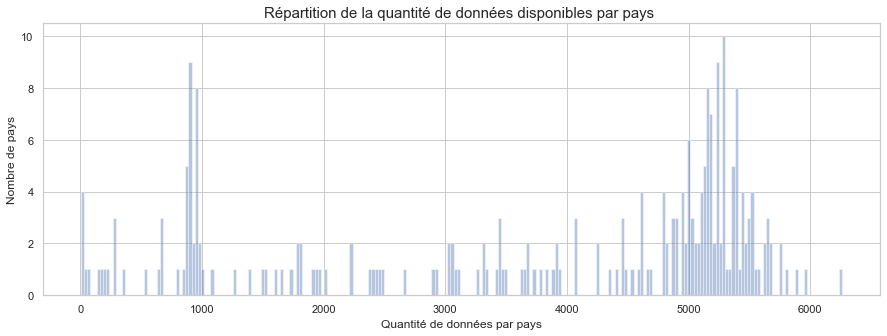

In [655]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
plt.xlabel('Quantité de données par pays', size=12)
plt.ylabel('Nombre de pays', size=12)
plt.title('Répartition de la quantité de données disponibles par pays ', size=15)
plot = sns.distplot(Dataframe_data.groupby('Country Name')[['1980s', '2000s', '2010s', '2030s', '2050s', '2070s', '2090s']].count().sum(axis=1).sort_values().values, bins = 241, norm_hist = False, hist_kws=dict(cumulative=False),
             kde = False)
plt.show()

In [656]:
Dataframe_country.shape
Dataframe_country.columns
print(Dataframe_country.isnull().sum(axis = 0))
Dataframe_country.isna().sum().sort_values(ascending=False)

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

National accounts reference year                     209
Alternative conversion factor                        194
Other groups                                         183
Latest industrial data                               134
Vital registration complete                          130
External debt Reporting status                       117
Latest household survey                              100
Latest agricultural census                            99
Lending category                                      97
Special Notes                                         96
PPP survey year                                       96
Source of most recent Income and expenditure data     81
Government Accounting concept                         80
Latest water withdrawal data                          62
Balance of Payments Manual in use                     60
IMF data dissemination standard                       60
Latest trade data                                     56
SNA price valuation            

## -------------------------------------------------------------------------------------------------------------------
## -------------------------------------------------------------------------------------------------------------------
## -------------------------------------------------------------------------------------------------------------------
## -------------------------------------------------------------------------------------------------------------------

## Fusion des Dataframe        
- 1  -   Fusion de Datframe  : Dataframe_Country_Series avec Dataframe_FootNote
- 2  -   Fusion de Datframe  : Dataframe_Country avec Dataframe_data

In [657]:
############  Etape 3 
#data.loc[]  #  selcetion de ligne ou colone
#data.iloc[]  #  selcetion de ligne ou colone
#data.['col2'] # selection colonne
#data.[['col2', 'col3']] # selection colonnes
#data.plot(kind='bar') # tracer gaphiques de type 
#data.describe() # statistiques
#data.apply(np.max)   # appliquer la focntion max 
#data.groupby('col2')['col3'].max()   # grouper et aggréger 
#data[data['col2'] == 10]  # condition de filtrage
#data['newcol']= 0 #  création d'une colonne vide
#data['sumcol'] = data['col2'] + data['col3']   # la somme de deux colonnes 

In [658]:
# Liste des Dataframe 
Dataframe_data_copy
Dataframe_data
Dataframe_country
Dataframe_series
Dataframe_Country_Series
Dataframe_FootNote

CountryCode      SeriesCode  Year  \
0              ABW  SE.PRE.ENRL.FE  2001   
1              ABW  SE.TER.TCHR.FE  2005   
2              ABW  SE.PRE.TCHR.FE  2000   
3              ABW  SE.SEC.ENRL.GC  2004   
4              ABW     SE.PRE.TCHR  2006   
...            ...             ...   ...   
643633         ZWE     SH.DYN.MORT  2007   
643634         ZWE     SH.DYN.MORT  2014   
643635         ZWE     SH.DYN.MORT  2015   
643636         ZWE     SH.DYN.MORT  2017   
643637         ZWE     SP.POP.GROW  2017   

                                   DESCRIPTION  
0                          Country estimation.  
1                          Country estimation.  
2                          Country estimation.  
3                          Country estimation.  
4                          Country estimation.  
...                                        ...  
643633       Uncertainty bound is 91.6 - 109.3  
643634          Uncertainty bound is 54.3 - 76  
643635        Uncertainty bound is 48.3 - 73.3  
643636  5-year average value between 0s and 5s  
643637  5-year average value between 0s and 5s  

[643638 rows x 4 columns]

In [659]:
Dataframe_data_copy.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

In [660]:
DataframeC_S_FN = Dataframe_FootNote.merge(right = Dataframe_Country_Series[['CountryCode', 'SeriesCode','DESCRIPTION']], 
                  on=['CountryCode','SeriesCode','DESCRIPTION'], how='left')
DataframeC_S_FN.head()
DataframeC_S_FN.shape
#print(Dataframe_country.isnull().sum(axis = 0))


(643638, 4)

In [661]:
DataframeC_S_FN.head(5)

CountryCode      SeriesCode  Year          DESCRIPTION
0         ABW  SE.PRE.ENRL.FE  2001  Country estimation.
1         ABW  SE.TER.TCHR.FE  2005  Country estimation.
2         ABW  SE.PRE.TCHR.FE  2000  Country estimation.
3         ABW  SE.SEC.ENRL.GC  2004  Country estimation.
4         ABW     SE.PRE.TCHR  2006  Country estimation.

In [662]:
DataframeC_S_FN.shape

(643638, 4)

In [663]:
Dataframe_Country_Series.dtypes

CountryCode    object
SeriesCode     object
DESCRIPTION    object
dtype: object

In [664]:
Dataframe_FootNote.dtypes

CountryCode    object
SeriesCode     object
Year           object
DESCRIPTION    object
dtype: object

In [665]:
Dataframe_Country_Series.head(5)
Dataframe_FootNote.head(5)
DataframeC_S_FN = Dataframe_Country_Series.merge(Dataframe_FootNote, left_on='CountryCode' , right_on='CountryCode')
DataframeC_S_FN.head(5)


CountryCode SeriesCode_x                                      DESCRIPTION_x  \
0         ABW  SP.POP.TOTL  Data sources : United Nations World Population...   
1         ABW  SP.POP.TOTL  Data sources : United Nations World Population...   
2         ABW  SP.POP.TOTL  Data sources : United Nations World Population...   
3         ABW  SP.POP.TOTL  Data sources : United Nations World Population...   
4         ABW  SP.POP.TOTL  Data sources : United Nations World Population...   

     SeriesCode_y  Year        DESCRIPTION_y  
0  SE.PRE.ENRL.FE  2001  Country estimation.  
1  SE.TER.TCHR.FE  2005  Country estimation.  
2  SE.PRE.TCHR.FE  2000  Country estimation.  
3  SE.SEC.ENRL.GC  2004  Country estimation.  
4     SE.PRE.TCHR  2006  Country estimation.

In [666]:
DataframeC_S_FN.columns

Index(['CountryCode', 'SeriesCode_x', 'DESCRIPTION_x', 'SeriesCode_y', 'Year',
       'DESCRIPTION_y'],
      dtype='object')

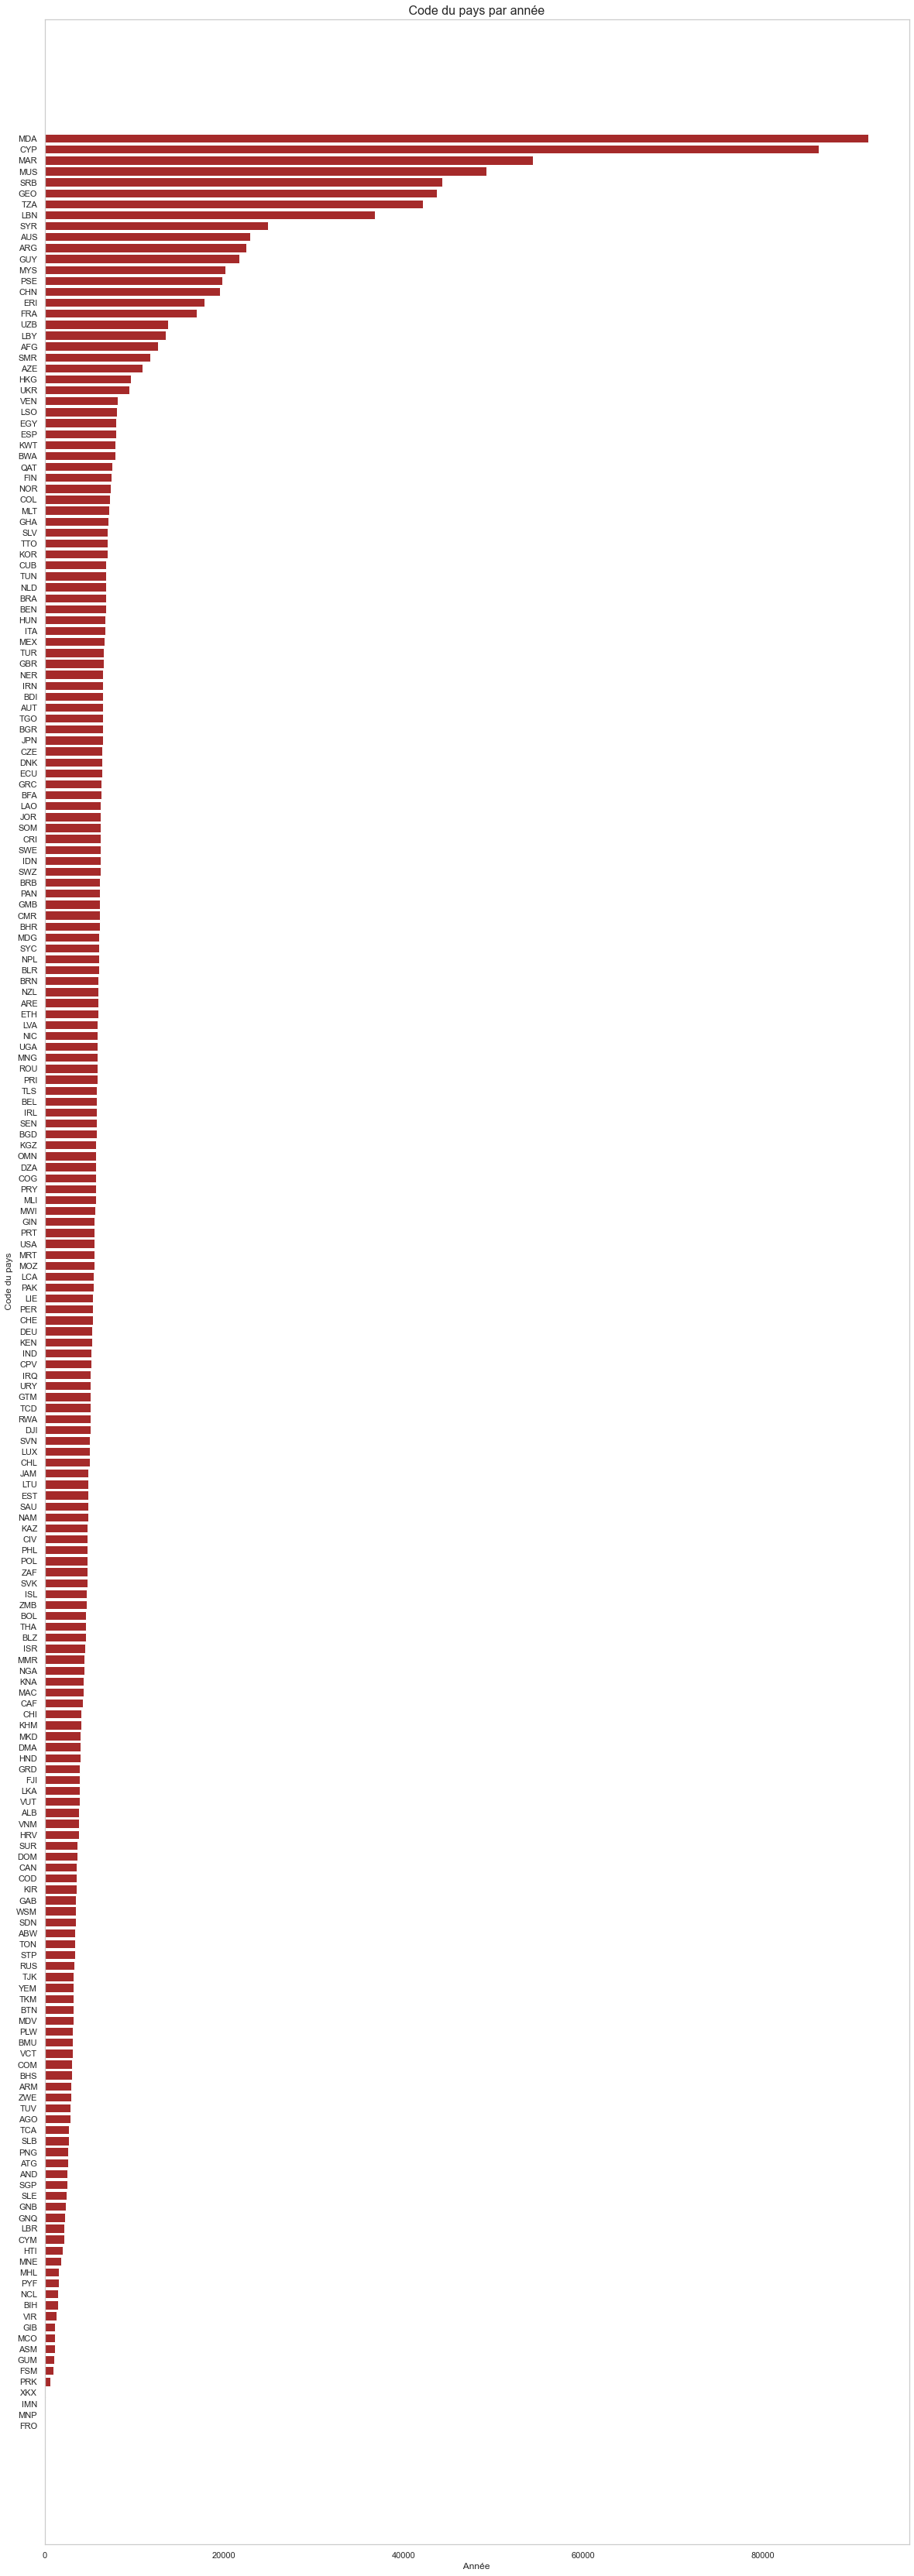

In [667]:
plt.figure(figsize=(20,60))
plt.barh(y = DataframeC_S_FN.groupby('CountryCode')[['Year']].count().reset_index().sort_values(by='Year')['CountryCode'], width = DataframeC_S_FN.groupby('CountryCode')[['Year']].count()['Year'].sort_values() , color='brown')
plt.title(' Code du pays par année ', size = 16)
plt.xlabel(' Année ')
plt.ylabel(' Code du pays')
plt.grid()
plt.show()

##  La deuxième fusion  
2 - Fusion de Datframe : Dataframe_Country avec Dataframe_data_copy

In [668]:
#data1 = Dataframe_data_copy.merge(right = Dataframe_country[['Country Code', 'Region']], on='Country Code', how='left')

In [669]:
#  merge les deux Dataframe_data ( 20 ans ) et Dataframe_country  comme data1
data1 = Dataframe_data.merge(right = Dataframe_country[['Country Code', 'Region']], 
                  on='Country Code', how='left')


#  merge les deux Dataframe_data ( original) et Dataframe_country  comme data1 
data2 = Dataframe_data_copy.merge(right = Dataframe_country[['Country Code', 'Region']], 
                  on='Country Code', how='left')

In [670]:
data1.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1980s', '2000s', '2010s', '2030s', '2050s', '2070s', '2090s',
       'Region'],
      dtype='object')

In [671]:
data2.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Region'],
      dtype='object')

In [672]:
data1_vingt = data1.copy()
data2_copy = data2.copy()

In [673]:
#Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
   #    '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
   #    '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
  #     '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
  #     '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
 #      '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
  #     '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
  #     '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
  #     '2095', '2100', 'Unnamed: 69', '1970s', '1980s', '1990s', '2000s',
  #     '2010s', '2020s', '2030s', '2040s', '2050s', '2060s', '2070s', '2080s',
  #     '2090s', '2100s', 'Region'],
  #    dtype='object')

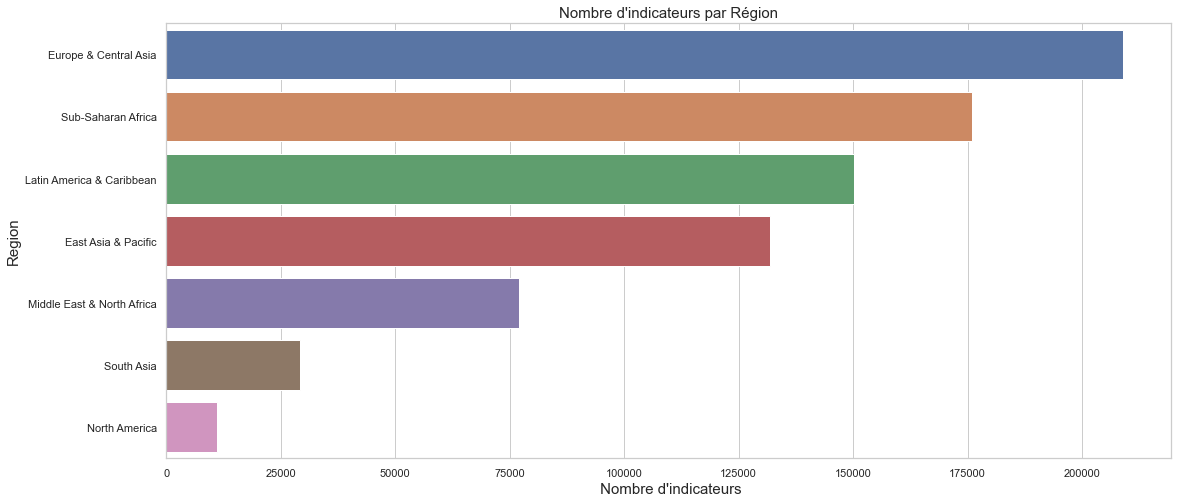

In [674]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 8))
plt.title('Nombre d\'indicateurs par Région', size=15)
plt.ylabel(' Région ',size=15)
plt.xlabel(' Nombre d\'indicateurs',size=15)
plot = sns.barplot(x = data1.groupby('Region')[['Indicator Name']].count().sum(axis=1).sort_values(ascending = False).values, 
                   y = data1.groupby('Region')[['Indicator Name']].count().sum(axis=1).sort_values(ascending = False).index)
plt.show()

In [675]:
data1_vingt.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1980s', '2000s', '2010s', '2030s', '2050s', '2070s', '2090s',
       'Region'],
      dtype='object')

In [678]:
data1_vingt.shape

(886930, 12)

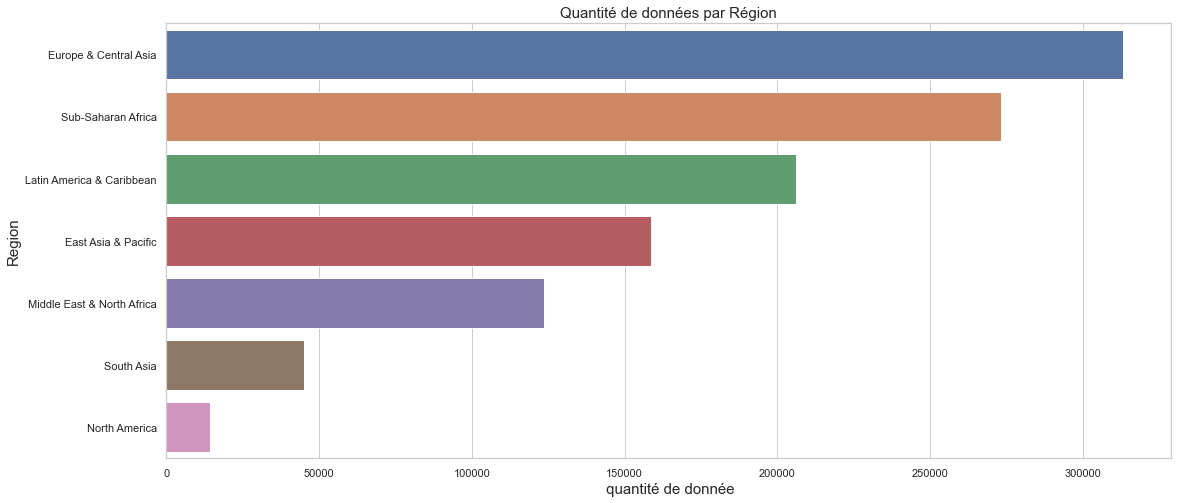

In [680]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 8))
plt.title('Quantité de données par Région', size=15)
plt.ylabel(' Région ',size=15)
plt.xlabel(' quantité de donnée',size=15)
plot = sns.barplot(x = data2.groupby('Region')[['1970', '1980', '1990', '2000', '2010', '2020', '2030', '2040',
       '2050', '2060', '2070', '2080', '2090', '2100']].count().sum(axis=1).sort_values(ascending = False).values, 
                   y = data2.groupby('Region')[['1970', '1980', '1990', '2000', '2010', '2020', '2030', '2040',
       '2050', '2060', '2070', '2080', '2090', '2100']].count().sum(axis=1).sort_values(ascending = False).index)
plt.show()

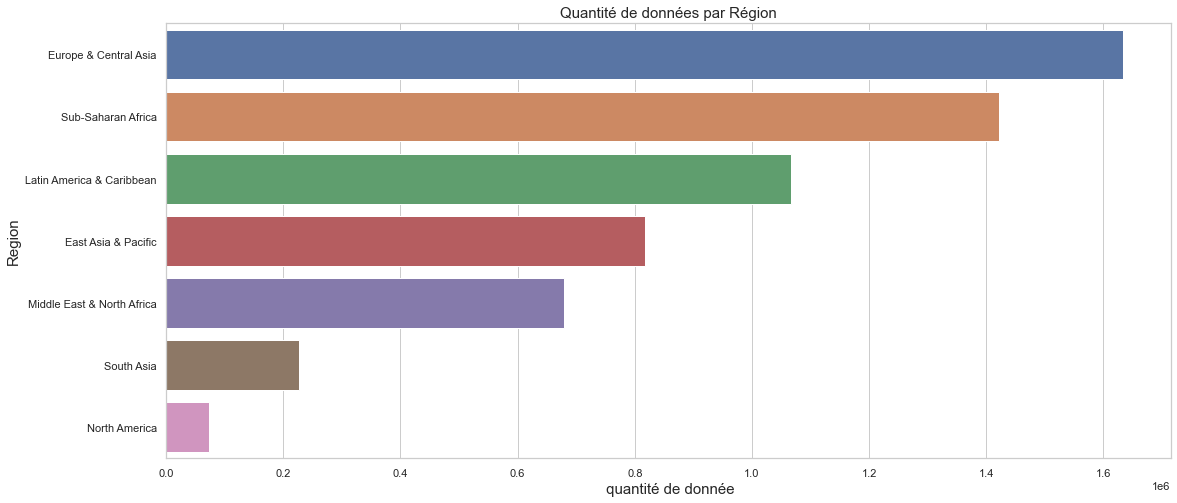

In [681]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 8))
plt.title('Quantité de données par Région', size=15)
plt.ylabel(' Région ',size=15)
plt.xlabel(' quantité de donnée',size=15)
plot = sns.barplot(x = data2.groupby('Region')[['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987','1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045','2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100','1970', '1980', '1990', '2000', '2010', '2020',
       '2030', '2040', '2050', '2060', '2070', '2080', '2090', '2100']].count().sum(axis=1).sort_values(ascending = False).values, 
                   y = data2.groupby('Region')[['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978','1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987','1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045','2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100','1970', '1980', '1990', '2000', '2010', '2020', '2030', '2040', '2050', '2060', '2070', '2080', '2090', '2100']].count().sum(axis=1).sort_values(ascending = False).index)
plt.show()

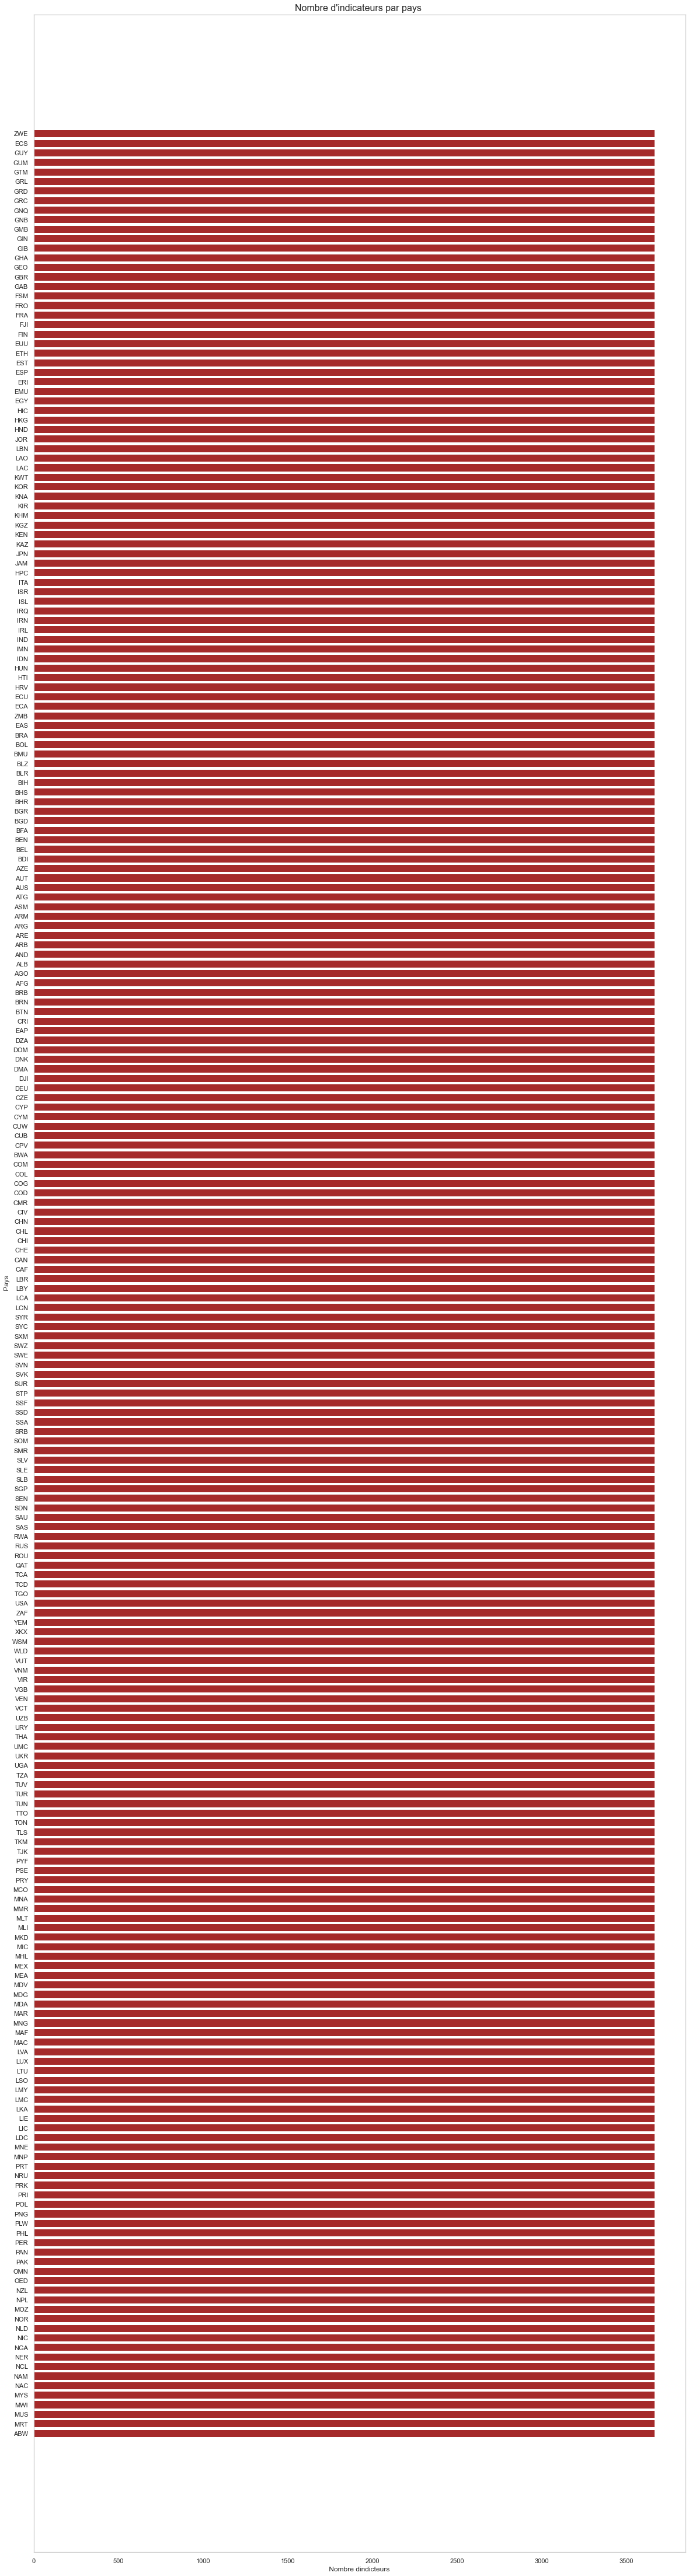

In [682]:
plt.figure(figsize=(20,80))
plt.barh(y = data2.groupby('Country Code')[['Indicator Name']].count().reset_index().sort_values(by='Indicator Name')['Country Code'], width = data2.groupby('Country Code')[['Indicator Name']].count()['Indicator Name'].sort_values() , color='brown')
plt.title('Nombre d''\'indicateurs par pays ', size = 16)
plt.xlabel(' Nombre d''indicteurs ')
plt.ylabel(' Pays')
plt.grid()
plt.show()



In [683]:
data2.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Region'],
      dtype='object')

##  Sélection des caractéristiques / colonnes / attributs 

Après la fusion des Dataframes  ,  on  a maintenant trois Dataframe  : 
-  Dataframe.Country-series
-  DataframeC_S_FN
-  data_D_C  ( les années assemblées ) 
-  data1_copy ( les datasets réels ) 


* A partir de ces trois , on trouve que  Dataframe nommée  DataframeC_S_FN , est la plus important et contient des colonnes important qui peuvent nous aider de répondre au problématique 
les deux autres Dataframe  contien des colonnes qui ne sont pas importnant à ce stade là 
Donc à partir de cette Dataframe , on va séléctionner les colonnes important 
- N.B : on peut fusionner tous les dataframe , mais ça sert à rien , vu les colonnes des autres Dataframe ne sont pas important .


In [684]:
 #Dataframe_series.dtypes
#Dataframe_series['Notes from original source'] 
print('\n Taux des valeurs manquantes = \n', Dataframe_series.isna().mean())  #  Taux des valeurs manquantes 
#print('\n  vérification du doublons identifiant unique = ',Dataframe_series.duplicated('Country Code').sum()) # doublons
print (' \n  le taux des valeurs manquantes pour chaque lignes est = \n ', Dataframe_series.isna().sum() / len(Dataframe_series)) # veleurs manquantes
#Dataframe_series.count  #    Taux remplissages  
Dataframe_series['Notes from original source']  == 0
Dataframe_series.shape


 Taux des valeurs manquantes = 
 Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Short definition                       0.411733
Long definition                        0.000000
Unit of measure                        1.000000
Periodicity                            0.972988
Base Period                            0.914325
Other notes                            0.849386
Aggregation method                     0.987176
Limitations and exceptions             0.996180
Notes from original source             1.000000
General comments                       0.996180
Source                                 0.000000
Statistical concept and methodology    0.993724
Development relevance                  0.999181
Related source links                   0.941337
Other web links                        1.000000
Related indicators                     1.000000
License Type                           1.000000
Unname

(3665, 21)

In [685]:
data2.head(6)


Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   
5   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   
5   Adjusted net enrolment rate, primary, female (%)  SE.PRM.TENR.FE   

        1970       1971       1972       1973       1974       1975  ...  \
0        NaN        NaN        NaN        NaN        NaN        NaN  ...   
1        NaN        NaN        NaN        NaN        NaN        NaN  ...   
2        NaN        NaN        NaN        NaN        NaN        NaN  ...   
3        NaN        NaN        NaN        NaN        NaN        NaN  ...   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.365540  ...   
5  43.351101  43.318150  44.640701  45.845718  46.449501  48.363892  ...   

   2060  2065  2070  2075  2080  2085  2090  2095  2100  Region  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN  
5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN  

[6 rows x 70 columns]

In [686]:
data1.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1980s', '2000s', '2010s', '2030s', '2050s', '2070s', '2090s',
       'Region'],
      dtype='object')

In [687]:
#Dataframe_data['Indicator Name']
Dataframe_data.shape
data1.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1980s', '2000s', '2010s', '2030s', '2050s', '2070s', '2090s',
       'Region'],
      dtype='object')

In [688]:
data1['Indicator Name']

0         Adjusted net enrolment rate, lower secondary, ...
1         Adjusted net enrolment rate, lower secondary, ...
2         Adjusted net enrolment rate, lower secondary, ...
3         Adjusted net enrolment rate, lower secondary, ...
4         Adjusted net enrolment rate, primary, both sex...
                                ...                        
886925    Youth illiterate population, 15-24 years, male...
886926    Youth literacy rate, population 15-24 years, b...
886927    Youth literacy rate, population 15-24 years, f...
886928    Youth literacy rate, population 15-24 years, g...
886929    Youth literacy rate, population 15-24 years, m...
Name: Indicator Name, Length: 886930, dtype: object

In [689]:
data_partie1 = data1[['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', '2010s', 'Region']]

In [690]:
data_partie1.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2010s', 'Region'],
      dtype='object')

In [691]:
print(' le nombre des indicateurs ( par nom )  non unique = ', data1['Indicator Name'].nunique())

 le nombre des indicateurs ( par nom )  non unique =  3665


In [692]:
data1['Country Name'].nunique()

242

## Fusion des Années 

- On a fusionné chaque 20 ans dans une seule années afin de minimiser l\'affichage et voir clairement les résultat  et en plus pour étudier toute une période de temps
- data['1980s'] = data[[str(year) for year in range(1970,1990,1)]].mean(1)
- data['2000s'] = data[[str(year) for year in range(1990,2010,1)]].mean(1)
- data['2010s'] = data[[str(year) for year in [2010,2011,2012,2013,2014,2015,2016,2017]]].mean(1)
- data['2030s'] = data[[str(year) for year in [2020,2025,2030,2035,2040]]].mean(1)
- data['2050s'] = data[[str(year) for year in [2040,2045,2050,2055,2060]]].mean(1)
- data['2070s'] = data[[str(year) for year in [2060,2065,2070,2075,2080]]].mean(1)
- data['2090s'] = data[[str(year) for year in [2080,2085,2090,2095,2100]]].mean(1)

In [693]:
# liste des Dataset originales 
##Dataframe_country
#Dataframe_series
#Dataframe_Country_Series
#Dataframe_FootNote
# liste des Dataset  généréess
# Dataframe_data_copy   c'est copie de Dataframe_data

#Dataframe.Country-series
# DataframeC_S_FN  ( fusion de country-series , footnote )
 # data_D_C ( les années assemblées )
 # data1_copy ( les datasets réels )
#data1
#data_D_C
#  data_copy   ( )  copie de data )  

##  Remarque 
- D\'après  les résultas obtenus , on constate que il y a 3665 indicateurs différents 
donc en premier lieux on va parcourir ces indicateurs et fouiller son distribution pour chaque pays et durant l'évolution des années .
- Sur le site offciiele des Dataset le nombre d'indicateurs est 3628 indicators , https://datacatalog.worldbank.org/search/dataset/0038480   !!!!!!!!!
- La deuxième chose , On va prendre un échantillon  , deux , ou trois des colonnes de l'ensembles de Dataframe appellé data_D_C
-  la deuxième Dataset est basée sur les colonnes important

In [694]:
#for x in data_D_C:
 # print(x) # imprime le nom de la colonne
#sampledata1 = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','Region','1970s']
#sampledata1 = data[sampledata1]

##  Distribution des indcateurs par apport l'évolution des années !!!

sachant que chaque 20 ans est representé par une année comme valeur moyene des années
- la deuxième chose 

In [695]:
data1.shape
data_partie1.shape

(886930, 6)

In [696]:
classement_indicateurs = data1[['Indicator Name', '1980s']].groupby('Indicator Name').count().sort_values(by='1980s',ascending=False)

In [743]:
classement_indicateurs.head(30)

1980s
Indicator Name                                           
Population, total                                     236
Population growth (annual %)                          236
Population, ages 0-14 (% of total)                    217
Population, male (% of total)                         217
Population, ages 15-64 (% of total)                   217
Population, female (% of total)                       217
Population, female                                    216
Population, ages 0-14, male                           216
Population, ages 0-14, total                          216
Population, ages 15-64, female                        216
Population, ages 15-64, male                          216
Population, ages 15-64, total                         216
Population, ages 0-14, female                         216
Population, male                                      216
Population of the official age for primary educ...    215
Population of the official age for tertiary edu...    215
Population of the official entrance age to prim...    215
Population of the official age for the last gra...    215
Population of the official age for the last gra...    215
Population of the official age for primary educ...    215
Population of the official age for tertiary edu...    215
Population of the official age for primary educ...    215
Population of the official age for pre-primary ...    215
Population of the official age for the last gra...    215
Population of the official age for tertiary edu...    215
Population of the official age for pre-primary ...    215
Population of the official age for pre-primary ...    215
Population of the official age for upper second...    214
Population of the official entrance age to prim...    214
Population of the official entrance age to prim...    214

In [744]:
#classement_indicateurs = pd.DataFrame(data1['Indicator Name'],data1[['Indicator Name', '1980s']].groupby('Indicator Name').count().sort_values(by='1980s',ascending=False))
#indicateurs_selectionne= classement_indicateurs.head(50)
#indicateurs_selectionne.shape

In [745]:
#data1[['Indicator Name','1980s']]

In [746]:
#df_mots_indicateurs_populaires = pd.DataFrame(classement_indicateurs, columns = ['Indicator Name', '1980s']).sort_values(by='Indicator Name', ascending=False)

In [749]:
indicateurs_selectionne= classement_indicateurs.head(20)

In [750]:
classement_indicateurs

1980s
Indicator Name                                           
Population, total                                     236
Population growth (annual %)                          236
Population, ages 0-14 (% of total)                    217
Population, male (% of total)                         217
Population, ages 15-64 (% of total)                   217
...                                                   ...
PASEC: Distribution of 2nd grade mathematics sc...      0
PASEC: Distribution of 2nd grade mathematics sc...      0
PASEC: Distribution of 2nd grade mathematics sc...      0
PASEC: Distribution of 2nd grade mathematics sc...      0
PASEC: Mean performance on the mathematics scal...      0

[3665 rows x 1 columns]

In [751]:
data1

Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth literacy rate, population 15-24 years, f...   
886928  Youth literacy rate, population 15-24 years, g...   
886929  Youth literacy rate, population 15-24 years, m...   

              Indicator Code         1980s         2000s          2010s  \
0                 UIS.NERA.2           NaN           NaN            NaN   
1               UIS.NERA.2.F           NaN           NaN            NaN   
2             UIS.NERA.2.GPI           NaN           NaN            NaN   
3               UIS.NERA.2.M           NaN           NaN            NaN   
4                SE.PRM.TENR     63.903660     77.221036      85.478180   
...                      ...           ...           ...            ...   
886925      UIS.LP.AG15T24.M  47631.000000  38800.000000  183071.500000   
886926     SE.ADT.1524.LT.ZS     89.021851     95.411362      90.679410   
886927  SE.ADT.1524.LT.FE.ZS     84.812241     94.353439      92.656455   
886928  SE.ADT.1524.LT.FM.ZS      0.903920      0.977340       1.046085   
886929  SE.ADT.1524.LT.MA.ZS     93.826958     96.540619      88.591220   

        2030s  2050s  2070s  2090s              Region  
0         NaN    NaN    NaN    NaN                 NaN  
1         NaN    NaN    NaN    NaN                 NaN  
2         NaN    NaN    NaN    NaN                 NaN  
3         NaN    NaN    NaN    NaN                 NaN  
4         NaN    NaN    NaN    NaN                 NaN  
...       ...    ...    ...    ...                 ...  
886925    NaN    NaN    NaN    NaN  Sub-Saharan Africa  
886926    NaN    NaN    NaN    NaN  Sub-Saharan Africa  
886927    NaN    NaN    NaN    NaN  Sub-Saharan Africa  
886928    NaN    NaN    NaN    NaN  Sub-Saharan Africa  
886929    NaN    NaN    NaN    NaN  Sub-Saharan Africa  

[886930 rows x 12 columns]

In [752]:
classement_indicateurs

1980s
Indicator Name                                           
Population, total                                     236
Population growth (annual %)                          236
Population, ages 0-14 (% of total)                    217
Population, male (% of total)                         217
Population, ages 15-64 (% of total)                   217
...                                                   ...
PASEC: Distribution of 2nd grade mathematics sc...      0
PASEC: Distribution of 2nd grade mathematics sc...      0
PASEC: Distribution of 2nd grade mathematics sc...      0
PASEC: Distribution of 2nd grade mathematics sc...      0
PASEC: Mean performance on the mathematics scal...      0

[3665 rows x 1 columns]

In [753]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(y = 'Indicator Name', x='1980s', data1 = classement_indicateurs)
plt.title('6 mots avec le plus d\'occurences dans les indicateurs de notre jeu de données', size=20)
#sns.barplot(x=[elem1 for elem1, elem2 in mots_indicateurs_populaires], y=[elem2 for elem1, elem2 in mots_indicateurs_populaires], hue = 'mots')
plt.show()

ValueError: Could not interpret input '1980s'

<Figure size 1152x576 with 0 Axes>

[]

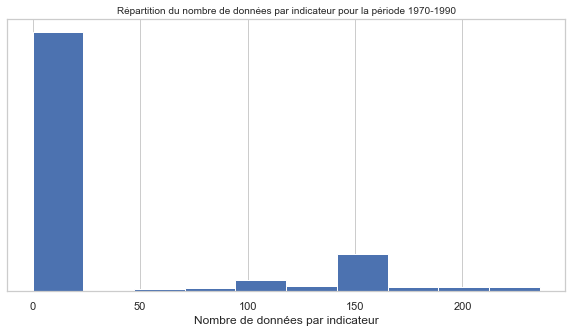

In [754]:
plt.figure(figsize=(10,5))
plt.title('Répartition du nombre de données par indicateur pour la période 1970-1990', size=10)
plt.xlabel('Nombre de données par indicateur')
ax = plt.gca()
ax.set_yticks([])
plt.hist(data1[['Indicator Name', '1980s']].groupby('Indicator Name').count().sort_values(by='1980s',ascending=False))
plt.plot()

In [755]:
data1[['Indicator Name', '2000s']].groupby('Indicator Name').count().sort_values(by='2000s',ascending=False)

2000s
Indicator Name                                           
Population growth (annual %)                          240
Population, total                                     240
GDP per capita (current US$)                          233
GDP at market prices (current US$)                    233
Internet users (per 100 people)                       233
...                                                   ...
SABER: (Engaging the Private Sector, Government...      0
SABER: (Engaging the Private Sector, Government...      0
SABER: (Engaging the Private Sector, Government...      0
SABER: (Engaging the Private Sector, Government...      0
PASEC: Mean performance on the mathematics scal...      0

[3665 rows x 1 columns]

[]

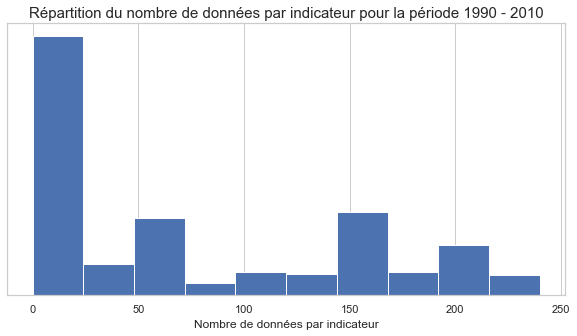

In [756]:
plt.figure(figsize=(10,5))
plt.title('Répartition du nombre de données par indicateur pour la période 1990 - 2010', size=15)
plt.xlabel('Nombre de données par indicateur')
ax = plt.gca()
ax.set_yticks([])
plt.hist(data1[['Indicator Name', '2000s']].groupby('Indicator Name').count().sort_values(by='2000s',ascending=False))
plt.plot()

In [757]:
data1[['Indicator Name', '2010s']].groupby('Indicator Name').count().sort_values(by='2010s',ascending=False)

2010s
Indicator Name                                           
Population, total                                     240
Population growth (annual %)                          240
GDP per capita (current US$)                          229
GDP at market prices (current US$)                    229
Internet users (per 100 people)                       229
...                                                   ...
EGRA: Listening Comprehension - Share of studen...      0
EGRA: Correct Letter Sounds Read Per Minute (Me...      0
SACMEQ: Mean performance on the reading scale, ...      0
SACMEQ: Mean performance on the reading scale, ...      0
EGRA: Correct Letter Names Read Per Minute (Mea...      0

[3665 rows x 1 columns]

In [758]:
data_indic = data1[['Indicator Name', '2010s']].groupby('Indicator Name').count().sort_values(by='2010s',ascending=False)

In [759]:
data_indic.head(60)

2010s
Indicator Name                                           
Population, total                                     240
Population growth (annual %)                          240
GDP per capita (current US$)                          229
GDP at market prices (current US$)                    229
Internet users (per 100 people)                       229
GDP per capita (constant 2005 US$)                    227
GDP at market prices (constant 2005 US$)              227
Enrolment in primary education, both sexes (num...    224
Enrolment in primary education, female (number)       224
Percentage of students in primary education who...    224
Enrolment in secondary general, female (number)       223
Enrolment in secondary general, both sexes (num...    223
Percentage of students in secondary general edu...    223
Population of the official age for lower second...    222
Total outbound internationally mobile tertiary ...    222
Population of the official age for upper second...    222
Population of the official age for pre-primary ...    222
Population of the official age for secondary ed...    222
Population of the official age for lower second...    221
Population of the official age for pre-primary ...    221
Population of the official age for upper second...    221
Population of the official age for lower second...    221
Population of the official age for secondary ed...    221
Population of the official age for pre-primary ...    221
Population of the official age for upper second...    221
Population of the official age for secondary ed...    221
Population of the official age for tertiary edu...    220
Enrolment in lower secondary general, female (n...    220
Enrolment in lower secondary general, both sexe...    220
Population of the official age for tertiary edu...    219
Population, ages 0-14 (% of total)                    219
GNI (current US$)                                     219
Population, ages 0-14, total                          219
Population, ages 0-14, male                           219
Population, ages 0-14, female                         219
Population of the official age for primary educ...    219
Population, ages 15-64 (% of total)                   219
Population, ages 15-64, female                        219
Population, ages 15-64, male                          219
Population, ages 15-64, total                         219
Population, female                                    219
Population, female (% of total)                       219
Population, male                                      219
Population of the official entrance age to seco...    219
Population, male (% of total)                         219
Population of the official age for tertiary edu...    219
Enrolment in upper secondary general, female (n...    218
Population of the official age for the last gra...    218
Population of the official entrance age to seco...    218
Percentage of students in upper secondary gener...    218
Population of the official entrance age to seco...    218
Population of the official age for primary educ...    218
Population of the official age for primary educ...    218
Enrolment in upper secondary general, both sexe...    218
Population of the official age for the last gra...    217
Population of the official entrance age to prim...    217
GDP per capita, PPP (constant 2011 internationa...    217
GDP per capita, PPP (current international $)         217
GDP, PPP (constant 2011 international $)              217
Population of the official age for the last gra...    217

[]

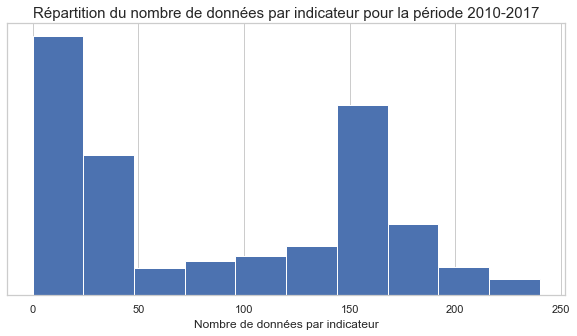

In [760]:
plt.figure(figsize=(10,5))
plt.title('Répartition du nombre de données par indicateur pour la période 2010-2017', size=15)
plt.xlabel('Nombre de données par indicateur')
ax = plt.gca()
ax.set_yticks([])
plt.hist(data1[['Indicator Name', '2010s']].groupby('Indicator Name').count().sort_values(by='2010s',ascending=False))
plt.plot()

In [761]:
data1[['Indicator Name', '2030s']].groupby('Indicator Name').count().sort_values(by='2030s',ascending=False)

2030s
Indicator Name                                           
Wittgenstein Projection: Percentage of the popu...    167
Wittgenstein Projection: Percentage of the popu...    167
Wittgenstein Projection: Percentage of the popu...    167
Wittgenstein Projection: Percentage of the popu...    167
Wittgenstein Projection: Percentage of the popu...    167
...                                                   ...
Expenditure on education not allocated by level...      0
Expenditure on lower secondary as % of governme...      0
Expenditure on lower secondary as % of total go...      0
Expenditure on post-secondary non-tertiary as %...      0
Youth literacy rate, population 15-24 years, ma...      0

[3665 rows x 1 columns]

[]

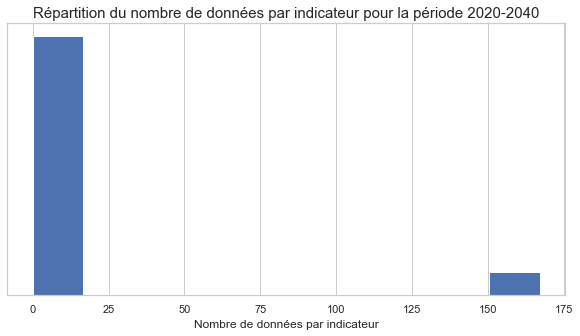

In [762]:
plt.figure(figsize=(10,5))
plt.title('Répartition du nombre de données par indicateur pour la période 2020-2040', size=15)
plt.xlabel('Nombre de données par indicateur')
ax = plt.gca()
ax.set_yticks([])
plt.hist(data1[['Indicator Name', '2030s']].groupby('Indicator Name').count().sort_values(by='2030s',ascending=False))
plt.plot()

In [763]:
data1[['Indicator Name', '2050s']].groupby('Indicator Name').count().sort_values(by='2050s',ascending=False)

2050s
Indicator Name                                           
Wittgenstein Projection: Percentage of the popu...    167
Wittgenstein Projection: Percentage of the popu...    167
Wittgenstein Projection: Percentage of the popu...    167
Wittgenstein Projection: Percentage of the popu...    167
Wittgenstein Projection: Percentage of the popu...    167
...                                                   ...
Expenditure on education not allocated by level...      0
Expenditure on lower secondary as % of governme...      0
Expenditure on lower secondary as % of total go...      0
Expenditure on post-secondary non-tertiary as %...      0
Youth literacy rate, population 15-24 years, ma...      0

[3665 rows x 1 columns]

[]

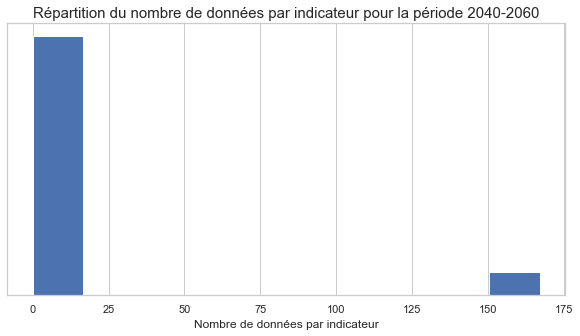

In [764]:
plt.figure(figsize=(10,5))
plt.title('Répartition du nombre de données par indicateur pour la période 2040-2060', size=15)
plt.xlabel('Nombre de données par indicateur')
ax = plt.gca()
ax.set_yticks([])
plt.hist(data1[['Indicator Name', '2050s']].groupby('Indicator Name').count().sort_values(by='2050s',ascending=False))
plt.plot()

In [765]:
data1[['Indicator Name', '2070s']].groupby('Indicator Name').count().sort_values(by='2070s',ascending=False)

2070s
Indicator Name                                           
Wittgenstein Projection: Percentage of the popu...    167
Wittgenstein Projection: Percentage of the popu...    167
Wittgenstein Projection: Percentage of the popu...    167
Wittgenstein Projection: Percentage of the popu...    167
Wittgenstein Projection: Percentage of the popu...    167
...                                                   ...
Expenditure on education not allocated by level...      0
Expenditure on lower secondary as % of governme...      0
Expenditure on lower secondary as % of total go...      0
Expenditure on post-secondary non-tertiary as %...      0
Youth literacy rate, population 15-24 years, ma...      0

[3665 rows x 1 columns]

[]

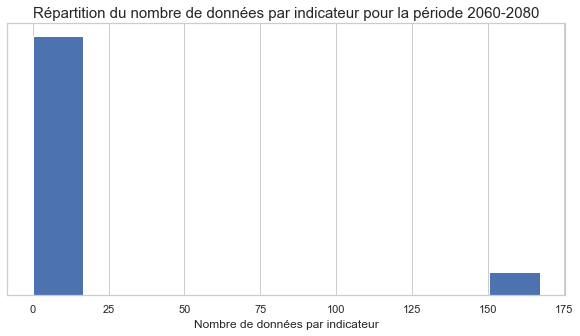

In [766]:
plt.figure(figsize=(10,5))
plt.title('Répartition du nombre de données par indicateur pour la période 2060-2080', size=15)
plt.xlabel('Nombre de données par indicateur')
ax = plt.gca()
ax.set_yticks([])
plt.hist(data1[['Indicator Name', '2070s']].groupby('Indicator Name').count().sort_values(by='2070s',ascending=False))
plt.plot()

In [767]:
data1[['Indicator Name', '2090s']].groupby('Indicator Name').count().sort_values(by='2090s',ascending=False)

2090s
Indicator Name                                           
Wittgenstein Projection: Percentage of the popu...    167
Wittgenstein Projection: Percentage of the popu...    167
Wittgenstein Projection: Percentage of the popu...    167
Wittgenstein Projection: Percentage of the popu...    167
Wittgenstein Projection: Percentage of the popu...    167
...                                                   ...
Expenditure on education not allocated by level...      0
Expenditure on lower secondary as % of governme...      0
Expenditure on lower secondary as % of total go...      0
Expenditure on post-secondary non-tertiary as %...      0
Youth literacy rate, population 15-24 years, ma...      0

[3665 rows x 1 columns]

[]

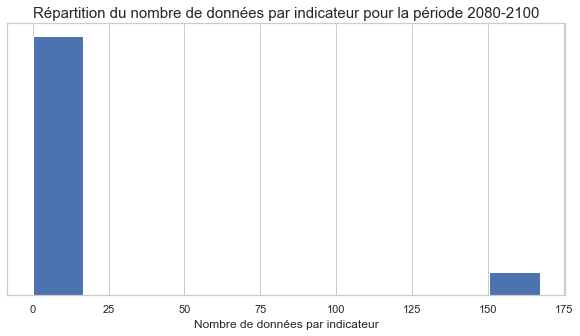

In [768]:
plt.figure(figsize=(10,5))
plt.title('Répartition du nombre de données par indicateur pour la période 2080-2100', size=15)
plt.xlabel('Nombre de données par indicateur')
ax = plt.gca()
ax.set_yticks([])
plt.hist(data1[['Indicator Name', '2090s']].groupby('Indicator Name').count().sort_values(by='2090s',ascending=False))
plt.plot()

##  Evaluation  :

d'après les graphiques obtenus  on trouve que la période  entre : 1990 -->    2010   , et entre 2010 -- 2017
sont important pour notre étude  , 
par ailleurs , On trouve  que les deux schéma possède de Pics en outre , on constate : 
- un nombre important des indicateurs qui moin de données 
- un nombre important aussi avec plus de données 

- Remarque entre  les années  :  1970 ----->   1990  , je pense que plusieurs indicateurs sont absents , comme internet , n'était pas vraiment existe dans la quasi totalité des pays , 
On pourrait penser qu'on a 2 distributions qui se somment : 



















In [769]:
#Dataframe_country
#Dataframe_series
#Dataframe_Country_Series
#Dataframe_FootNote
# liste des Dataset  généréess
# Dataframe_data_copy   c'est copie de Dataframe_data

#Dataframe.Country-series
# DataframeC_S_FN  ( fusion de country-series , footnote )
 # data_D_C ( les années assemblées )
 # data1_copy ( les datasets réels )
#data1
#data_D_C
#  data_copy   ( )  copie de data ) 

## ------------------------------------------------------------------------------
##   # Sélection des Indicateurs importants   
## ------------------------------------------------------------------------------

##  Nouvelle colonne
-A jouter une colonne des groupes d'indicateurs des colonnes(premières lettres des indicateurs)

In [770]:
#data['List_Indicator '] = data.loc[:,'Indicator Code'].apply(lambda x: x.split('.')[0])
#data.columns
#data.drop(['List_Indicator'],axis=0)
#data = data.drop(columns=['List_Indicator '])

In [771]:
data1.shape
data_partie1
data_partie2 = data_partie1

In [772]:
# Nombres des NaN par  indicateurs 

data_partie1['NaN'] = data_partie1[['Indicator Code', 'Country Name', '2010s']]['2010s'].isna().astype(int)
data_partie2['NaN'] = data_partie1[['Indicator Code', '2010s']]['2010s'].isna().astype(int)

<ipython-input-772-958a6af7cbfa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_partie1['NaN'] = data_partie1[['Indicator Code', 'Country Name', '2010s']]['2010s'].isna().astype(int)
<ipython-input-772-958a6af7cbfa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_partie2['NaN'] = data_partie1[['Indicator Code', '2010s']]['2010s'].isna().astype(int)


In [773]:
# ____   
data_selected = data_partie1[['Country Name', 'Indicator Code', 'NaN']].pivot(index='Country Name', columns='Indicator Code', values='NaN')

In [774]:
#data_selected2 = data_partie2[['Indicator Code', 'NaN']].pivot(columns=['Indicator Code'], values='NaN')

In [775]:
regions = df_select_3[["Country Name", "Region"]].drop_duplicates().set_index("Country Name")
df_score["Region"] = regions
df_score_per_region = df_score.groupby("Region").mean()

fig = plt.figure(1, figsize=(7, 7))
sns.heatmap(df_score_per_region, square=True, linewidths=0.1)
plt.show()

NameError: name 'df_select_3' is not defined

In [ ]:
plt.figure(figsize=(50,50))
plt.title('Nombre de NaN par indicateur et par pays')
ax = sns.heatmap(data = data_selected)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

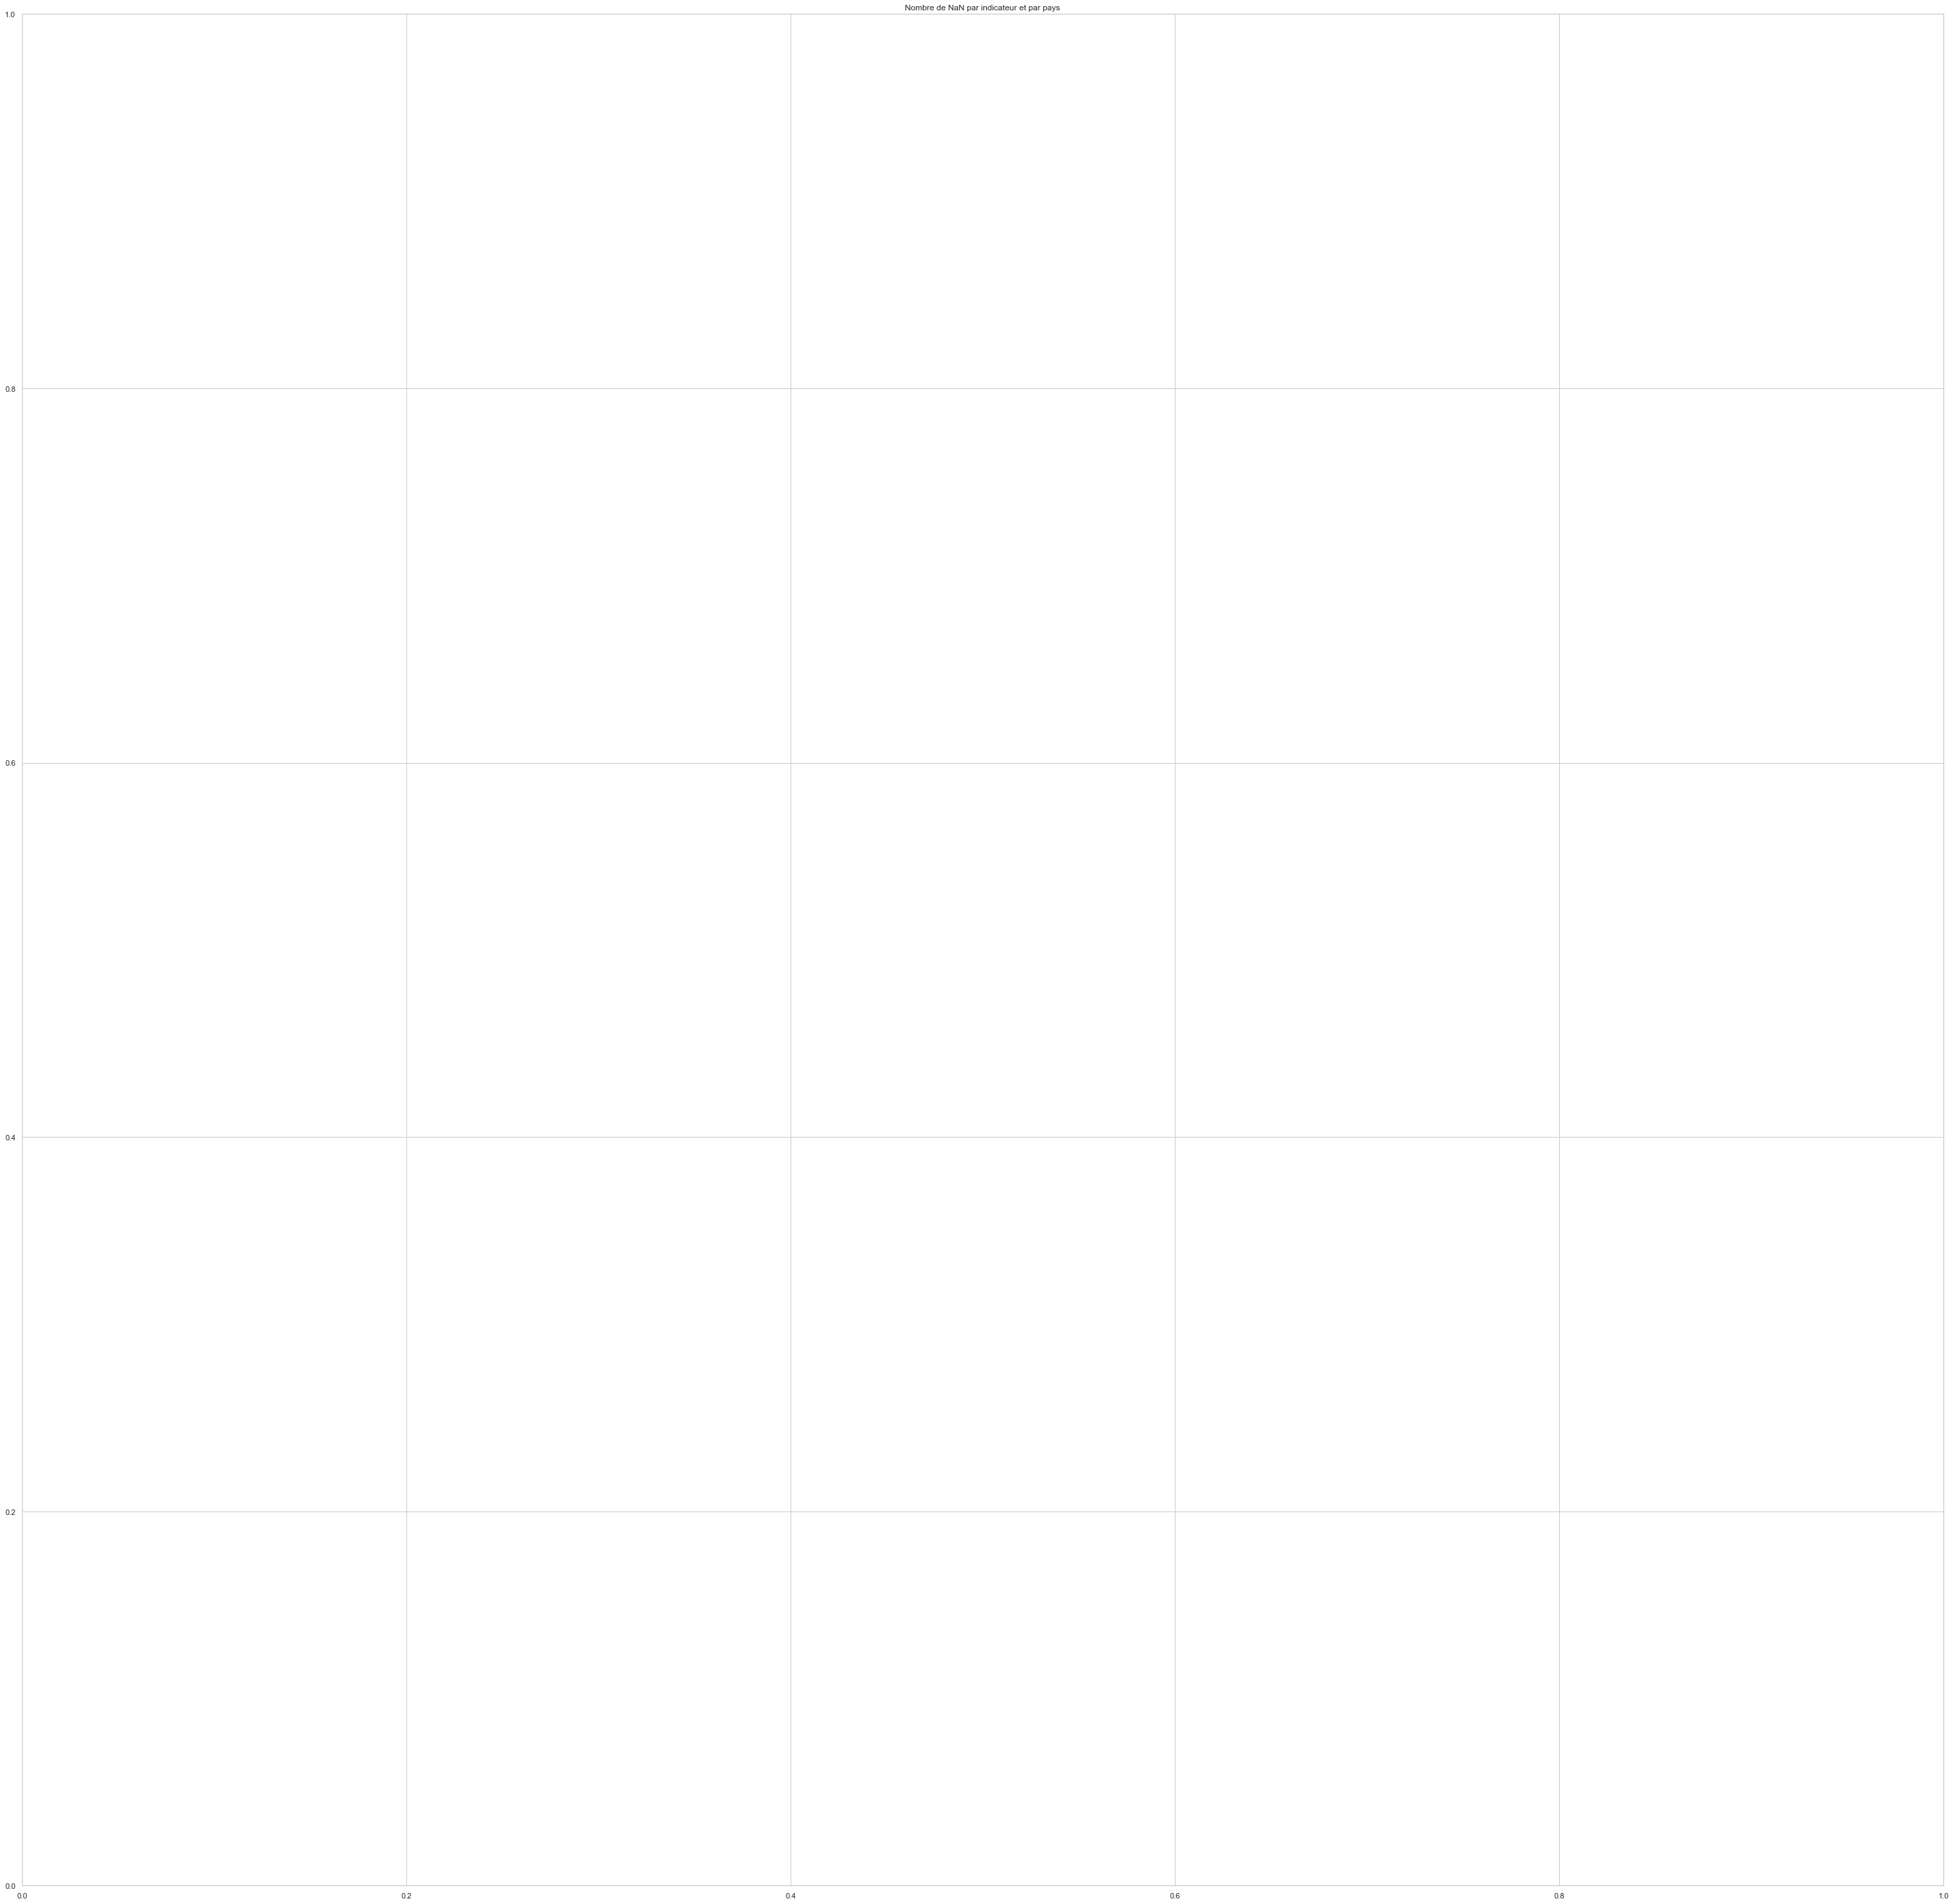

In [776]:
plt.figure(figsize=(50,50))
plt.title('Nombre de NaN par indicateur et par pays')
ax = sns.barplot(data = data_selected)
plt.tight_layout()
plt.plot()

## -------------------------------------------------
Il y a trop d'indicateurs pour les affichés tous être affichés mais : 
On voit que certaines catégories d'indicateurs ont tendance à avoir moins de NaN que d'autres. en particulier:
* ceux de préfixe HH
* ceux de préfixe LO
* ceux de préfixe SABER
* ceux de préfixe UIS.AFR
* ceux de préfixe UIS.NAR

maintenant , les indicateurs suivants semblent avoir beaucoup de NaN :
* ceux de préfixe BAR
* ceux de préfixe PRJ
* ceux de préfixe SE
* ceux de préfixe SP
* ceux de préfixe UIS sauf UIS.AFR et UIS.NAR

Concernant les pays, on observe quelques tendances mais le choix de l'indicateur semble avoir plus de répercusions sur le nombre de NaN que le choix du pays.

In [ ]:
# Heatmap des données présentes par  d'indicateurs
#fig = plt.figure(figsize=(30,40))

#sns.heatmap(data, square=True, linewidths=0.1)
#plt.title("Proportion de données renseignées par année et par groupe d'indicateurs")
#plt.ylabel('Groupes d\'indicateurs', fontsize=13)
#plt.show()

## ------------------------------------------

In [777]:
regions = Dataframe_country['Region'].unique().tolist()

In [778]:
groupes_pays = ['Arab World',
         'East Asia & Pacific',
         'East Asia & Pacific (excluding high income)',
         'Euro area',
         'Europe & Central Asia',
         'Europe & Central Asia (excluding high income)',
         'European Union',
         'Heavily indebted poor countries (HIPC)',
         'High income',
         'Latin America & Caribbean',
         'Latin America & Caribbean (excluding high income)',
         'Least developed countries: UN classification',
         'Low & middle income',
         'Low income',
         'Lower middle income',
         'Middle East & North Africa',
         'Middle East & North Africa (excluding high income)',
         'Middle income',
         'North America',
         'OECD members',
         'South Asia',
         'Sub-Saharan Africa',
         'Sub-Saharan Africa (excluding high income)',
         'Upper middle income',
         'World']

In [779]:
data_partie1
data_selected_countries =  data_partie1[~data_partie1['Country Name'].isin(groupes_pays)][['Country Name', 'Indicator Code', 'NaN']].pivot(index='Country Name', columns='Indicator Code', values='NaN')
data_selected_groupes = data_partie1[data_partie1['Country Name'].isin(groupes_pays)][['Country Name', 'Indicator Code', 'NaN']].pivot(index='Country Name', columns='Indicator Code', values='NaN')

In [780]:
#  supprimer les indicateurs composés uniquement de NaN , voila
data_selected_groupes.drop(data_selected_groupes.loc[:, data_selected_groupes.sum()==0].columns.tolist(), axis=1, inplace=True)

KeyboardInterrupt: 

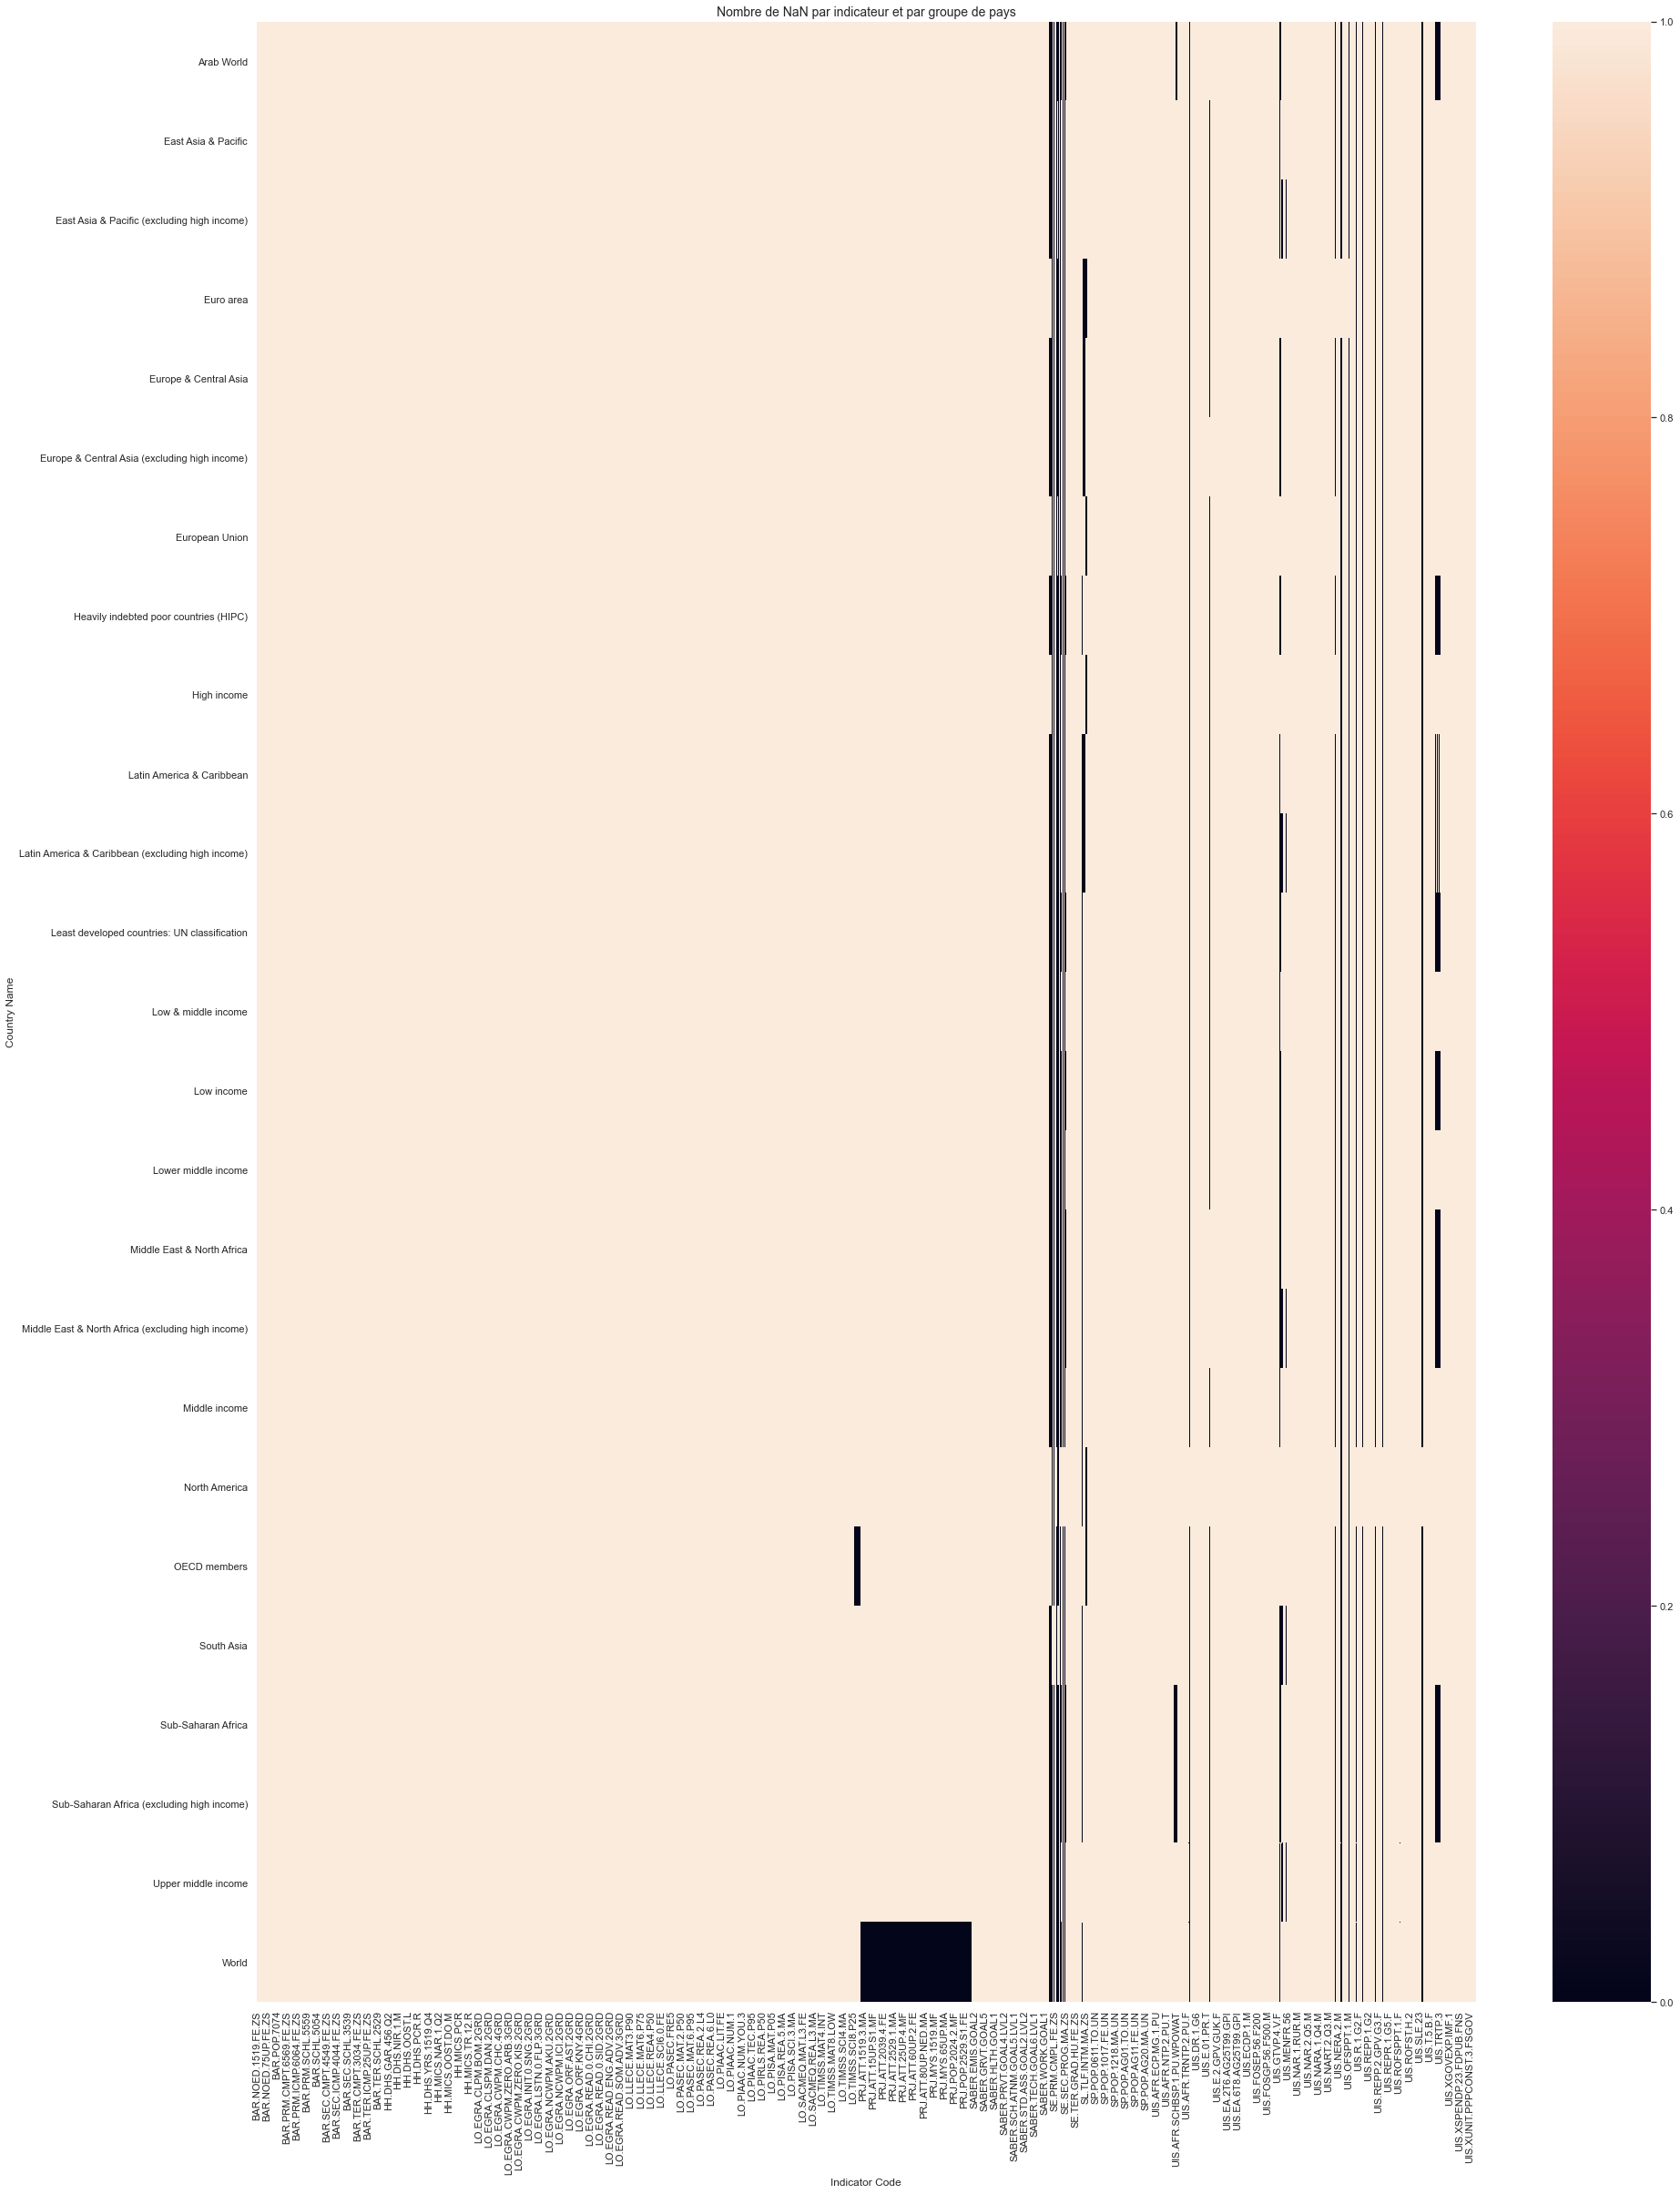

In [781]:
# Tracer la novelle Map 
plt.figure(figsize=(30,40))
plt.title('Nombre de NaN par indicateur et par groupe de pays', size=14)
ax = sns.heatmap(data = data_selected_groupes)
plt.tight_layout()
plt.plot()

## -----------------------------------------------------------------------------------------
Après la vérification des NaN 
 on trouve que pour plusieurs indicateurs, il n'y a pas NaN pour les groupes de pays! ça pour les suivants :

   -  Avec préfixe BAR
   -  AVEC préfixe HH
   -  Avec  préfixe LO
   -  Avec préfixe SP.POP
   -  Avec  préfixe PRU (hors zone World)

maintenant , quels indicateurs on va choisir  ???????????

On va conserver les indicateurs qui ont plus de 90 % de données signifiantes pour les régions et pour les pays. En faisant le tri séparément


## -----------------------------------------------------------------------------------------

In [ ]:
data_selected_groupes.drop(data_selected_groupes.loc[:, data_selected_groupes.sum()<= data_selected_groupes.shape[0] * 90/100].columns.tolist(), axis=1, inplace=True)

In [ ]:
indicateur_groupes = data_selected_groupes.columns.tolist()

In [ ]:
data_selected_countries.drop(data_selected_countries.loc[:, data_selected_countries.sum()<= data_selected_countries.shape[0] * 90/100].columns.tolist(), axis=1, inplace=True)

In [ ]:
indicateur_countries = data_selected_groupes.columns.tolist()

In [782]:
data1.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1980s', '2000s', '2010s', '2030s', '2050s', '2070s', '2090s',
       'Region'],
      dtype='object')

In [783]:
##############  
## La fusion des deux groupes 
indicateurs_a_conserver = list(dict.fromkeys(indicateur_groupes + indicateur_countries))
print('Nombre d\'indicateurs pertinent : ', len(indicateurs_a_conserver))
print('Proportion conservée du dataset : ', round(len(indicateurs_a_conserver) / data1['Indicator Code'].nunique(),2) *100 ,'%')

Nombre d'indicateurs pertinent :  3274
Proportion conservée du dataset :  89.0 %


In [784]:
# créer une autre dataset contient seulement , que la colones des indicateurs On filtre maintenant data en ne conservant que les indicateurs ci-dessus

data2 = data1[data1['Indicator Code'].isin(indicateurs_a_conserver)]

In [785]:
data2.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1980s', '2000s', '2010s', '2030s', '2050s', '2070s', '2090s',
       'Region'],
      dtype='object')

In [786]:
data2['Indicator Name'].unique().tolist()

['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Africa Dataset: Average number of grades per multigrade class in primary schools (number of grades)',
 'Africa Dataset: Average number of pupils per mathematics textbook in Grade 1 of primary education (number)',
 'Africa Dataset: Average number of pupils per mathematics textbook in Grade 2 of primary education (number)',
 'Africa Dataset: Average number of pupils per mathematics textbook in Grade 3 of primary education (number)',
 'Africa Dataset: Average number of pupil

In [787]:
data2.shape

(792308, 12)

## --------------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------------


Maintenant on va identifier les pays avec un potentiel de lycéens et universitaire important.

liste des indicateurs du site : http://datatopics.worldbank.org/education/indicators

ce qui est retirés :

- des indicateurs pour quantifier l'utilisation d'internet dans les pays et zones
- des indicateurs pour quantifier le nombre d'étudiants et lycéens (quitte à faire des calculs à partir de ces indicateurs)
- des indicateurs pour quantifier les dépenses par étudiant pour voir dans quels pays les personnes seraient en capacité de payer pour des services supplémentaires

indicateurs identifiés :

Ratios liés à l'éducation

- UIS.E.4 Enrolment in post-secondary non-tertiary education, both sexes (number)
- UIS.E.3 Enrolment in upper secondary education, both sexes (number)
- SE.TER.ENRL Enrolment in tertiary education, all programmes, both sexes (number)

Dépenses liées à l'éducation

- UIS.X.USCONST.3.FSGOV

Données démographiques:

- SP.POP.TOTL Population, total
- SP.POP.1524.TO.UN Population, ages 15-24, total

Percée de l'utilisation d'internet et des ordinateurs:

- IT.NET.USER.P2 Internet users (per 100 people)
- IT.CMP.PCMP.P2 Personal computers (per 100 people)


    
## --------------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------------


In [788]:
#Liste de code des  indicateurs 

indicateurs = ['UIS.E.4','UIS.E.3','SE.TER.ENRL','UIS.X.USCONST.3.FSGOV','SP.POP.TOTL',
              'SP.POP.1524.TO.UN','IT.NET.USER.P2','IT.CMP.PCMP.P2']

In [789]:
#  data2[['Indicator Code', '2000s']].groupby('Indicator Code').count().sort_values(by='2000s',ascending=False)

In [790]:
data2.shape

(792308, 12)

In [791]:
data1.shape

(886930, 12)

In [792]:
data1[data1['Indicator Code'].isin(indicateurs)][['Indicator Name', 'Indicator Code', '2000s']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='2000s',ascending=False)

Indicator Name     Indicator Code  2000s
6                                  Population, total        SP.POP.TOTL    240
3                    Internet users (per 100 people)     IT.NET.USER.P2    233
1  Enrolment in tertiary education, all programme...        SE.TER.ENRL    221
2  Enrolment in upper secondary education, both s...            UIS.E.3    218
4                Personal computers (per 100 people)     IT.CMP.PCMP.P2    218
5                      Population, ages 15-24, total  SP.POP.1524.TO.UN    192
0  Enrolment in post-secondary non-tertiary educa...            UIS.E.4    155

In [793]:
#indicateurs.pop()
  #  SP.POP.TOTL
 #  IT.NET.USER.P2
  # SE.TER.ENRL
 #  UIS.E.3
# IT.CMP.PCMP.P2
# SP.POP.1524.TO.UN
#  UIS.E.4


In [794]:
#data1[data1['Indicator Code'].isin(indicateurs)][['Indicator Name', 'Indicator Code', '1980s']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='1980s',ascending=False)

In [795]:
#indicateurs.pop()

In [796]:
data1.shape

(886930, 12)

In [797]:
data_selected.shape

(242, 3665)

In [798]:
#data1[data1['Indicator Code'].isin(indicateurs)][['Indicator Name', 'Indicator Code', '2010s']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='2010s',ascending=False)

In [799]:
indicateurs.pop()

'IT.CMP.PCMP.P2'

In [800]:
region = ['Arab World',  'East Asia & Pacific',  'East Asia & Pacific (excluding high income)',
         'East Asia & Pacific (developing only)',   'East Asia & Pacific (all income levels)',
        'Euro area',         'European Union'  'Europe & Centraµl Asia',
         'Europe & Central Asia (excluding high income)',         'Europe & Central Asia (developing only)',
         'Europe & Central Asia (all income levels)',  'European Union', 'Heavily indebted poor countries (HIPC)',  'High income',
         'Latin America & Caribbean', 'Latin America & Caribbean (developing only)',
         'Latin America & Caribbean (excluding high income)',  'Least developed countries: UN classification',
         'Low & middle income',  'Low income', 'Lower middle income',  'Middle East & North Africa',  'Middle East & North Africa (excluding high income)',
         'Middle East & North Africa (all income levels)','Middle East & North Africa (developing only)',
         'Middle income',   'North America',  'OECD members','South Asia', 'Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)',
         'Upper middle income', 'World',
        ]

In [801]:
list_pays = Dataframe_country[~Dataframe_country['Short Name'].isin(regions)]['Short Name'].unique().tolist()
print(list_pays)

['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'East Asia & Pacific (developing only)', 'East Asia & Pacific (all income levels)', 'Europe & Central Asia (developing only)', 'Europe & Central Asia (all income levels)', 'Ecuador', 'Egypt', 'Euro area', 'Eritrea', 'Spain', 'Estonia', 'E

# # --------------------------------------------------------------------------------------------------------
# # --------------------------------------------------------------------------------------------------------
# # --------------------------------------------------------------------------------------------------------

 Finaliser le classement des ordres des indicateurs statistiques classiques selon les différentes régions et aussi selon chaque pays   ( selon les questions demandées ) 

- moyenne/médiane/écart-type par pays et par continent ou bloc géographique

# # --------------------------------------------------------------------------------------------------------
# # --------------------------------------------------------------------------------------------------------
# # --------------------------------------------------------------------------------------------------------
# # --------------------------------------------------------------------------------------------------------

In [802]:
data_partie1.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2010s', 'Region', 'NaN'],
      dtype='object')

In [803]:
data_pays = data_partie1[data_partie1['Country Name'].isin(list_pays)][data_partie1['Indicator Code'].isin(indicateurs)].drop(['NaN'], axis=1)
data_region  = data_partie1[data_partie1['Country Name'].isin(region)][data_partie1['Indicator Code'].isin(indicateurs)].drop(['NaN'], axis=1)

<ipython-input-803-1fa976f0842d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pays = data_partie1[data_partie1['Country Name'].isin(list_pays)][data_partie1['Indicator Code'].isin(indicateurs)].drop(['NaN'], axis=1)
<ipython-input-803-1fa976f0842d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_region  = data_partie1[data_partie1['Country Name'].isin(region)][data_partie1['Indicator Code'].isin(indicateurs)].drop(['NaN'], axis=1)


### -----------------------Finalement ---------------------------
Répondre aux question des : 
Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones 
géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)


### -----------------------------------------------------------------------

In [804]:
def description_indicateurs(df, indicateurs, groupe):
    df_per_indicator = pd.DataFrame()
    for indicateur in indicateurs:
        df_temp = df[df['Indicator Code'] == indicateur]
        df_temp[indicateur] = df['2010s']
        df_temp.drop(['2010s', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
   
        if df_per_indicator.empty is False:
            df_per_indicator = df_per_indicator.merge(right = df_temp, how = 'outer', on = ['Country Code', 'Country Name', 'Region']).sort_values(by='Country Name')
        else:
            df_per_indicator = df_temp
            
            
    description = df_per_indicator.groupby([groupe])[indicateurs].describe(percentiles = [0.5])
    for indicateur in indicateurs:
        description[(indicateur, 'sum')] = description[(indicateur, 'count')] * description[(indicateur, 'mean')]
    colonnes = []
    for indicateur in indicateurs:
        for stat in ['mean', 'std', '50%', 'sum','min','max'] :
            colonnes += [(indicateur, stat)]
    description = description[colonnes]
    description.reset_index(inplace=True)
    return description, df_per_indicator

In [805]:
data_pays.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2010s', 'Region'],
      dtype='object')

In [806]:
#  zones  =  pays 
#  countrie = region  

In [807]:
description_region, df_region = description_indicateurs(data_pays, indicateurs, 'Region')
description_pays, df_pays = description_indicateurs(data_region, indicateurs, 'Country Name')

<ipython-input-804-8af7cbc04edc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[indicateur] = df['2010s']
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [808]:
description_region.shape


(7, 43)

In [809]:
description_region.columns

MultiIndex([(               'Region',     ''),
            (              'UIS.E.4', 'mean'),
            (              'UIS.E.4',  'std'),
            (              'UIS.E.4',  '50%'),
            (              'UIS.E.4',  'sum'),
            (              'UIS.E.4',  'min'),
            (              'UIS.E.4',  'max'),
            (              'UIS.E.3', 'mean'),
            (              'UIS.E.3',  'std'),
            (              'UIS.E.3',  '50%'),
            (              'UIS.E.3',  'sum'),
            (              'UIS.E.3',  'min'),
            (              'UIS.E.3',  'max'),
            (          'SE.TER.ENRL', 'mean'),
            (          'SE.TER.ENRL',  'std'),
            (          'SE.TER.ENRL',  '50%'),
            (          'SE.TER.ENRL',  'sum'),
            (          'SE.TER.ENRL',  'min'),
            (          'SE.TER.ENRL',  'max'),
            ('UIS.X.USCONST.3.FSGOV', 'mean'),
            ('UIS.X.USCONST.3.FSGOV',  'std'),
            (

In [810]:
#description_countries, df_countries = description_indicateurs(data_countries, indicateurs, 'Region')

In [811]:
liste_des_indicateurs = data1[data1['Indicator Code'].isin(indicateurs)][['Indicator Name', 'Indicator Code', '2000s']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='2000s',ascending=False)

In [812]:
liste_des_indicateurs

Indicator Name     Indicator Code  2000s
5                                  Population, total        SP.POP.TOTL    240
3                    Internet users (per 100 people)     IT.NET.USER.P2    233
1  Enrolment in tertiary education, all programme...        SE.TER.ENRL    221
2  Enrolment in upper secondary education, both s...            UIS.E.3    218
4                      Population, ages 15-24, total  SP.POP.1524.TO.UN    192
0  Enrolment in post-secondary non-tertiary educa...            UIS.E.4    155

In [813]:
indicateurs = ['SP.POP.TOTL',  #  par ordre 
               'IT.NET.USER.P2',
               'SE.TER.ENRL',
               'UIS.E.3',
               'IT.CMP.PCMP.P2',
               'SP.POP.1524.TO.UN',
               'UIS.E.4']

<AxesSubplot:title={'center':'la moyenne   MEAN '}, xlabel="('SP.POP.TOTL', 'min')", ylabel='Region'>

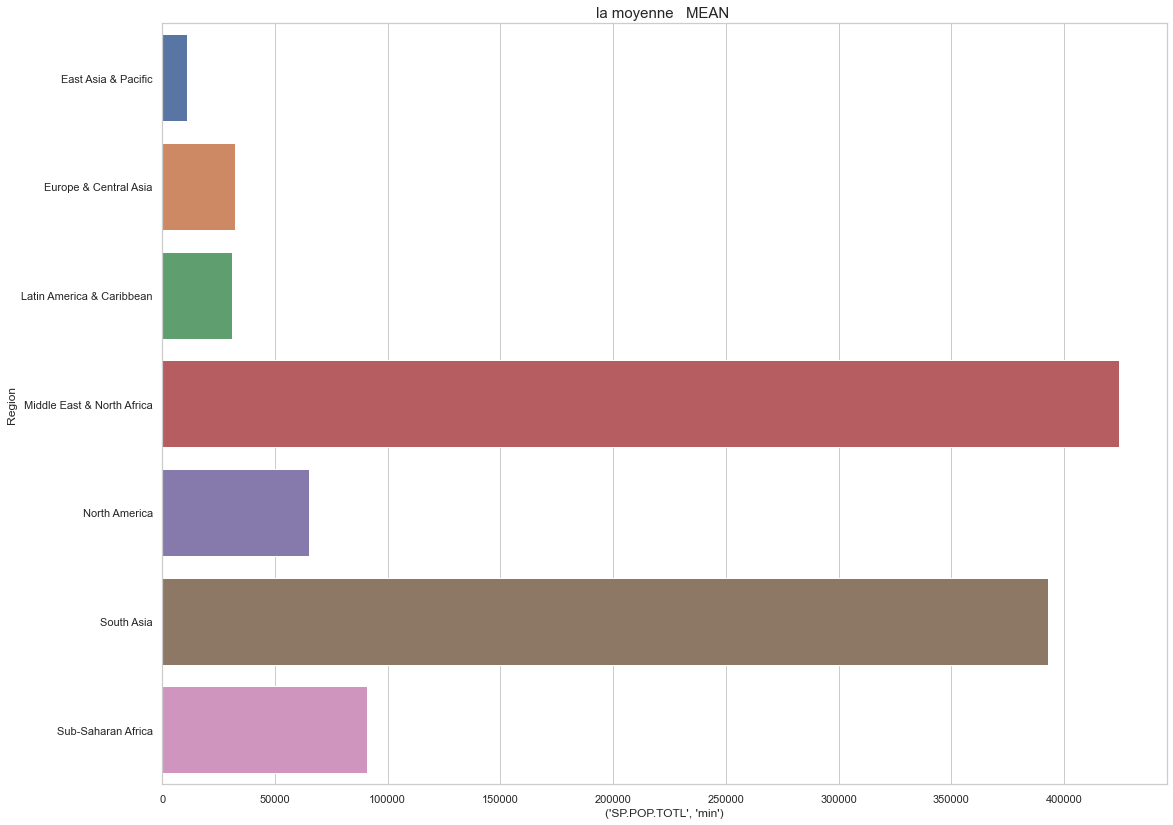

In [814]:
# Calculer la moyenne par région          pour quelques indicateurs  ' SP.POP.TOTL ' 
colors = ["#bd5db0","#70a845","#727bcc","#b49242"]
plt.figure(figsize=(18, 14))
plt.title('la moyenne   MEAN ', size=15)
plt.xlabel('Population, total  ')
plt.ylabel(' La région ')
sns.barplot(x= description_region [('SP.POP.TOTL','min')], y = description_region ['Region'])
#plt.show()

<AxesSubplot:title={'center':'le minimum   MiN '}, xlabel="('SP.POP.TOTL', 'min')", ylabel='Country Name'>

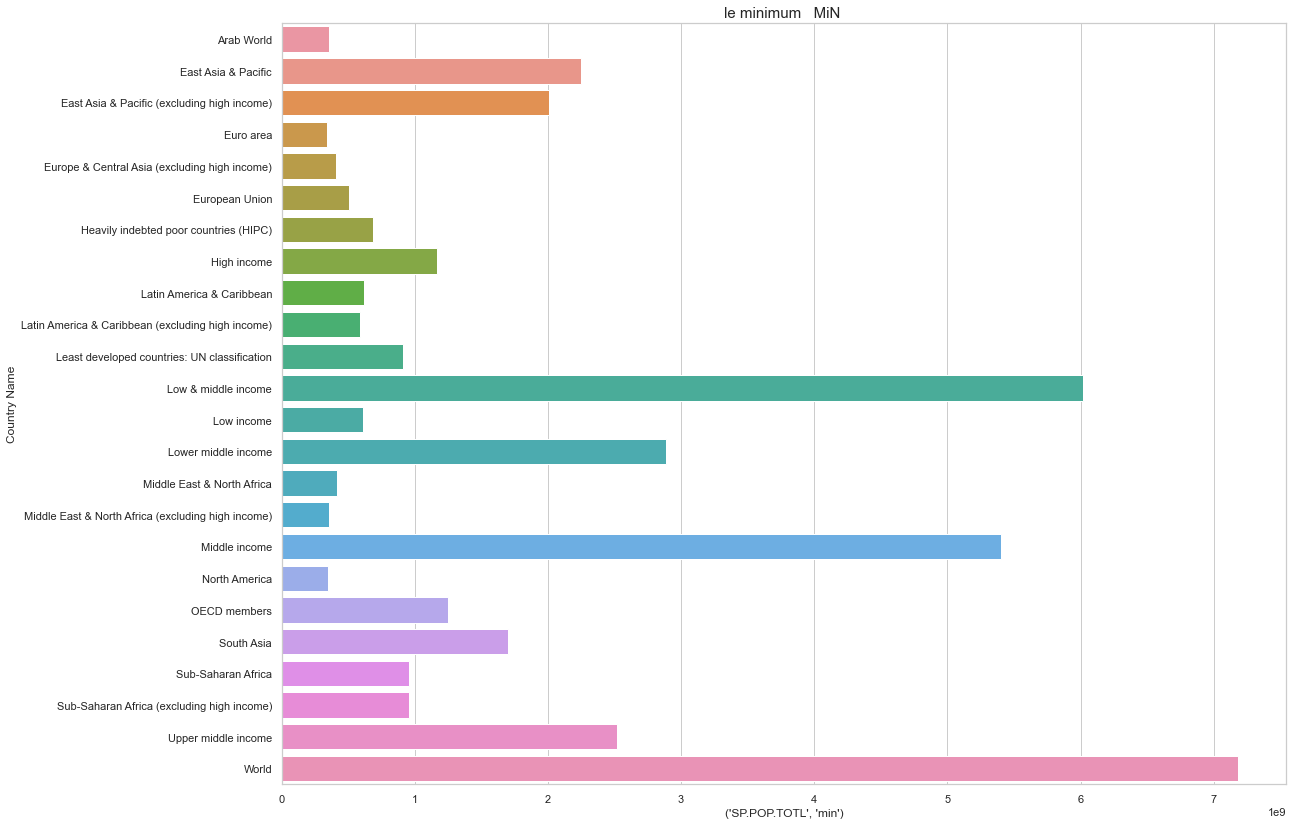

In [815]:
# Calculer le minimum par pays      pour quelques indicateurs  ' SP.POP.TOTL ' 
colors = ["#bd5db0","#70a845","#727bcc","#b49242"]
plt.figure(figsize=(18, 14))
plt.title('le minimum   MiN ', size=15)
plt.xlabel('Indicateur ')
plt.ylabel(' Le pays ')
sns.barplot(x= description_pays [('SP.POP.TOTL','min')], y = description_pays ['Country Name'])
#plt.show()

<AxesSubplot:title={'center':"L'écArt type   STD  "}, xlabel="('SP.POP.TOTL', 'std')", ylabel='Region'>

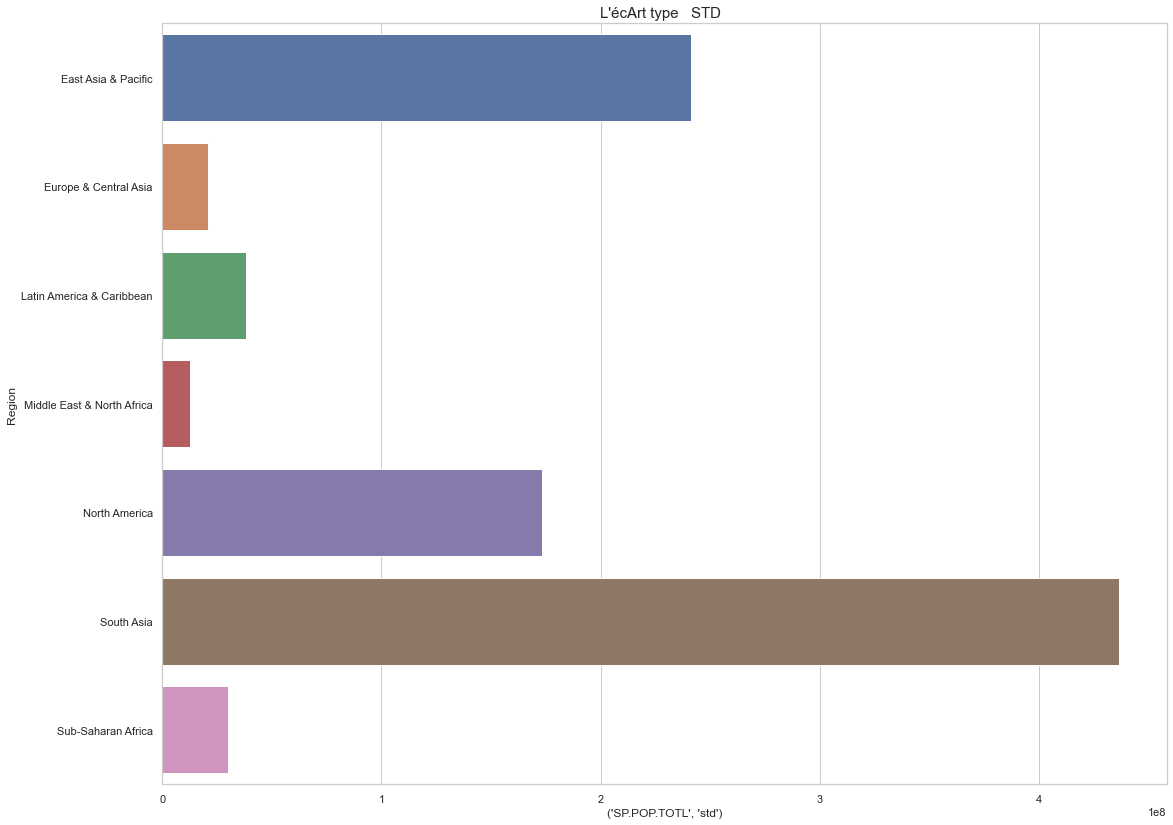

In [816]:
# Calculer la moyenne par région          pour quelques indicateurs  ' SP.POP.TOTL ' 
colors = ["#bd5db0","#70a845","#727bcc","#b49242"]
plt.figure(figsize=(18, 14))
plt.title('L\'écArt type   STD  ', size=15)
plt.xlabel('Indicateur ')
plt.ylabel(' La région ')
sns.barplot(x= description_region [('SP.POP.TOTL','std')], y = description_region ['Region'])
#plt.show()

<AxesSubplot:title={'center':'Le maximum   MAX  '}, xlabel="('SP.POP.TOTL', 'max')", ylabel='Region'>

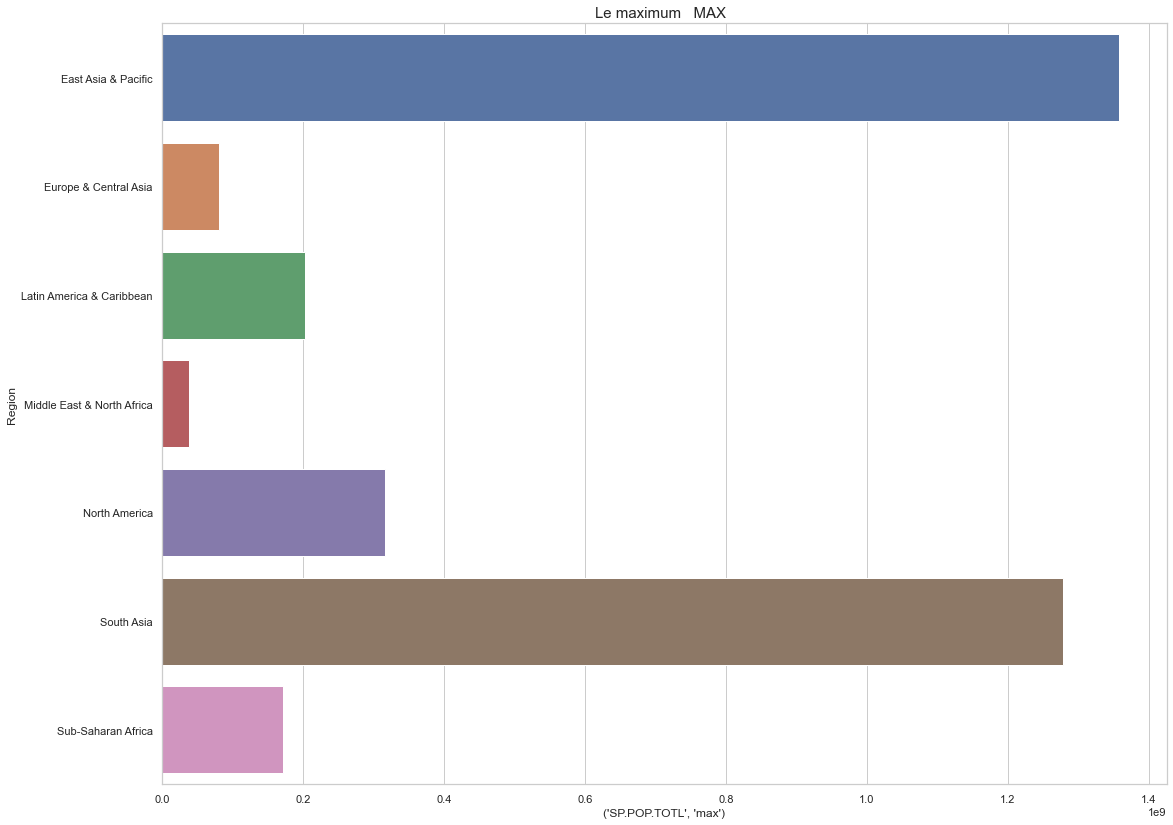

In [817]:
# Calculer la moyenne par région          pour quelques indicateurs  ' SP.POP.TOTL ' 
colors = ["#bd5db0","#70a845","#727bcc","#b49242"]
plt.figure(figsize=(18, 14))
plt.title('Le maximum   MAX  ', size=15)
plt.xlabel('Indicateur ')
plt.ylabel(' La région ')
sns.barplot(x= description_region [('SP.POP.TOTL','max')], y = description_region ['Region'])
#plt.show()

<AxesSubplot:title={'center':'la moyenne   MEAN '}, xlabel="('IT.NET.USER.P2', 'mean')", ylabel='Region'>

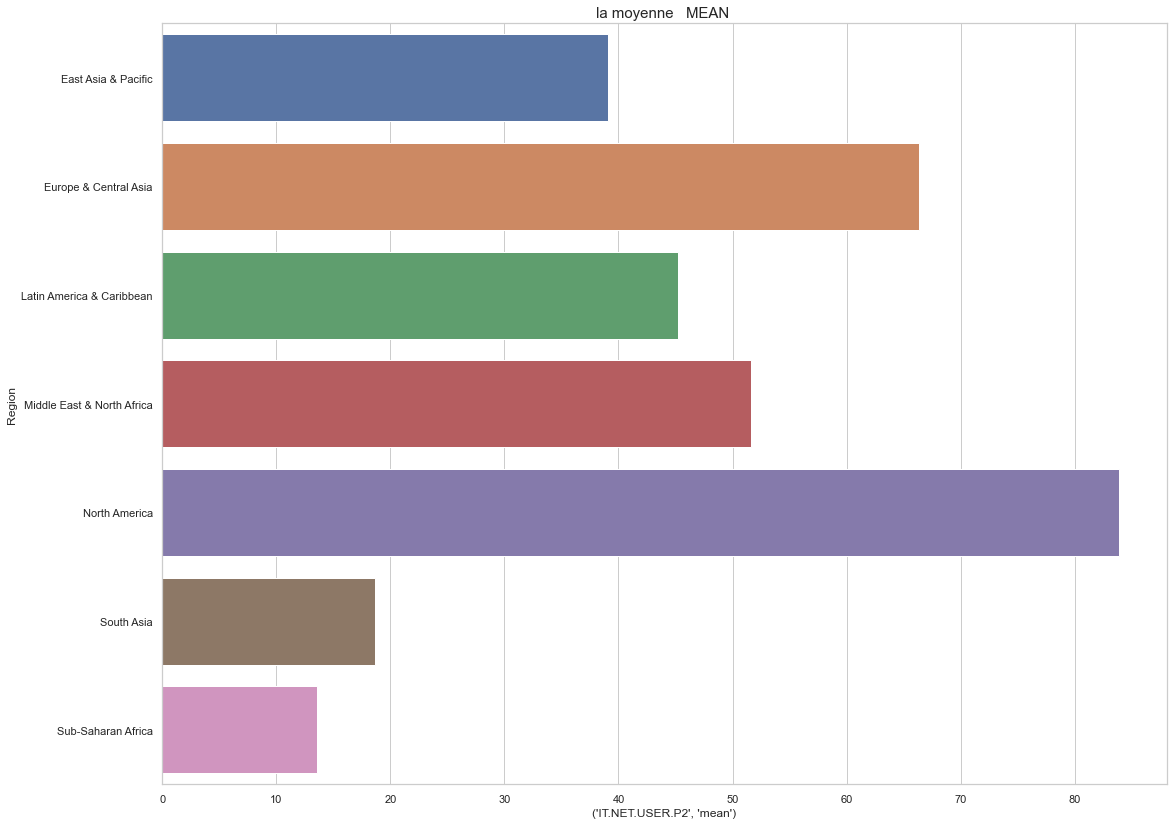

In [818]:

# Calculer la moyenne par région          pour quelques indicateurs  ' SP.POP.TOTL ' 
colors = ["#bd5db0","#70a845","#727bcc","#b49242"]
plt.figure(figsize=(18, 14))
plt.title('la moyenne   MEAN ', size=15)
plt.xlabel('Indicateur ')
plt.ylabel(' La région ')
sns.barplot(x= description_region [('IT.NET.USER.P2','mean')], y = description_region['Region'])
#plt.show()

<AxesSubplot:title={'center':'la moyenne   MEAN '}, xlabel="('IT.NET.USER.P2', 'mean')", ylabel='Country Name'>

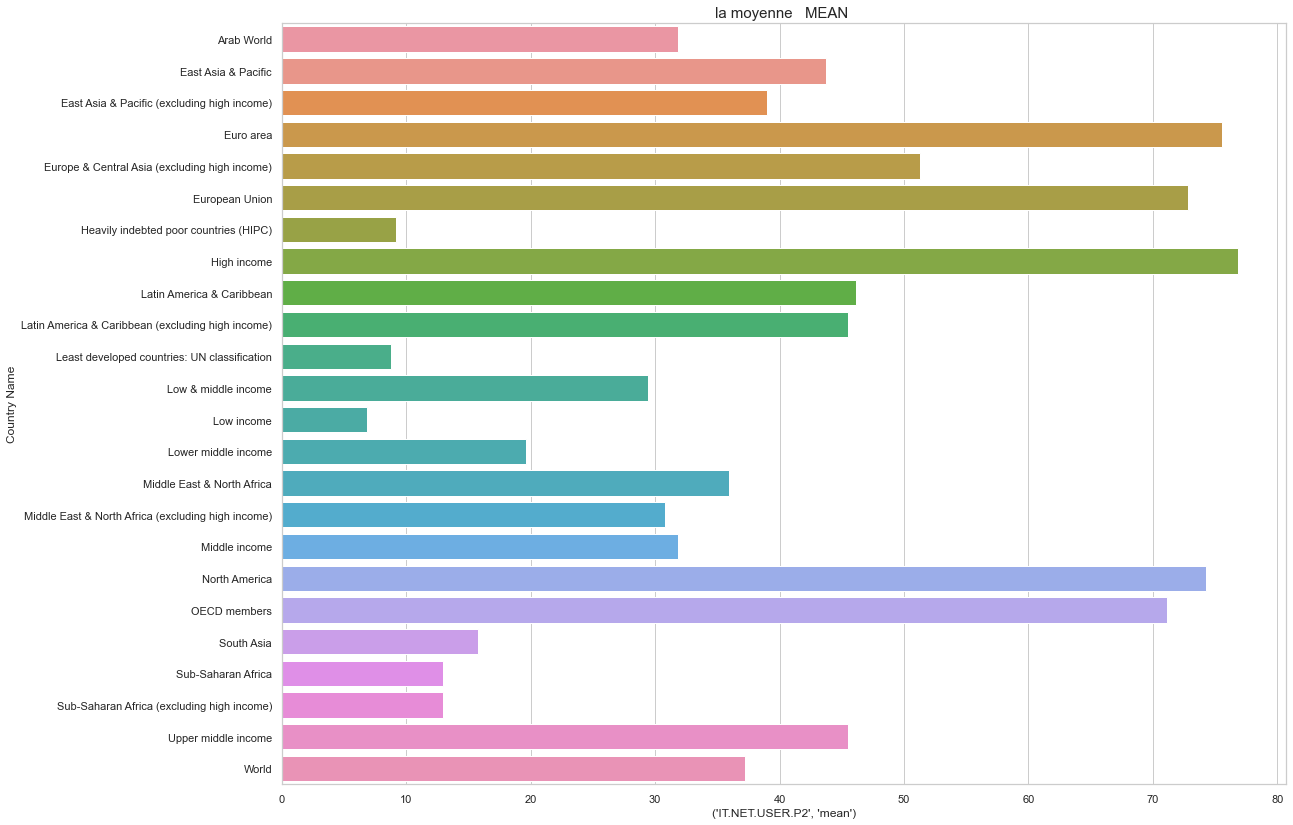

In [819]:
# Calculer la moyenne par pays          pour quelques indicateurs  ' SP.POP.TOTL ' 
colors = ["#bd5db0","#70a845","#727bcc","#b49242"]
plt.figure(figsize=(18, 14))
plt.title('la moyenne   MEAN ', size=15)
plt.xlabel('Indicateur ')
plt.ylabel(' Le pays ')
sns.barplot(x= description_pays [('IT.NET.USER.P2','mean')], y = description_pays ['Country Name'])
#plt.show()
 #  zones  =  pays 
#  countrie = region 

<AxesSubplot:xlabel="('SE.TER.ENRL', 'max')", ylabel='Region'>

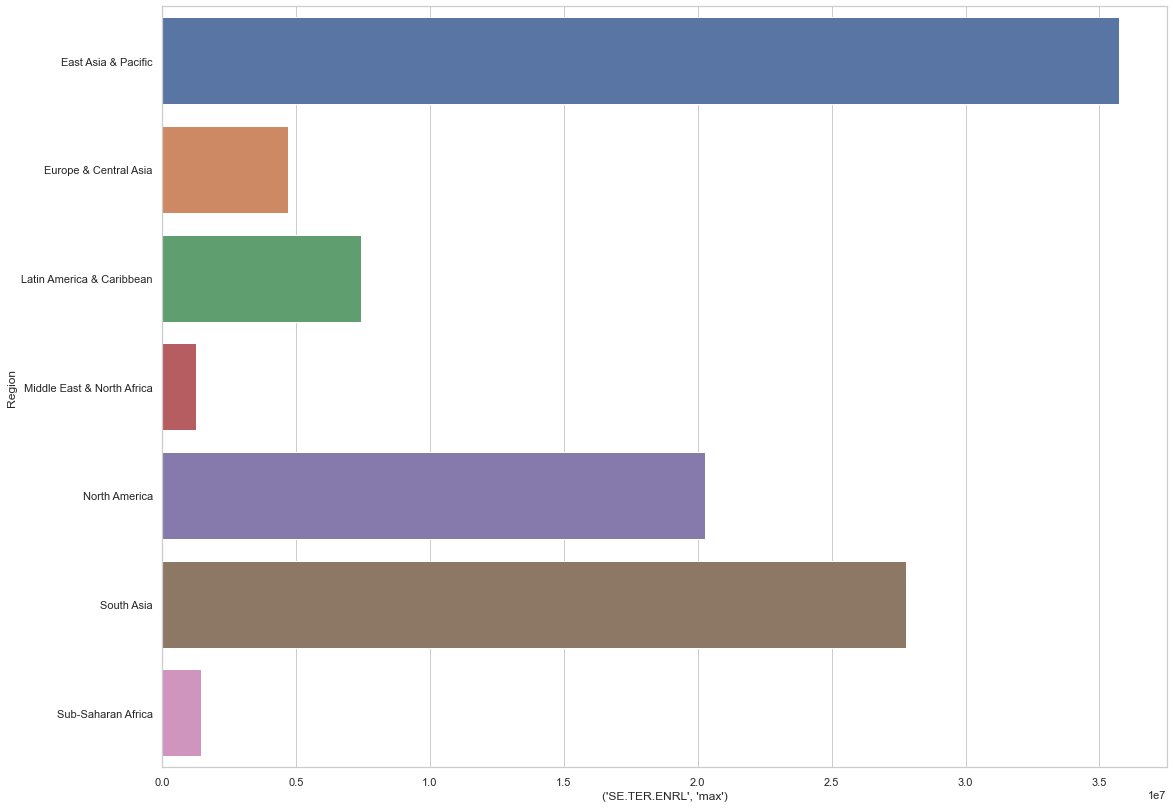

In [820]:

## Calculer le maximum par région   pour quelques indicateurs 
colors = ["#bd5db0","#70a845","#727bcc","#b49242"]
plt.figure(figsize=(18, 14))
#plt.title('L''evolution de la quantité de données ', size=15)
plt.xlabel('Indicateur ')
plt.ylabel(' La région ')
sns.barplot(x= description_region[('SE.TER.ENRL','max')], y = description_region['Region'])
#plt.show()

<AxesSubplot:title={'center':'la moyenne   MEAN '}, xlabel="('SE.TER.ENRL', 'mean')", ylabel='Country Name'>

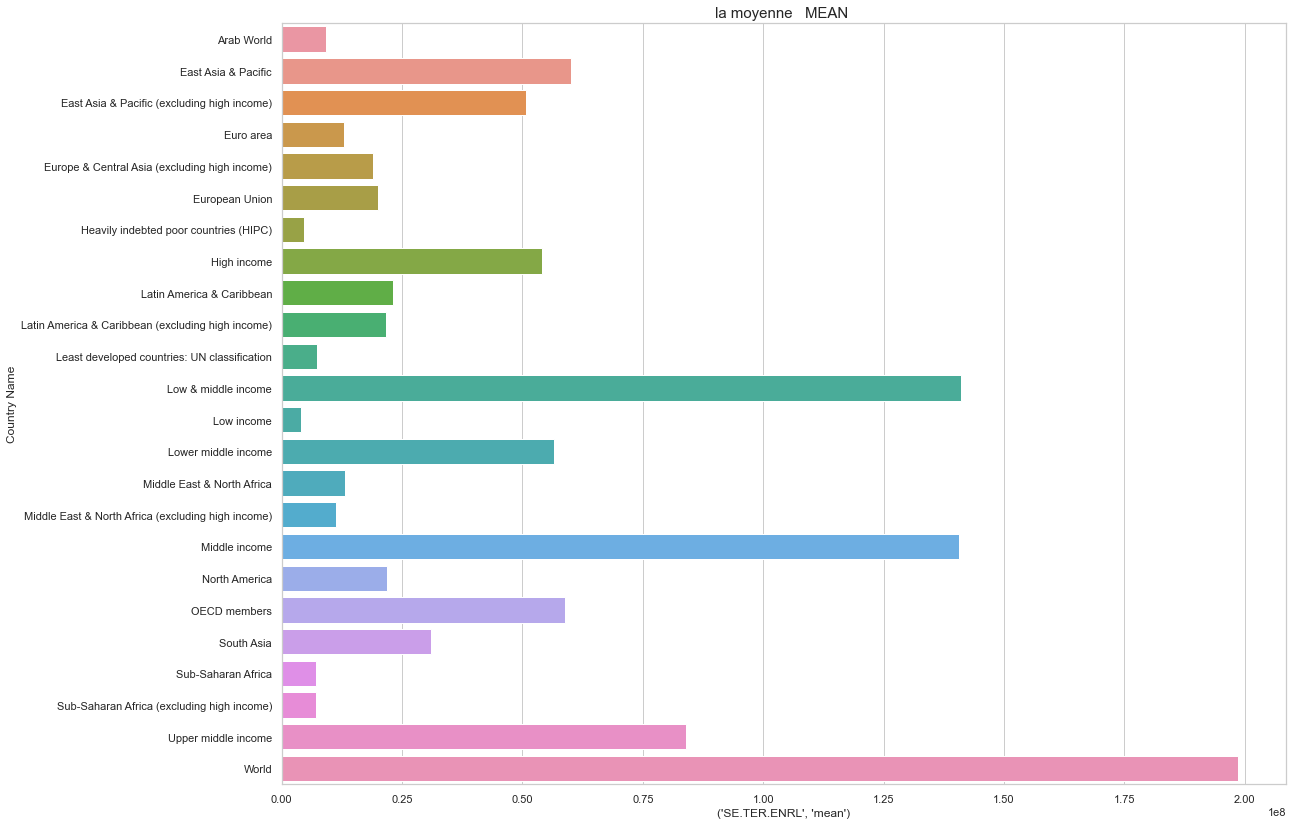

In [821]:
# Calculer la moyenne par pays         pour quelques indicateurs  ' SP.POP.TOTL ' 
colors = ["#bd5db0","#70a845","#727bcc","#b49242"]
plt.figure(figsize=(18, 14))
plt.title('la moyenne   MEAN ', size=15)
plt.xlabel('Indicateur ')
plt.ylabel(' Le pays ')
sns.barplot(x= description_pays [('SE.TER.ENRL','mean')], y = description_pays ['Country Name'])
#plt.show()
 #  zones  =  pays 
#  countrie = region 



<AxesSubplot:title={'center':"L'écart type    STD "}, xlabel="('UIS.E.3', 'std')", ylabel='Region'>

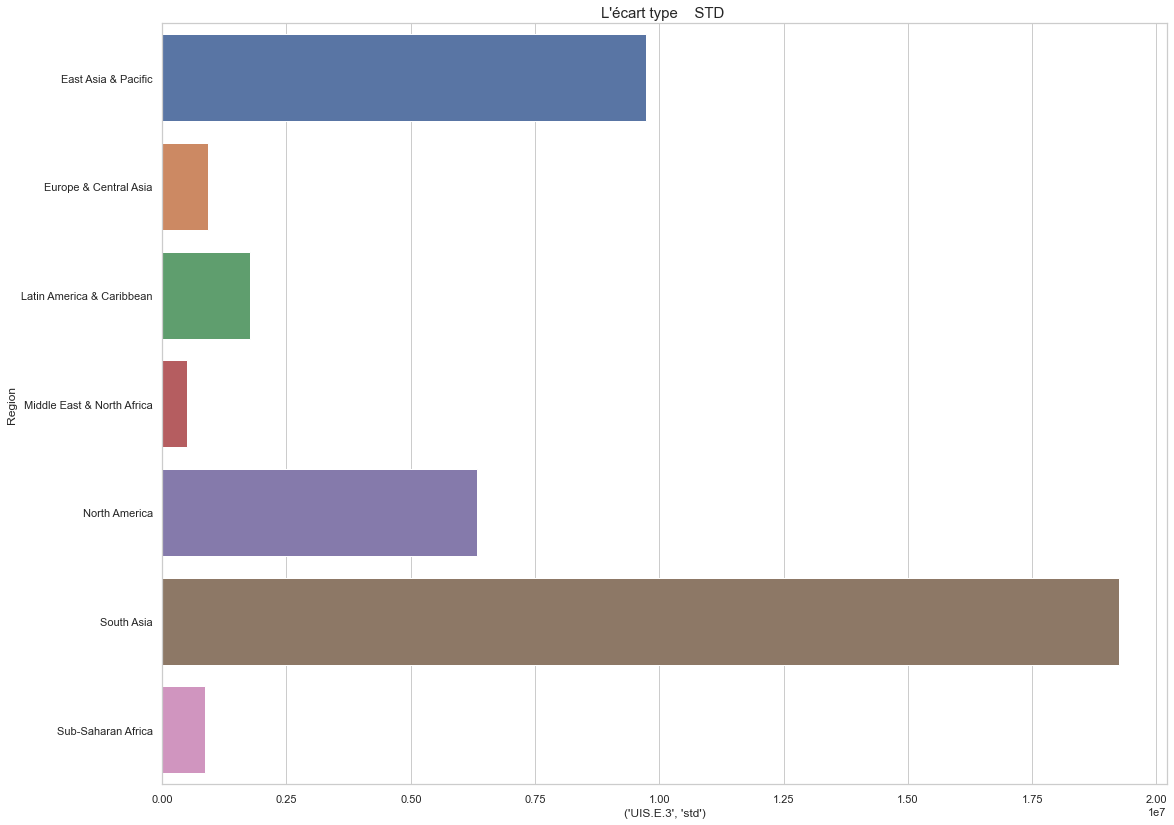

In [822]:

# Calculer L'écart type par région   pour quelques indicateurs  SP.POP.TOTL
colors = ["#bd5db0","#70a845","#727bcc","#b49242"]
plt.figure(figsize=(18, 14))
plt.title('L\'écart type    STD ', size=15)
plt.xlabel('Indicateur')
plt.ylabel('La région ')
sns.barplot(x= description_region[('UIS.E.3','std')], y = description_region['Region'])
#plt.show()

<AxesSubplot:title={'center':'La écart type '}, xlabel="('UIS.E.3', 'sum')", ylabel='Country Name'>

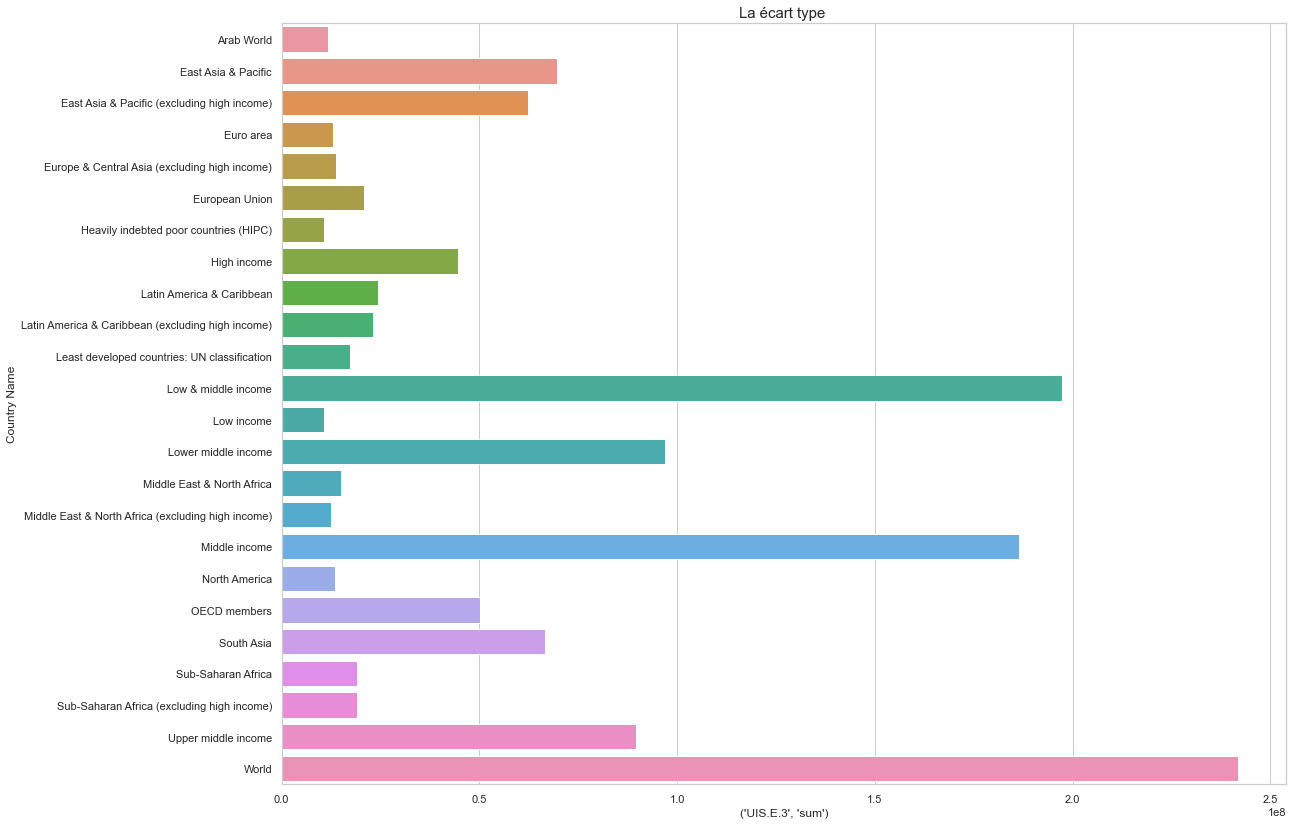

In [823]:
#  Calculer La somme type par pays  pour quelques indicateurs 
colors = ["#bd5db0","#70a845","#727bcc","#b49242"]
plt.figure(figsize=(18, 14))
plt.title('La écart type ', size=15)
plt.xlabel('Indicateur')
plt.ylabel('La pays ')
sns.barplot(x= description_pays[('UIS.E.3','sum')], y = description_pays['Country Name'])
#plt.show()

<AxesSubplot:title={'center':'La somme SUM '}, xlabel="('UIS.E.4', 'sum')", ylabel='Region'>

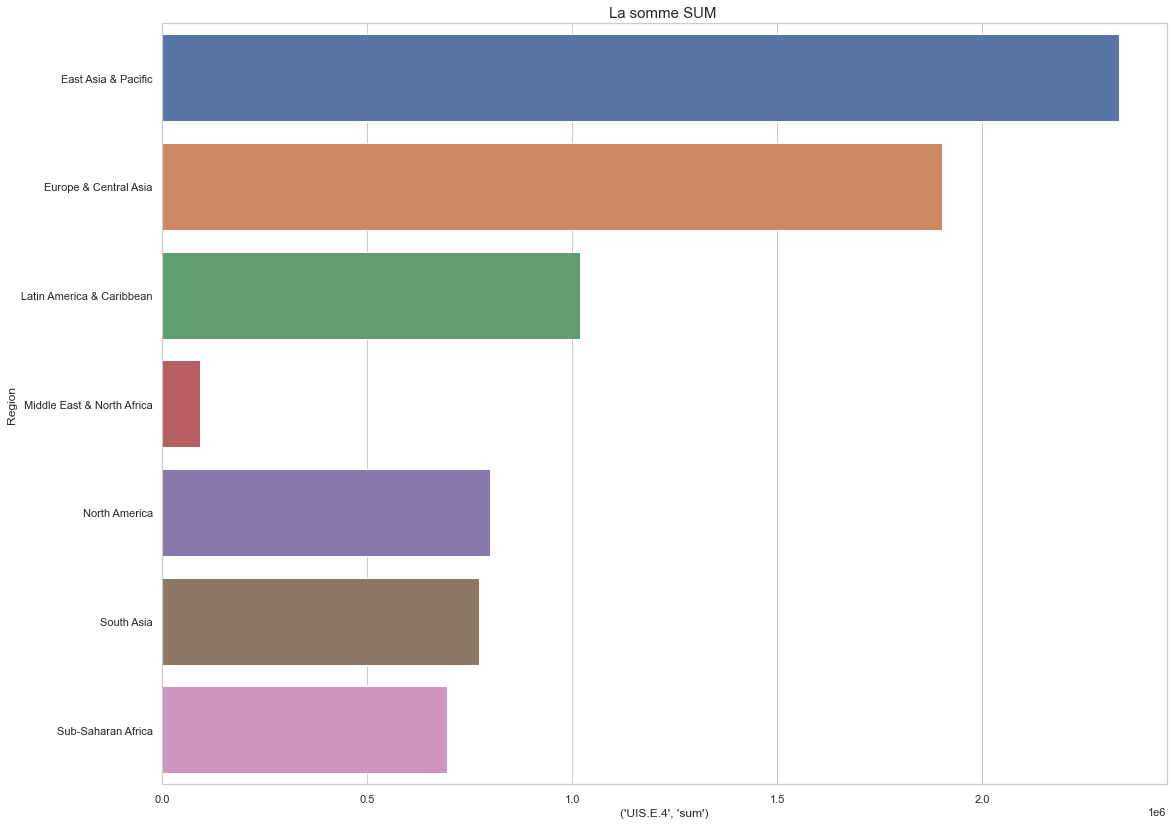

In [824]:
#  Calculer La somme type par région   pour quelques indicateurs 
colors = ["#bd5db0","#70a845","#727bcc","#b49242"]
plt.figure(figsize=(18, 14))
plt.title('La somme SUM ', size=15)
plt.xlabel('Indicateur')
plt.ylabel('La région ')
sns.barplot(x= description_region[('UIS.E.4','sum')], y = description_region['Region'])
#plt.show()

<AxesSubplot:title={'center':'La somme  SUM '}, xlabel="('UIS.E.4', 'sum')", ylabel='Country Name'>

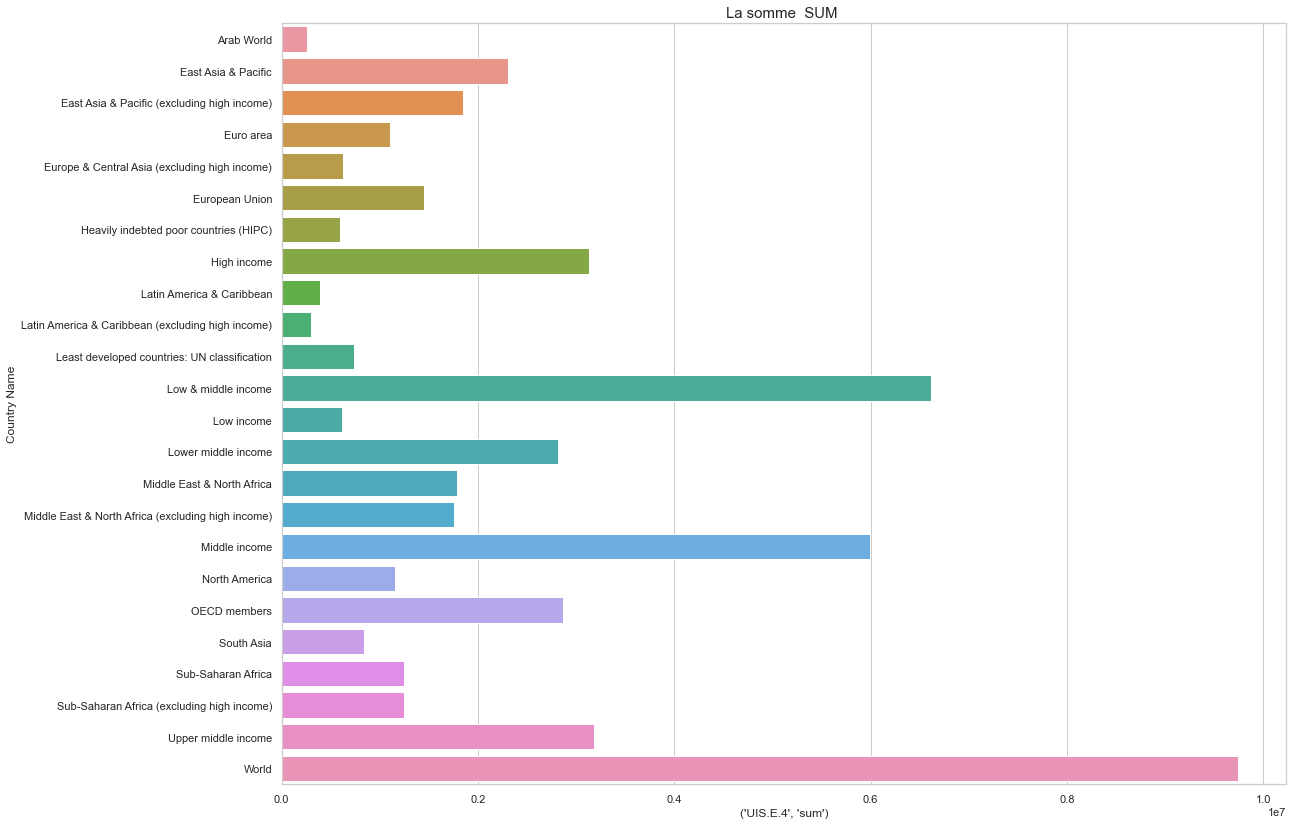

In [825]:
#  Calculer La somme type par  pays   pour quelques indicateurs 
colors = ["#bd5db0","#70a845","#727bcc","#b49242"]
plt.figure(figsize=(18, 14))
plt.title('La somme  SUM ', size=15)
plt.xlabel('Indicateur')
plt.ylabel('Le pays ')
sns.barplot(x= description_pays[('UIS.E.4','sum')], y = description_pays['Country Name'])
#plt.show()

In [826]:
#sns.set(style="whitegrid")
#colors = ["#bd5db0","#70a845","#727bcc","#b49242"]
#plt.figure(figsize=(18, 14))
#plt.title('L\'écart type  ', size=15)
#plt.xlabel('Indicateur')
##plt.ylabel('La région ')
#sns.barplot(x= description_countries[('SP.POP.1524.TO.UN','.....')], y = description_countries['Region'])
#plt.show()

In [827]:
description_pays.sample(5)

Country Name       UIS.E.4      \
                                                        mean std   
0                                   Arab World  2.631211e+05 NaN   
21  Sub-Saharan Africa (excluding high income)  1.242276e+06 NaN   
22                         Upper middle income  3.183557e+06 NaN   
1                          East Asia & Pacific  2.302949e+06 NaN   
17                               North America  1.150370e+06 NaN   

                                                               UIS.E.3      \
             50%           sum           min           max        mean std   
0   2.631211e+05  2.631211e+05  2.631211e+05  2.631211e+05  11662032.4 NaN   
21  1.242276e+06  1.242276e+06  1.242276e+06  1.242276e+06  19174404.8 NaN   
22  3.183557e+06  3.183557e+06  3.183557e+06  3.183557e+06  89531648.0 NaN   
1   2.302949e+06  2.302949e+06  2.302949e+06  2.302949e+06  69637812.8 NaN   
17  1.150370e+06  1.150370e+06  1.150370e+06  1.150370e+06  13372830.4 NaN   

                ... SP.POP.1524.TO.UN             IT.NET.USER.P2      \
           50%  ...               50% sum min max           mean std   
0   11662032.4  ...               NaN NaN NaN NaN      31.834459 NaN   
21  19174404.8  ...               NaN NaN NaN NaN      12.989567 NaN   
22  89531648.0  ...               NaN NaN NaN NaN      45.464573 NaN   
1   69637812.8  ...               NaN NaN NaN NaN      43.754148 NaN   
17  13372830.4  ...               NaN NaN NaN NaN      74.260452 NaN   

                                                
          50%        sum        min        max  
0   31.834459  31.834459  31.834459  31.834459  
21  12.989567  12.989567  12.989567  12.989567  
22  45.464573  45.464573  45.464573  45.464573  
1   43.754148  43.754148  43.754148  43.754148  
17  74.260452  74.260452  74.260452  74.260452  

[5 rows x 43 columns]

In [828]:
description_region.sample(5)

Region        UIS.E.4                               \
                                        mean            std           50%   
6          Sub-Saharan Africa   36579.266667   69361.871705   4679.000000   
3  Middle East & North Africa    9253.450000   10918.928517   5705.125000   
1       Europe & Central Asia   50031.265382  133776.183721  10813.000000   
2   Latin America & Caribbean   53614.363158  180525.720490   3103.000000   
5                  South Asia  128660.658333  172484.615145  57321.566667   

                                                UIS.E.3                \
            sum         min           max          mean           std   
6  6.950061e+05  334.600000  213213.80000  4.447514e+05  8.523980e+05   
3  9.253450e+04  219.500000   37026.75000  4.005455e+05  5.018389e+05   
1  1.901188e+06  132.000000  798918.03125  6.133072e+05  9.304212e+05   
2  1.018673e+06   18.000000  792796.00000  6.772967e+05  1.758547e+06   
5  7.719640e+05  261.666667  446881.00000  9.415460e+06  1.924265e+07   

                ... SP.POP.1524.TO.UN                               \
           50%  ...               50%           sum            min   
6   136223.100  ...      2.361723e+06  1.668016e+08  113561.166667   
3   159624.325  ...      1.042890e+06  3.901152e+07   53881.000000   
1   263745.900  ...      1.107469e+06  9.694557e+07   44816.166667   
2   124699.625  ...      1.337724e+06  1.002773e+08   13861.833333   
5  1262076.500  ...      6.607114e+06  3.298129e+08   73939.166667   

                IT.NET.USER.P2                                                \
            max           mean        std        50%          sum        min   
6  3.472347e+07      13.577007  12.049061   9.218154   570.234274   0.894407   
3  6.869491e+06      51.630411  25.062528  56.625398   929.347404   9.576368   
1  1.380749e+07      66.374672  21.119148  65.785332  3385.108250   9.997557   
2  3.353126e+07      45.178755  17.067168  45.003936  1536.077659  10.514329   
5  2.401628e+08      18.698948  11.954131  15.420493   149.591586   6.601467   

              
         max  
6  49.095576  
3  84.568775  
1  96.509472  
2  78.554812  
5  43.770664  

[5 rows x 43 columns]

In [829]:
#  description_zones, df_zones  = description_indicateurs(data_areas, indicateurs, 'Country Name')

## --------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------

In [830]:
## Maintenant on va tracer les graphiques de l'ensemble des indicateurs , selon le classement 
indicateurs = ['SP.POP.TOTL',  #  par ordre 
               'IT.NET.USER.P2',
               'SE.TER.ENRL',
               'UIS.E.3',
               'IT.CMP.PCMP.P2',
               'SP.POP.1524.TO.UN',
               'UIS.E.4']

In [831]:
data = pd.read_csv('EdStatsData.csv', )
data_source = data.copy()
data_source[data_source['Indicator Code'] == 'SP.POP.TOTL']['Indicator Name'].unique()[0]
data_source[data_source['Indicator Code'].isin(['SP.POP.TOTL'])].count().sum()

12123

In [832]:
data_source[data_source['Indicator Code'] == 'IT.NET.USER.P2']['Indicator Name'].unique()[0]
data_source[data_source['Indicator Code'].isin(['IT.NET.USER.P2'])].count().sum()

6407

In [833]:
data_source[data_source['Indicator Code'] == 'SE.TER.ENRL']['Indicator Name'].unique()[0]
data_source[data_source['Indicator Code'].isin(['SE.TER.ENRL'])].count().sum()

7574

In [834]:
data_source[data_source['Indicator Code'] == 'UIS.E.3']['Indicator Name'].unique()[0]
data_source[data_source['Indicator Code'].isin(['UIS.E.3'])].count().sum()

3873

In [835]:
data_source[data_source['Indicator Code'] == 'IT.CMP.PCMP.P2']['Indicator Name'].unique()[0]
data_source[data_source['Indicator Code'].isin(['IT.CMP.PCMP.P2'])].count().sum()

3762

In [836]:
data_source[data_source['Indicator Code'] == 'SP.POP.1524.TO.UN']['Indicator Name'].unique()[0]
data_source[data_source['Indicator Code'].isin(['SP.POP.1524.TO.UN'])].count().sum()

5756

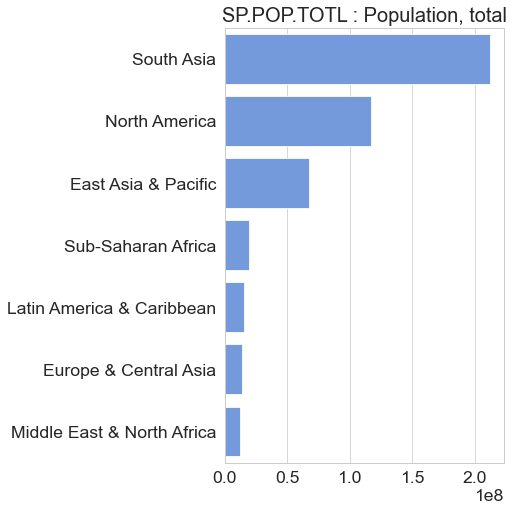

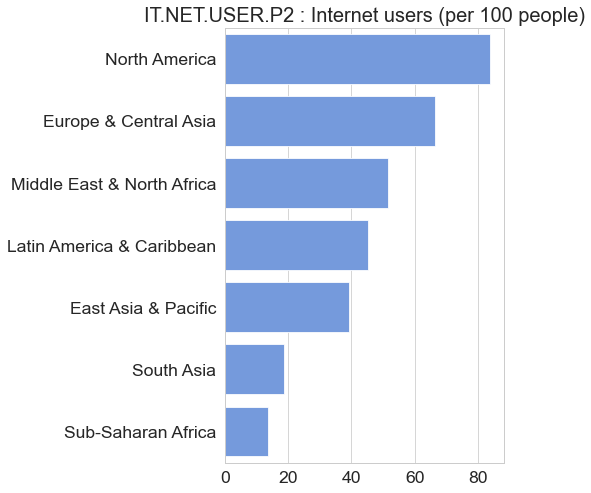

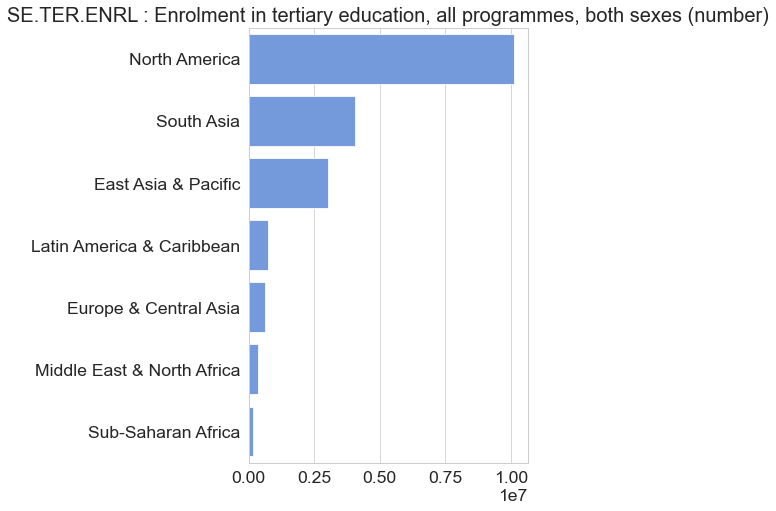

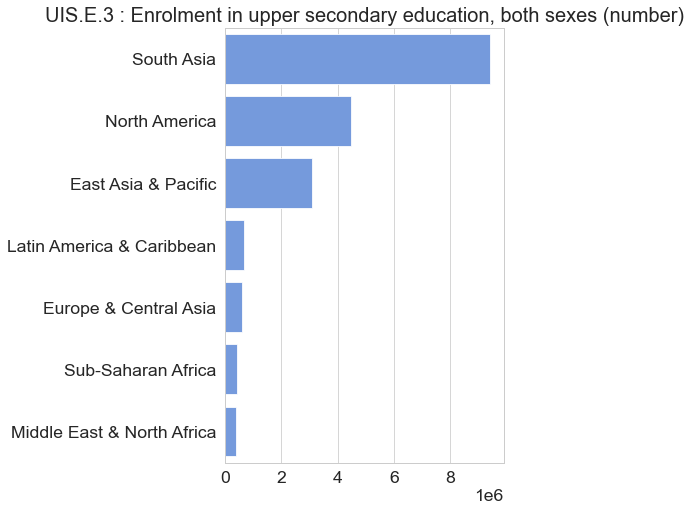

KeyError: ('IT.CMP.PCMP.P2', 'mean')

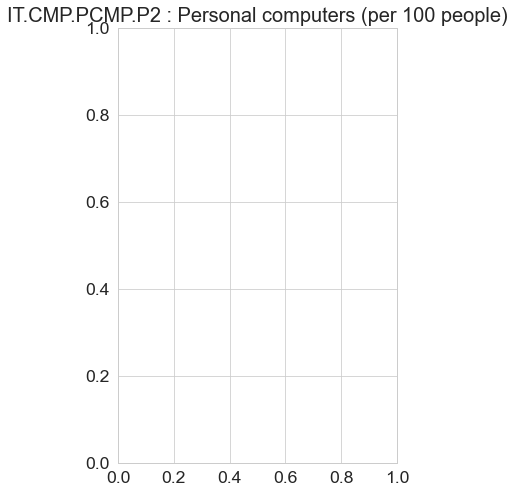

In [837]:
###  
for indicateur in indicateurs:
    plt.figure(figsize = (5,8))
    sns.set_context("paper", font_scale=2)
    if data_source[data_source['Indicator Code'].isin([indicateur])].count().sum() > 0 :
        chaine = indicateur + ' : ' + data_source[data_source['Indicator Code'] == indicateur]['Indicator Name'].unique()[0]
        plt.title(chaine, size=20)
        description_region.sort_values(by=(indicateur, 'mean'), ascending=False, inplace=True)
        ax = plt.gca()
        sns.barplot(x = description_region[(indicateur, 'mean')], y=description_region['Region'], color='cornflowerblue')
        ax.set_ylabel('')    
        ax.set_xlabel('')
        plt.show()
        print('\n')
    else:
        print(indicateur, ' : Aucune donnée à afficher.')

In [ ]:
for indicateur in indicateurs:
    plt.figure(figsize = (5,8))
    sns.set_context("paper", font_scale=2)
    if data_source[data_source['Indicator Code'].isin([indicateur])].count().sum() > 0 :
        chaine = indicateur + ' : ' + data_source[data_source['Indicator Code'] == indicateur]['Indicator Name'].unique()[0]
        plt.title(chaine, size=20)
        description_pays.sort_values(by=(indicateur, 'mean'), ascending=False, inplace=True)
        ax = plt.gca()
        sns.barplot(x = description_pays[(indicateur, 'mean')], y=description_pays['Country Name'], color='cornflowerblue')
        ax.set_ylabel('')    
        ax.set_xlabel('')
        plt.show()
        print('\n')
    else:
        print(indicateur, ' : Aucune donnée à afficher.')

In [838]:
data_region.head(5)

Country Name Country Code  \
1171   Arab World          ARB   
1204   Arab World          ARB   
1214   Arab World          ARB   
1375   Arab World          ARB   
2482   Arab World          ARB   

                                         Indicator Name     Indicator Code  \
1171  Enrolment in post-secondary non-tertiary educa...            UIS.E.4   
1204  Enrolment in tertiary education, all programme...        SE.TER.ENRL   
1214  Enrolment in upper secondary education, both s...            UIS.E.3   
1375                    Internet users (per 100 people)     IT.NET.USER.P2   
2482                      Population, ages 15-24, total  SP.POP.1524.TO.UN   

             2010s Region  
1171  2.631211e+05    NaN  
1204  9.222392e+06    NaN  
1214  1.166203e+07    NaN  
1375  3.183446e+01    NaN  
2482           NaN    NaN

In [839]:
indicateurs = ['SP.POP.TOTL',  #  par ordre 
               'IT.NET.USER.P2',
               'SE.TER.ENRL',
               'UIS.E.3',
               'IT.CMP.PCMP.P2',
               'SP.POP.1524.TO.UN',
               'UIS.E.4']

In [840]:
data_source[data_source['Indicator Code'] == 'SP.POP.TOTL']['Indicator Name'].unique()[0]


'Population, total'

In [841]:
data_source[data_source['Indicator Code'] == 'IT.NET.USER.P2']['Indicator Name'].unique()[0]


'Internet users (per 100 people)'

In [842]:
data_source[data_source['Indicator Code'] == 'SE.TER.ENRL']['Indicator Name'].unique()[0]


'Enrolment in tertiary education, all programmes, both sexes (number)'

In [843]:
data_source[data_source['Indicator Code'] == 'UIS.E.3']['Indicator Name'].unique()[0]


'Enrolment in upper secondary education, both sexes (number)'

In [844]:
data_source[data_source['Indicator Code'] == 'IT.CMP.PCMP.P2']['Indicator Name'].unique()[0]


'Personal computers (per 100 people)'

In [845]:
data_source[data_source['Indicator Code'] == 'SP.POP.1524.TO.UN']['Indicator Name'].unique()[0]


'Population, ages 15-24, total'

In [846]:
data_source[data_source['Indicator Code'] == 'UIS.E.4']['Indicator Name'].unique()[0]

'Enrolment in post-secondary non-tertiary education, both sexes (number)'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


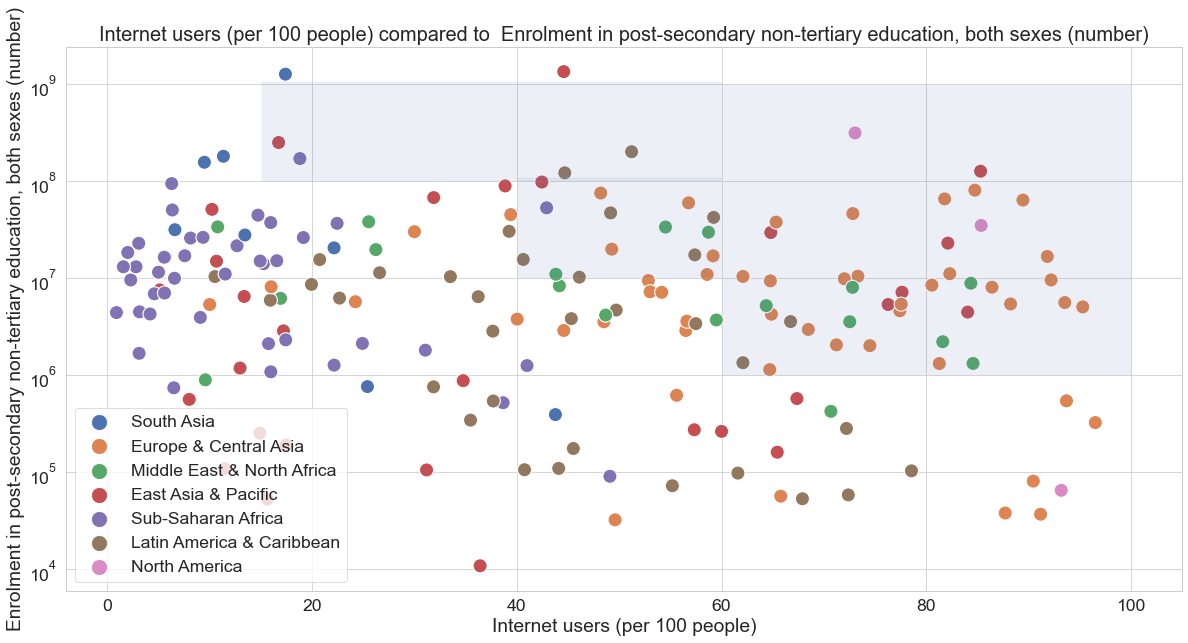

In [847]:
import matplotlib.patches as patches
plt.figure(figsize = (20,10))
ax = plt.gca()
sns.set_context("paper", font_scale=2)
sns.scatterplot(df_region['IT.NET.USER.P2'], df_region['SP.POP.TOTL'], hue=df_region['Region'], s=200)
plt.xlabel('Internet users (per 100 people)')
ax.add_patch(patches.Rectangle((15, 100000000), 45, 990000000, alpha=0.1))
ax.add_patch(patches.Rectangle((40, 10000000), 20, 99900000, alpha=0.1))
ax.add_patch(patches.Rectangle((60, 1000000), 40, 999000000, alpha=0.1))

plt.legend(loc='lower left',markerscale=3)

#legend_elemnts = [patches.Patch(alpha=0.1, label='Potential customers')]
#plt.legend(handles = legend_elements, loc='lower left',markerscale=3)


ax.set_yscale('log')
plt.ylabel('Enrolment in post-secondary non-tertiary education, both sexes (number)')
plt.title('Internet users (per 100 people) compared to  Enrolment in post-secondary non-tertiary education, both sexes (number)', size=20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


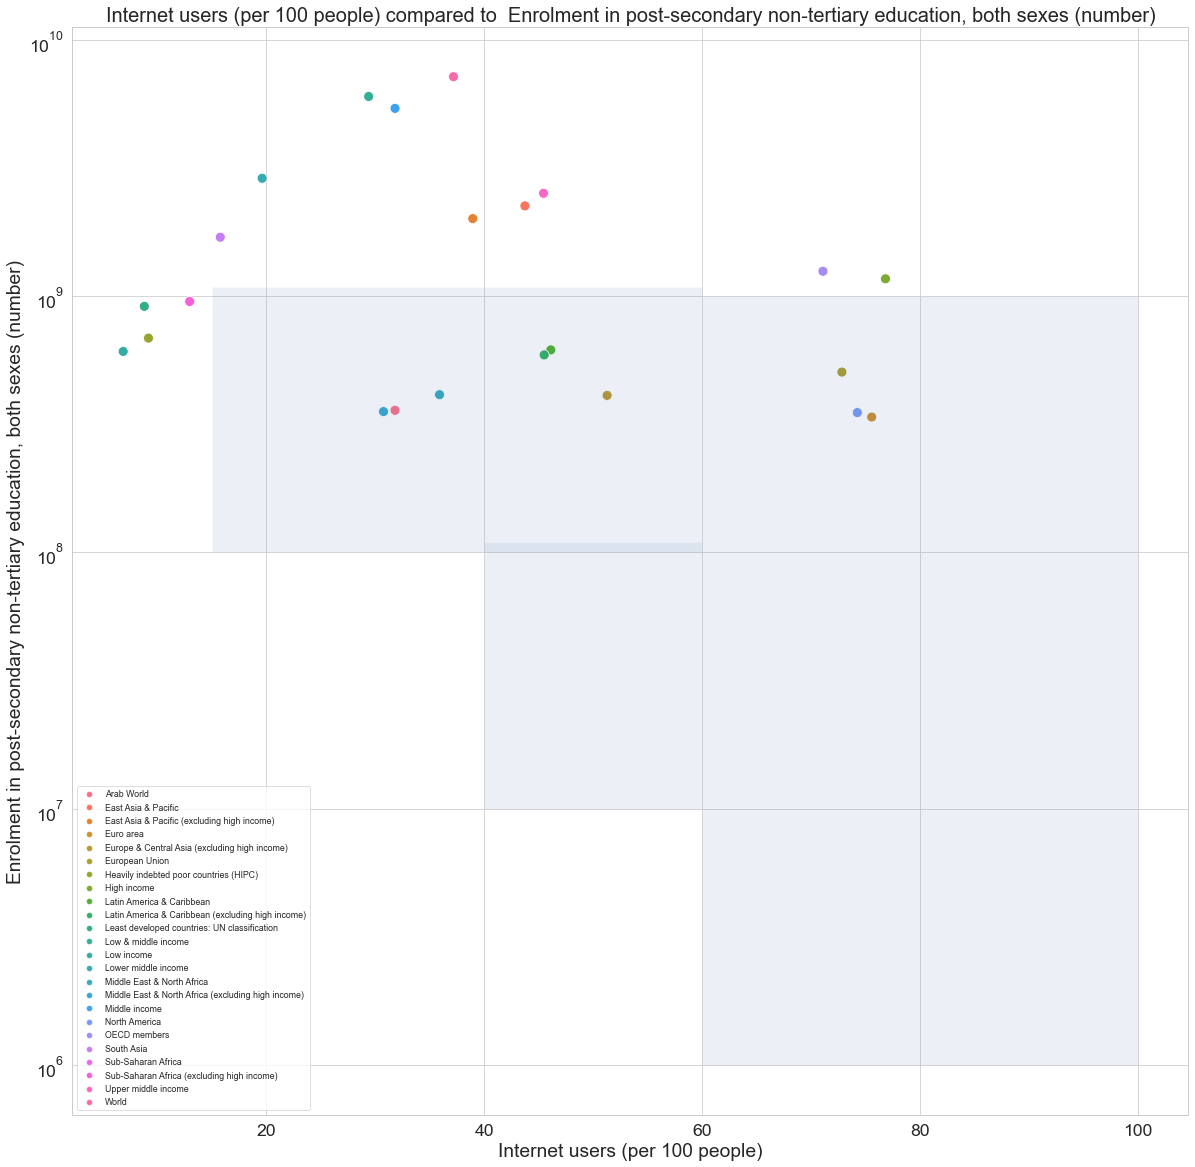

In [848]:
# distribution par pays   


import matplotlib.patches as patches
plt.figure(figsize = (20,20))
ax = plt.gca()
sns.set_context("paper", font_scale=1)
sns.scatterplot(df_pays['IT.NET.USER.P2'], df_pays['SP.POP.TOTL'], hue=df_pays['Country Name'], s=100)
plt.xlabel('Internet users (per 100 people)')
ax.add_patch(patches.Rectangle((15, 100000000), 45, 990000000, alpha=0.1))
ax.add_patch(patches.Rectangle((40, 10000000), 20, 99900000, alpha=0.1))
ax.add_patch(patches.Rectangle((60, 1000000), 40, 999000000, alpha=0.1))

plt.legend(loc='lower left' , markerscale=1)

#legend_elemnts = [patches.Patch(alpha=0.1, label='Potential customers')]
#plt.legend(handles = legend_elements, loc='lower left',markerscale=3)


ax.set_yscale('log')
plt.ylabel('Enrolment in post-secondary non-tertiary education, both sexes (number)')
plt.title('Internet users (per 100 people) compared to  Enrolment in post-secondary non-tertiary education, both sexes (number)', size=20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


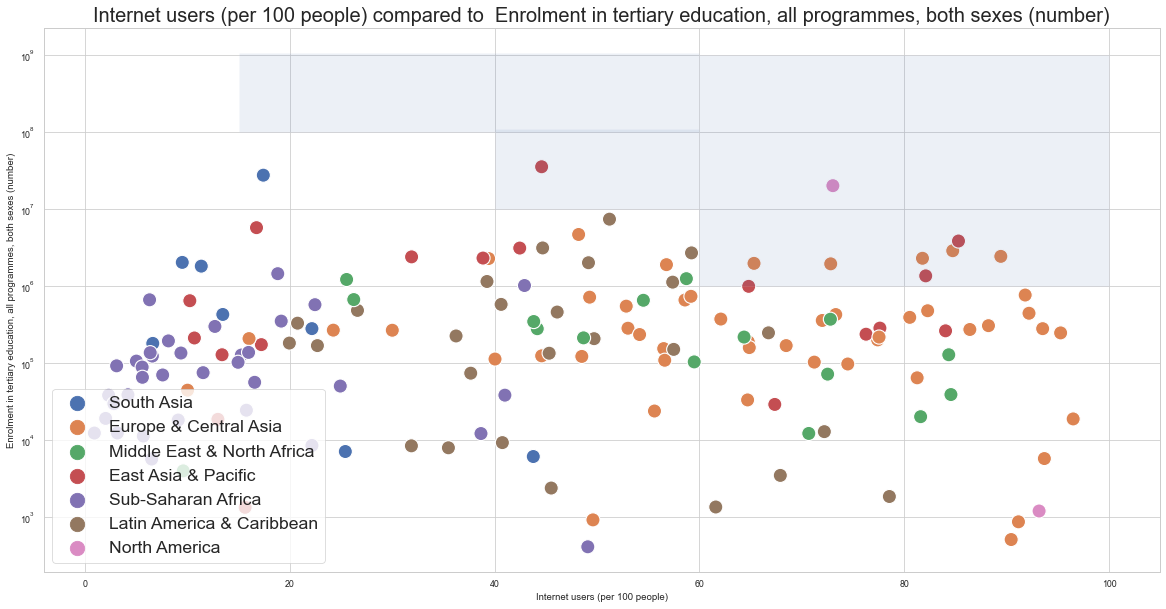

In [849]:
import matplotlib.patches as patches
plt.figure(figsize = (20,10))
ax = plt.gca()
sns.set_context("paper", font_scale=2)
sns.scatterplot(df_region['IT.NET.USER.P2'], df_region['SE.TER.ENRL'], hue=df_region['Region'], s=200)
plt.xlabel('Internet users (per 100 people)')
ax.add_patch(patches.Rectangle((15, 100000000), 45, 990000000, alpha=0.1))
ax.add_patch(patches.Rectangle((40, 10000000), 20, 99900000, alpha=0.1))
ax.add_patch(patches.Rectangle((60, 1000000), 40, 999000000, alpha=0.1))

plt.legend(loc='lower left',markerscale=3)

#legend_elemnts = [patches.Patch(alpha=0.1, label='Potential customers')]
#plt.legend(handles = legend_elements, loc='lower left',markerscale=3)


ax.set_yscale('log')
plt.ylabel('Enrolment in tertiary education, all programmes, both sexes (number)')
plt.title('Internet users (per 100 people) compared to  Enrolment in tertiary education, all programmes, both sexes (number)', size=20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


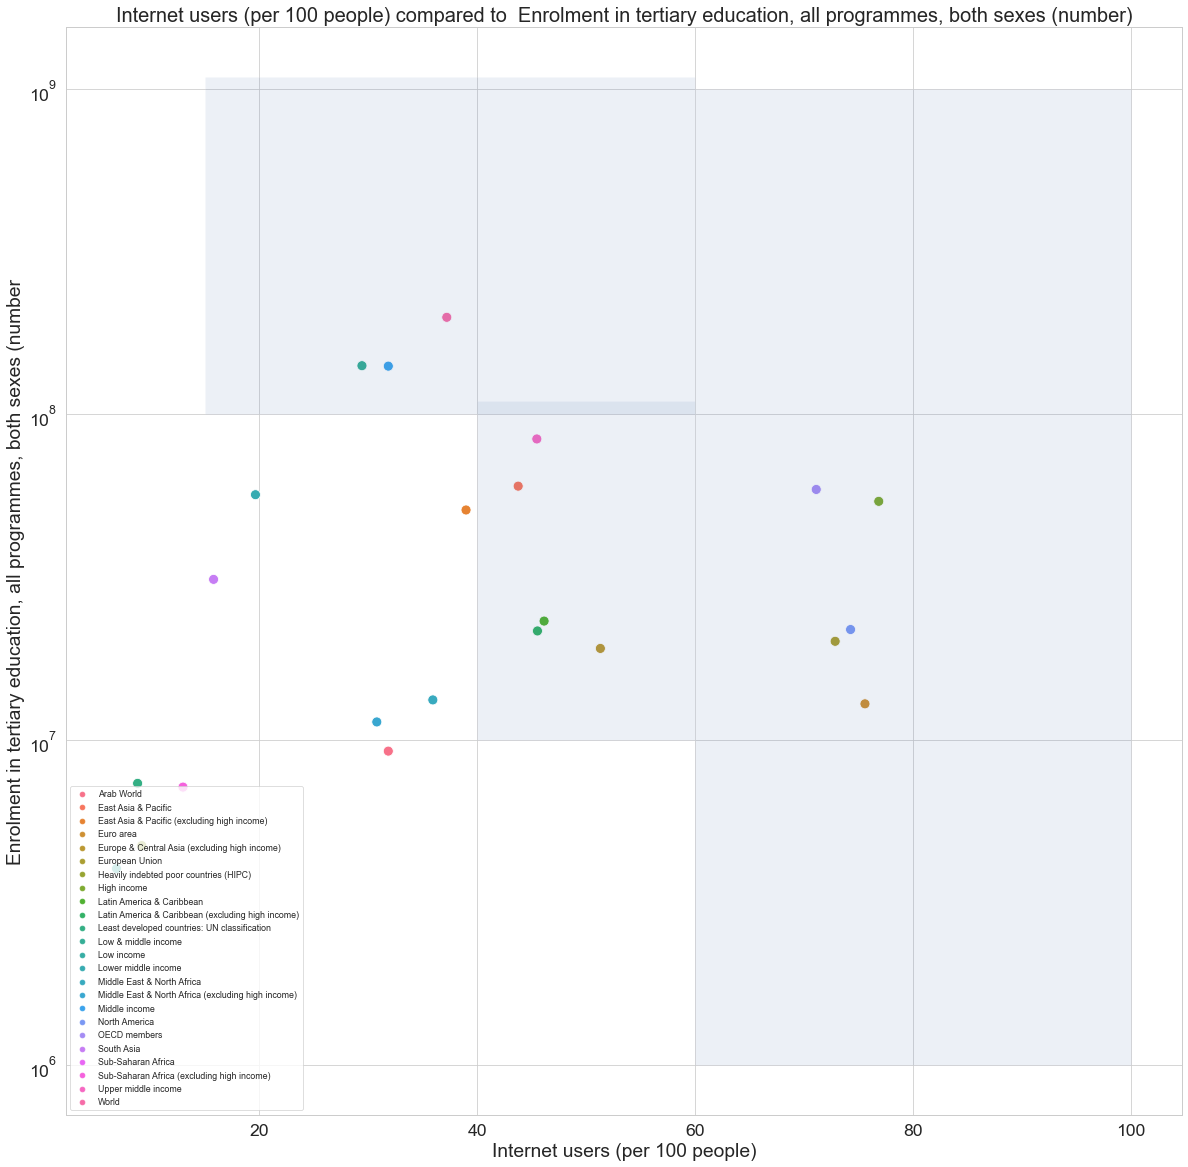

In [850]:
# distribution par pays   


import matplotlib.patches as patches
plt.figure(figsize = (20,20))
ax = plt.gca()
sns.set_context("paper", font_scale=1)
sns.scatterplot(df_pays['IT.NET.USER.P2'], df_pays['SE.TER.ENRL'], hue=df_pays['Country Name'], s=100)
plt.xlabel('Internet users (per 100 people)')
ax.add_patch(patches.Rectangle((15, 100000000), 45, 990000000, alpha=0.1))
ax.add_patch(patches.Rectangle((40, 10000000), 20, 99900000, alpha=0.1))
ax.add_patch(patches.Rectangle((60, 1000000), 40, 999000000, alpha=0.1))

plt.legend(loc='lower left' , markerscale=1)

#legend_elemnts = [patches.Patch(alpha=0.1, label='Potential customers')]
#plt.legend(handles = legend_elements, loc='lower left',markerscale=3)


ax.set_yscale('log')
plt.ylabel('Enrolment in tertiary education, all programmes, both sexes (number')
plt.title('Internet users (per 100 people) compared to  Enrolment in tertiary education, all programmes, both sexes (number)', size=20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


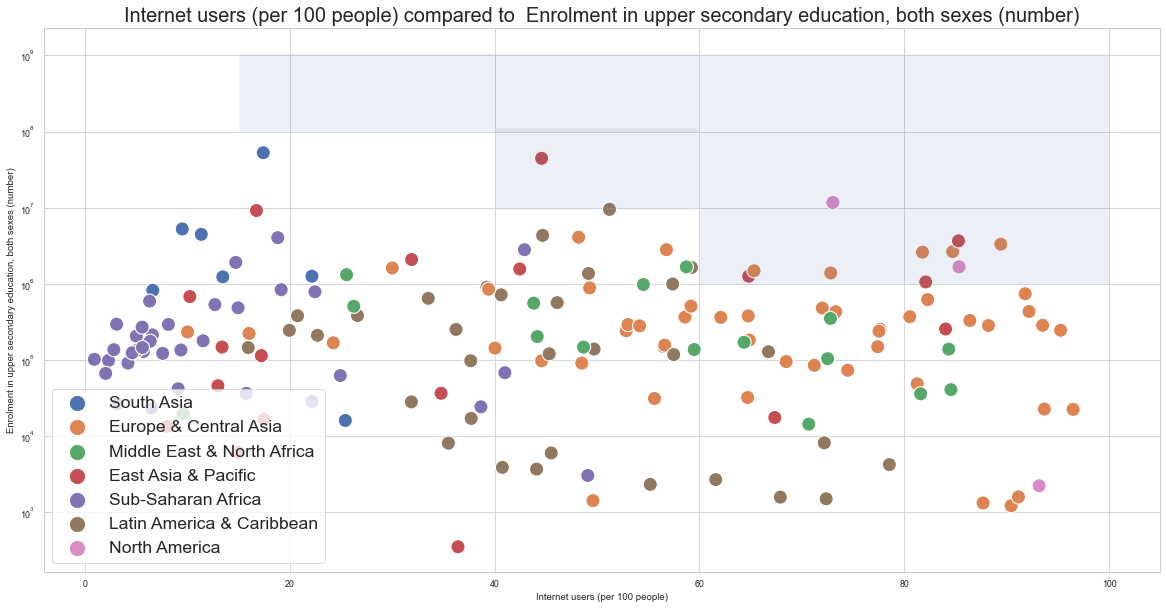

In [851]:
import matplotlib.patches as patches
plt.figure(figsize = (20,10))
ax = plt.gca()
sns.set_context("paper", font_scale=2)
sns.scatterplot(df_region['IT.NET.USER.P2'], df_region['UIS.E.3'], hue=df_region['Region'], s=200)
plt.xlabel('Internet users (per 100 people)')
ax.add_patch(patches.Rectangle((15, 100000000), 45, 990000000, alpha=0.1))
ax.add_patch(patches.Rectangle((40, 10000000), 20, 99900000, alpha=0.1))
ax.add_patch(patches.Rectangle((60, 1000000), 40, 999000000, alpha=0.1))

plt.legend(loc='lower left',markerscale=3)

#legend_elemnts = [patches.Patch(alpha=0.1, label='Potential customers')]
#plt.legend(handles = legend_elements, loc='lower left',markerscale=3)


ax.set_yscale('log')
plt.ylabel('Enrolment in upper secondary education, both sexes (number)')
plt.title('Internet users (per 100 people) compared to  Enrolment in upper secondary education, both sexes (number)', size=20)
plt.show()

In [852]:
data_countries

NameError: name 'data_countries' is not defined

## ----------------------------------------------
Quels sont les pays avec un fort potentiel de clients pour nos services ?


## -------------------------------------------------

In [853]:
#on va créer un indicateur lycée + supérieur:
#on va créer un indicateur lycée + supérieur:

##  IT.NET.USER.P2   :           'Internet users (per 100 people)'
df_region['clients'] = df_region['IT.NET.USER.P2'] 
df_region1 = df_region
print('liste des pays avec le nombre d\'internautes (pour 100 personnes) ')
liste_des_pays1 = df_region1.sort_values(by='clients', ascending=False)[['Country Name', 'clients']].head(30)

liste des pays avec le nombre d'internautes (pour 100 personnes) 


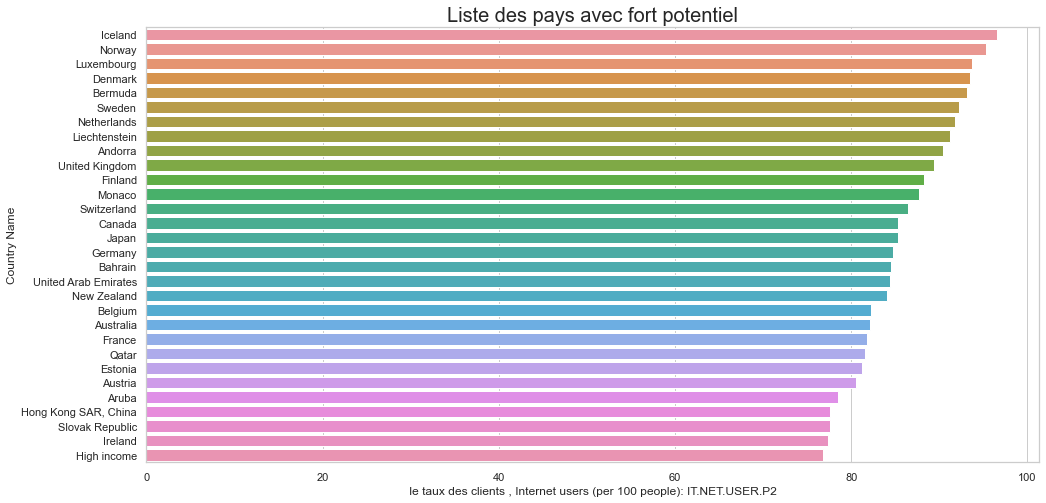

In [854]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(x= liste_des_pays1[('clients')], y=liste_des_pays1['Country Name'])
plt.title('Liste des pays avec fort potentiel', size=20)
plt.xlabel(' le taux des clients , Internet users (per 100 people): IT.NET.USER.P2 ')
plt.show()

In [855]:
#plt.figure(figsize=(10, 10))
#liste_des_pays.plot.barh(x='Country Name', y='clients',color={"red"}, )
#plt.title('Nombre de données significatives par décennie', size=15)
#plt.show()

In [856]:
#on va créer un indicateur lycée + supérieur: 
#  SP.POP.1524.TO.UN  :   Population, ages 15-24, total   
df_region['clients'] = df_region['SP.POP.1524.TO.UN']
df_region2 = df_region
print('liste des pays avec Population, 15-24 ans, total ')
liste_des_pays2 = df_region2.sort_values(by='clients', ascending=False)[['Country Name', 'clients']].head(30)

liste des pays avec Population, 15-24 ans, total 


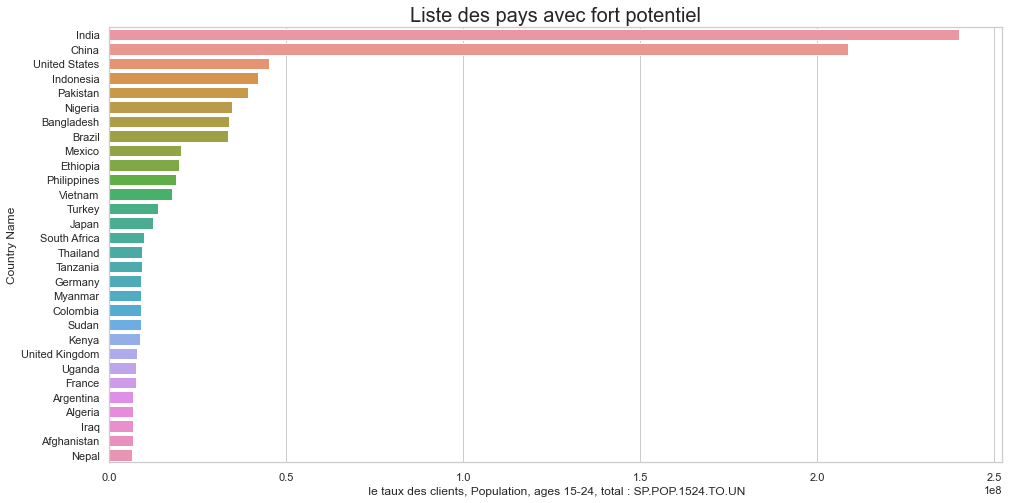

In [857]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(x= liste_des_pays2[('clients')], y=liste_des_pays2['Country Name'])
plt.title('Liste des pays avec fort potentiel', size=20)
plt.xlabel(' le taux des clients, Population, ages 15-24, total : SP.POP.1524.TO.UN')
plt.show()

In [858]:
#IT.NET.USER.P2 : Internautes (pour 100 personnes)' 
#SP.POP.1524.TO.UN : Population, 15-24 ans, total' 
# UIS.E.3 : Inscriptions dans l'enseignement secondaire supérieur, les deux sexes (nombre) » 
#  UIS.E.4  :  Enrolment in post-secondary non-tertiary education, both sexes (number) 
df_region['clients'] = df_region['SP.POP.1524.TO.UN']+ df_region['IT.NET.USER.P2'] + df_region['UIS.E.4']+df_region['UIS.E.3']
df_region3 = df_region
print('liste des pays avec Inscriptions dans l\'enseignement postsecondaire non supérieur, les deux sexes (nombre) ')
liste_des_pays3 = df_region3.sort_values(by='clients', ascending=False)[['Country Name', 'clients']].head(30)

liste des pays avec Inscriptions dans l'enseignement postsecondaire non supérieur, les deux sexes (nombre) 


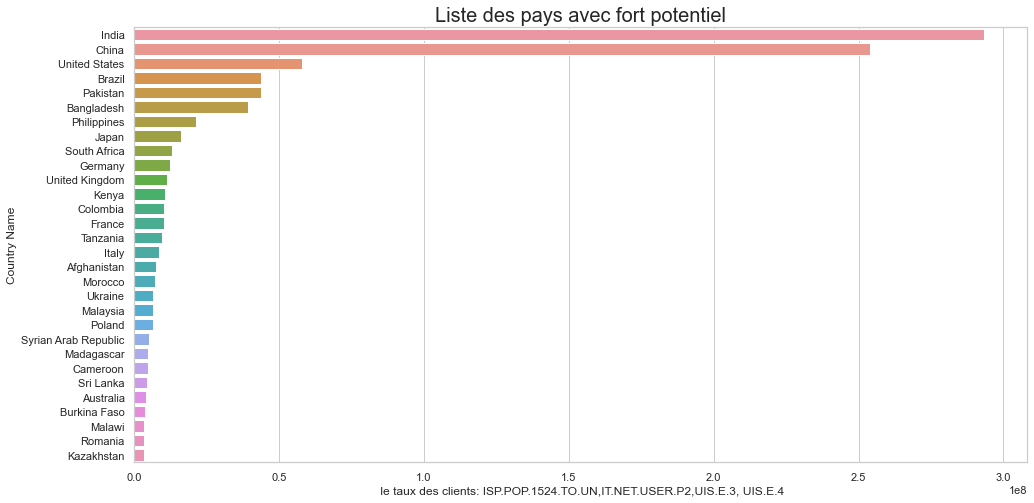

In [859]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(x= liste_des_pays3[('clients')], y=liste_des_pays3['Country Name'])
plt.title('Liste des pays avec fort potentiel', size=20)
plt.xlabel(' le taux des clients: ISP.POP.1524.TO.UN,IT.NET.USER.P2,UIS.E.3, UIS.E.4' )
plt.show()

In [860]:
# UIS.E.3 : Inscriptions dans l'enseignement secondaire supérieur, des deux sexes (nombre)' 
# UIS.E.4 :  Inscriptions dans l'enseignement post-secondaire non supérieur, les deux sexes (nombre)' 
# SE.TER.ENRL : Inscriptions dans l'enseignement supérieur, tous les programmes, les deux sexes (nombre)' 
    
df_pays['clients'] = df_pays['UIS.E.3'] + df_pays['UIS.E.4'] + df_pays['SE.TER.ENRL']
df_pays1  = df_pays
print('liste des pays avec le nombre des personnes secondaire supérieur,post-secondaire et supérieur')
liste_des_pays1 = df_region3.sort_values(by='clients', ascending=False)[['Country Name', 'clients']].head(30)

liste des pays avec le nombre des personnes secondaire supérieur,post-secondaire et supérieur


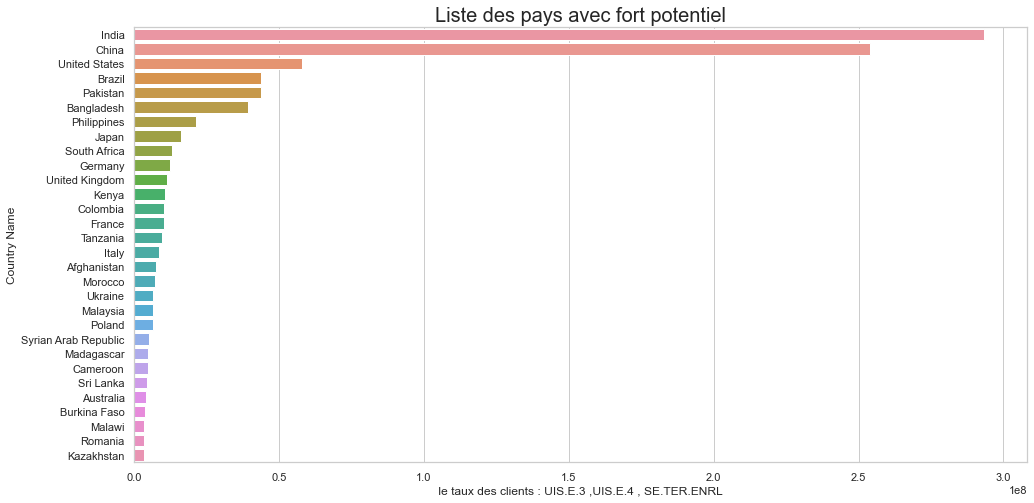

In [861]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(x= liste_des_pays1[('clients')], y=liste_des_pays1['Country Name'])
plt.title('Liste des pays avec fort potentiel', size=20)
plt.xlabel(' le taux des clients : UIS.E.3 ,UIS.E.4 , SE.TER.ENRL ')
plt.show()

In [862]:
#on va créer un indicateur lycée + supérieur:
#on va créer un indicateur lycée + supérieur:
# SP.POP.TOTL : Inscriptions dans l'enseignement post-secondaire non supérieur, les deux sexes (nombre)' 
#IT.NET.USER.P2 : Internautes (pour 100 personnes)' 
# SE.TER.ENRL : Inscriptions dans l'enseignement supérieur, tous les programmes, les deux sexes (nombre)'
# UIS.E.3 : Inscriptions dans l'enseignement secondaire supérieur, les deux sexes (nombre) » 
# ------------------------------------------------------------------------------
#SP.POP.1524.TO.UN : Population, 15-24 ans, total' 
#  UIS.E.4  :  Enrolment in post-secondary non-tertiary education, both sexes (number) 
# UIS.E.3 : Inscriptions dans l'enseignement secondaire supérieur, des deux sexes (nombre)' 
# UIS.E.4 :  Inscriptions dans l'enseignement post-secondaire non supérieur, les deux sexes (nombre)'

#df_region['clients'] = df_region['SP.POP.TOTL'] + df_region['IT.NET.USER.P2'] 
#+ df_region['SE.TER.ENRL'] + df_region['UIS.E.3']+ df_region['IT.CMP.PCMP.P2']
#+ df_region ['SP.POP.1524.TO.UN']+ df_region ['UIS.E.4']
#print('liste des pays avec le plus de lycéens et étudiants')
#df_region.sort_values(by='clients', ascending=False)[['Country Name', 'clients']].head(30)

In [863]:
df_region['Country Name']

0          Afghanistan
1              Albania
2              Algeria
3       American Samoa
4              Andorra
             ...      
1465               NaN
1466               NaN
1467               NaN
1468               NaN
1469               NaN
Name: Country Name, Length: 1470, dtype: object

liste des pays avec le nombre d'internautes (pour 100 personnes) 


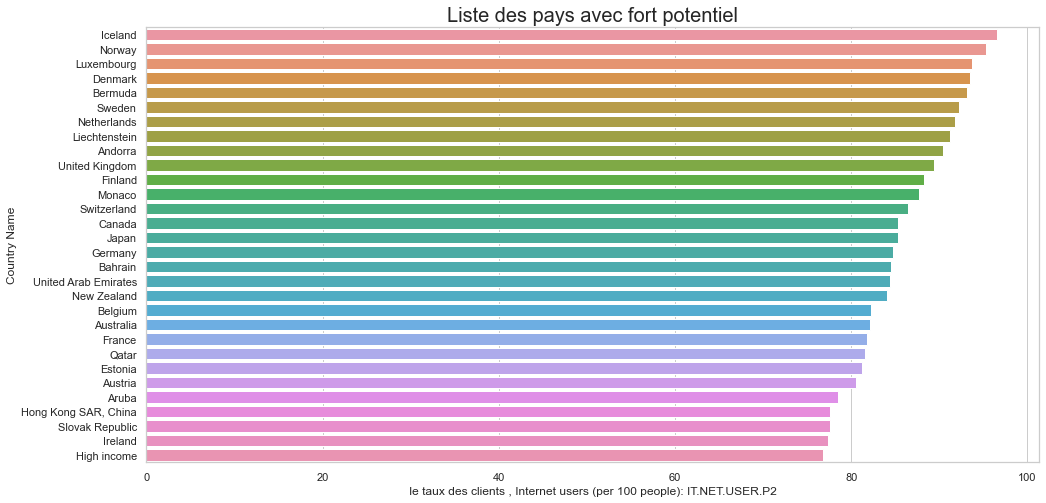

In [864]:
#on va créer un indicateur lycée + supérieur:
#on va créer un indicateur lycée + supérieur:

##  IT.NET.USER.P2   :           'Internet users (per 100 people)'
df_region['clients'] = df_region['IT.NET.USER.P2'] 
df_region1 = df_region
print('liste des pays avec le nombre d\'internautes (pour 100 personnes) ')
liste_des_pays1 = df_region1.sort_values(by='clients', ascending=False)[['Country Name', 'clients']].head(30)



sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(x= liste_des_pays1[('clients')], y=liste_des_pays1['Country Name'])
plt.title('Liste des pays avec fort potentiel', size=20)
plt.xlabel(' le taux des clients , Internet users (per 100 people): IT.NET.USER.P2 ')
plt.show()




liste des pays avec Inscriptions dans l'enseignement postsecondaire non supérieur, les deux sexes (nombre) 


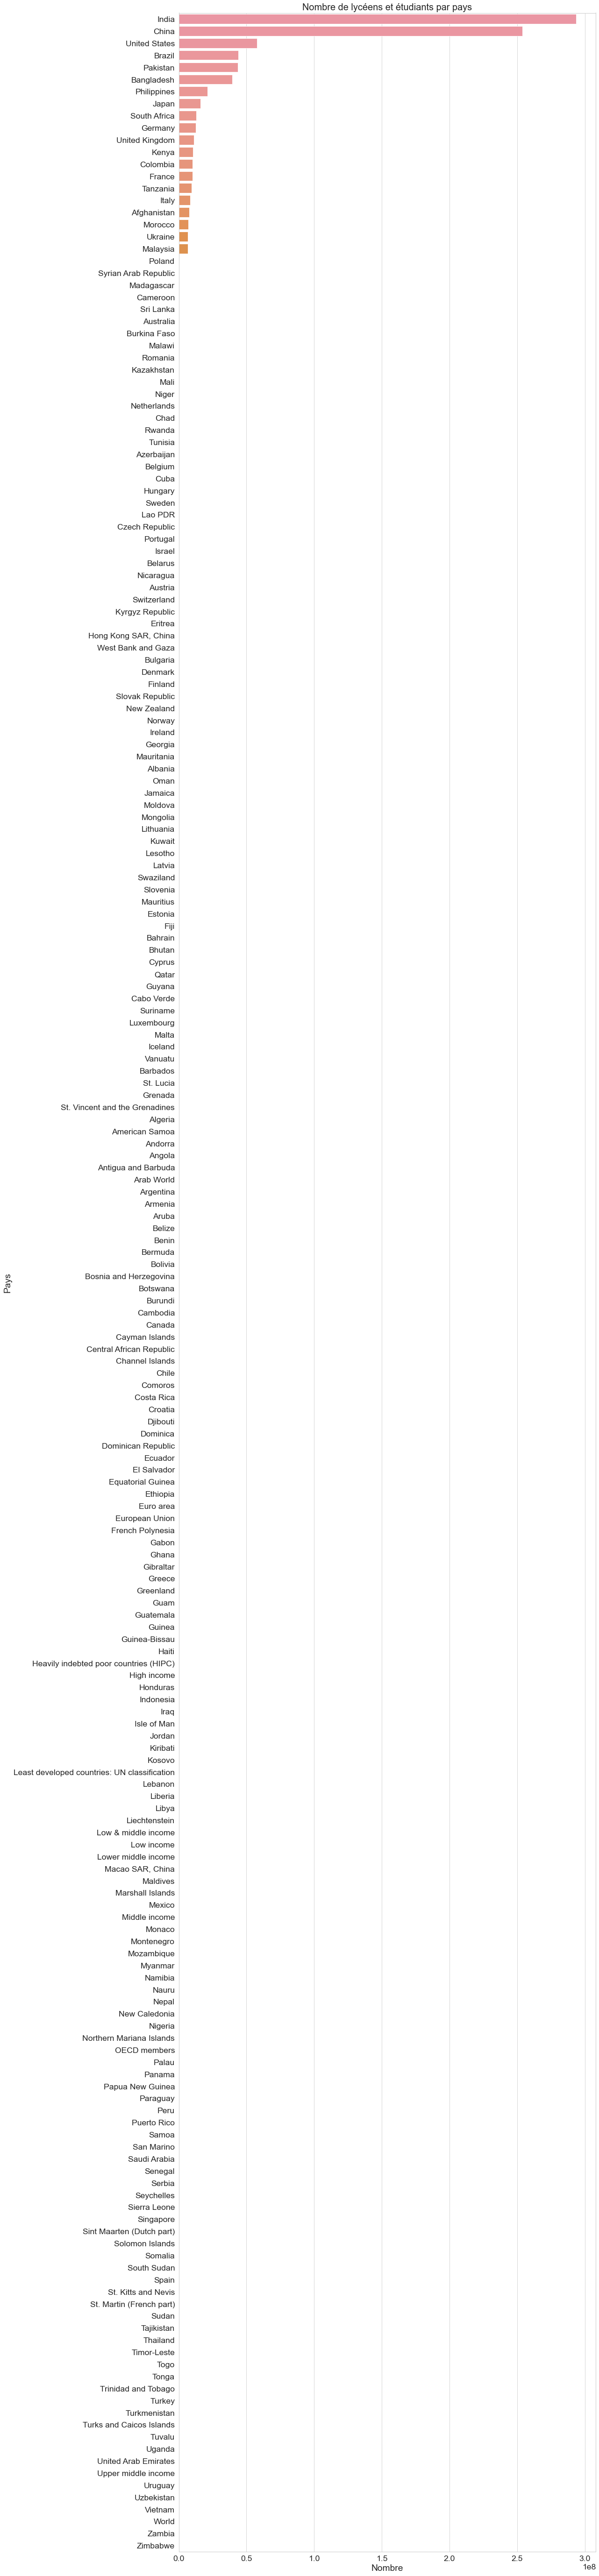

In [865]:

#IT.NET.USER.P2 : Internautes (pour 100 personnes)' 
#SP.POP.1524.TO.UN : Population, 15-24 ans, total' 
# UIS.E.3 : Inscriptions dans l'enseignement secondaire supérieur, les deux sexes (nombre) » 
#  UIS.E.4  :  Enrolment in post-secondary non-tertiary education, both sexes (number) 
df_region['clients'] = df_region['SP.POP.1524.TO.UN']+ df_region['IT.NET.USER.P2'] + df_region['UIS.E.4']+df_region['UIS.E.3']
df_region3 = df_region
print('liste des pays avec Inscriptions dans l\'enseignement postsecondaire non supérieur, les deux sexes (nombre) ')
liste_des_pays3 = df_region3.sort_values(by='clients', ascending=False)[['Country Name', 'clients']].head(30)


plt.figure(figsize=(16, 100))
sns.set_context("paper", font_scale=2)
ax = plt.gca()
sns.barplot(x = df_region.sort_values(by='clients', ascending=False)['clients'].head(20), y=df_region.sort_values(by='clients', ascending=False)['Country Name'])
plt.title('Nombre de lycéens et étudiants par pays', size=20)
plt.xlabel('Nombre')
plt.ylabel('Pays')
plt.show()

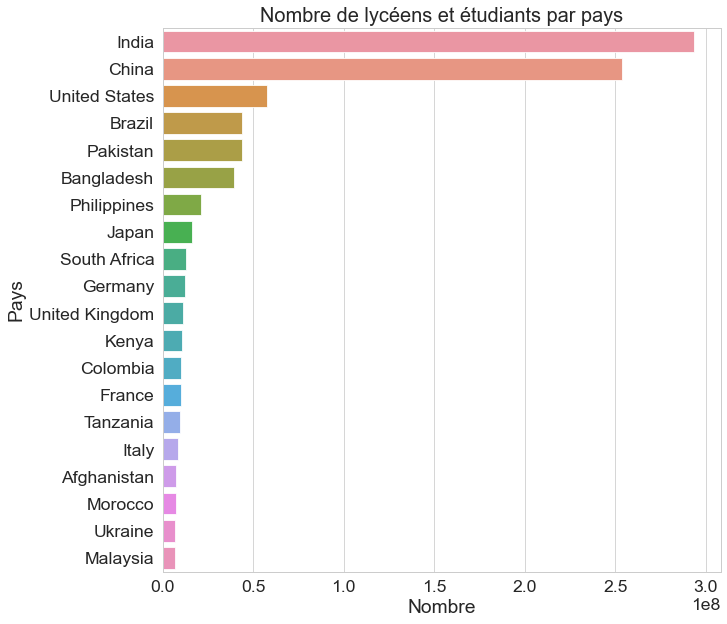

In [866]:
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)
ax = plt.gca()
sns.barplot(x = df_region.sort_values(by='clients', ascending=False)['clients'].head(20), y=df_region.sort_values(by='clients', ascending=False)['Country Name'].head(20))
plt.title('Nombre de lycéens et étudiants par pays', size=20)
plt.xlabel('Nombre')
plt.ylabel('Pays')
plt.show()

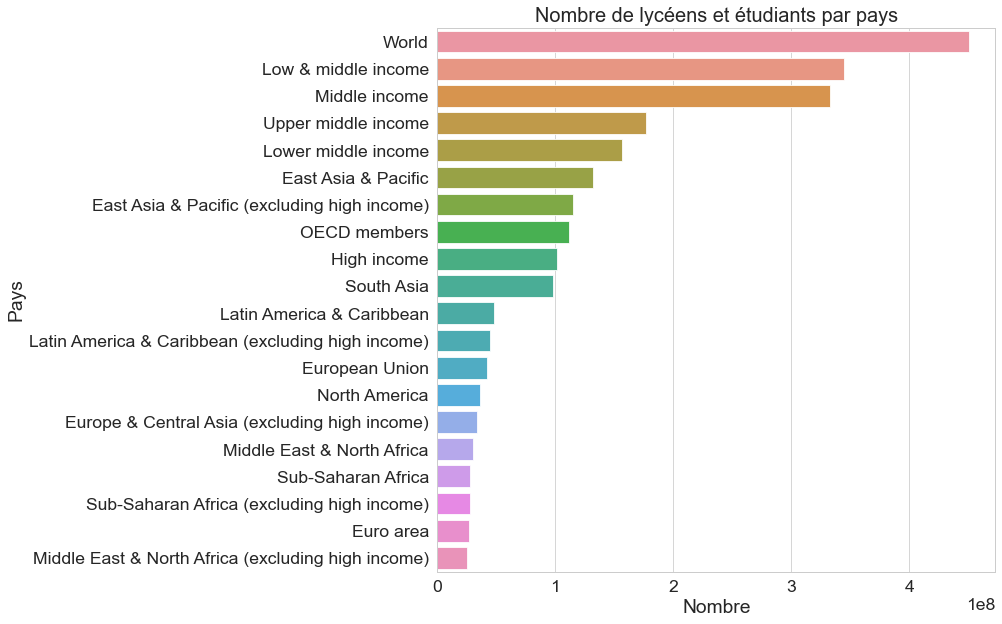

In [867]:
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)
ax = plt.gca()
sns.barplot(x = df_pays.sort_values(by='clients', ascending=False)['clients'].head(20), y=df_pays.sort_values(by='clients', ascending=False)['Country Name'].head(20))
plt.title('Nombre de lycéens et étudiants par pays', size=20)
plt.xlabel('Nombre')
plt.ylabel('Pays')
plt.show()

In [868]:
#on va multiplier ce nombre avec le taux de pénétration d'internet pour avoir une estimation du nombre de clients potentiels:
df_region['clients_potentiel'] = df_region['clients'] * df_region['IT.NET.USER.P2']/100
df_pays['clients_potentiel'] = df_pays['clients'] * df_pays['IT.NET.USER.P2']/100

In [869]:
df_regionx = df_region.sort_values(by='clients_potentiel', ascending=False)[['Country Name', 'IT.NET.USER.P2', 'clients', 'clients_potentiel']].head(30)

In [870]:
df_regionx

Country Name  IT.NET.USER.P2       clients  clients_potentiel
39                  China       44.585731  2.538323e+08       1.131730e+08
83                  India       17.399603  2.934367e+08       5.105682e+07
200         United States       73.035771  5.777134e+07       4.219374e+07
26                 Brazil       51.214529  4.384204e+07       2.245349e+07
91                  Japan       85.306401  1.603872e+07       1.368206e+07
65                Germany       84.745271  1.249058e+07       1.058518e+07
199        United Kingdom       89.441457  1.123442e+07       1.004823e+07
150           Philippines       42.447732  2.125995e+07       9.024368e+06
61                 France       81.789500  1.023150e+07       8.368294e+06
170          South Africa       42.912731  1.292546e+07       5.546667e+06
40               Colombia       49.163197  1.030822e+07       5.067853e+06
144              Pakistan       11.339223  4.367686e+07       4.952616e+06
89                  Italy       56.780535  8.587927e+06       4.876271e+06
115              Malaysia       64.810759  6.584391e+06       4.267394e+06
151                Poland       65.332414  6.447711e+06       4.212445e+06
128               Morocco       54.524967  7.225375e+06       3.939633e+06
15             Bangladesh        9.482420  3.936010e+07       3.732290e+06
11              Australia       82.105767  4.236874e+06       3.478718e+06
197               Ukraine       39.404974  6.613507e+06       2.606051e+06
134           Netherlands       91.822593  2.746999e+06       2.522366e+06
93             Kazakhstan       59.173667  3.404284e+06       2.014439e+06
155               Romania       49.275949  3.505573e+06       1.727404e+06
18                Belgium       82.295655  1.920088e+06       1.580149e+06
94                  Kenya       14.714286  1.065789e+07       1.568233e+06
181                Sweden       92.195800  1.649130e+06       1.520428e+06
13             Azerbaijan       64.771431  2.108848e+06       1.365931e+06
183  Syrian Arab Republic       26.234218  4.973208e+06       1.304682e+06
81                Hungary       71.998741  1.730331e+06       1.245817e+06
46         Czech Republic       73.318880  1.630730e+06       1.195633e+06
12                Austria       80.545441  1.406678e+06       1.133015e+06

## --------------------------------------------------------

Dans quels pays l'entreprise doit-elle opérer en priorité ?

Tous les pays de la liste suivante seraient de bons candidats pour installer la société:


## 4 - Evaluation : 
Interprétation des résultats , Conclusion , Perspectives d'améliorations , Exporatation des données

#### -------------------------------------           Conclusion  ---------------------------------------------------------------------------------------------
après l'exploration et l'exploitation on arrive à determiner le classement des pays comme suit : 

si on basant sur le nombres d'étudiants ( l'ensemble des indicateurs retenus )  alors sera comme suit : 

- India 	2.934367e+08
- China 	2.538323e+08
- United States 	5.777134e+07
- Brazil 	4.384204e+07
- Pakistan 	4.367686e+07
- Bangladesh

   
- noter que ces pays ont une grandes populations  ????????????,
- reste à vérifier des pays de la même population   !!!!  

Par contre si on base sur le nombre d'internautes (pour 100 personnes) 

- Iceland 	96.509472
- Norway 	95.284552
- Luxembourg 	93.696330
- Denmark 	93.529716
- Bermuda 	93.181273
- Sweden 	92.195800
- Netherlands 	91.822593

Conclusions sur la pertinence de l'usage du jeu de données

Concernant les indicateurs 

indicateurs = ['SP.POP.TOTL',  #  par ordre 
              - 'IT.NET.USER.P2',
            -   'SE.TER.ENRL',
            -   'UIS.E.3',
            -   'IT.CMP.PCMP.P2',
           -    'SP.POP.1524.TO.UN',
            -   'UIS.E.4']   
le jeu de données est pertinent pour répondre aux questions de la problématique :

# SP.POP.TOTL : Inscriptions dans l'enseignement post-secondaire non supérieur, les deux sexes (nombre)' 
# IT.NET.USER.P2 : Internautes (pour 100 personnes)
# SE.TER.ENRL : Inscriptions dans l'enseignement supérieur, tous les programmes, les deux sexes (nombre)'
# SP.POP.1524.TO.UN : Population, 15-24 ans, total' 
# UIS.E.3 : Inscriptions dans l'enseignement secondaire supérieur, des deux sexes (nombre)' 
# UIS.E.4 :  Inscriptions dans l'enseignement post-secondaire non supérieur, les deux sexes (nombre)'

le Dataset se compose de 5 fichiers CSV, parmi ces 5 il y en a deux vraiment importants pour répondre aux questions de l'entreprise, mais les autres ne sont pas importants pour cette étude.
      tous les pays du monde sont couverts
      les indicateurs sont importants et les données réalisables pour la représentation graphique
      l'ensemble de données contient également des données démographiques, socio-économiques et autres

Note importante:
les valeurs manquantes sont énormes dans le Dataset, d'où nous nous sommes principalement basés sur le regroupement des années afin de perdre des informations.
par conséquent, les valeurs manquantes sont des valeurs importantes et décessives , donc si on base vraiment sur ces valeurs ,risque de de ne pas arrivé ou avoir des résultats érronées 

   beaucoup dinformation sont manquantes , comme exemple  :
   les frais de internet, le nombre d'étudiants en pourcentage , etc 
   Comme émergence de l'entreprise Academy ,  il est fortement conseillé de quelle s'installe dans les pays notés avant , il sera plus simple et très pertinent  pour cette etreprise .

#### -------------------------------------           Fin  ---------------------------------------------------------------------------------------------